<a href="https://colab.research.google.com/github/alenabozny/context-augmentation/blob/master/LIWC_LR_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Mount Google Drive to the Notebook. This allows us to load datasets that are copyied to the GD directory.**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle

## **Load the dataset (LIWC features for CRED/NONCRED data)**

In [ ]:
import pandas as pd
import numpy as np

statins = pd.read_csv("/content/drive/My Drive/Colab Notebooks/LIWC_paragrafy.csv", sep=";",decimal=',', header=0)
psychiatry = pd.read_csv("/content/drive/My Drive/Colab Notebooks/paragrafy_LIWC/psychiatry.csv", sep=";",decimal=',', header=0)
antioxidants = pd.read_csv("/content/drive/My Drive/Colab Notebooks/paragrafy_LIWC/antioxidants.csv", sep=";",decimal=',', header=0)
ssri_during_pregnancy = pd.read_csv("/content/drive/My Drive/Colab Notebooks/paragrafy_LIWC/ssri_during_pregnancy.csv", sep=";",decimal=',', header=0)
cc_vs_nb = pd.read_csv("/content/drive/My Drive/Colab Notebooks/paragrafy_LIWC/cc_vs_nb.csv", sep=";",decimal=',', header=0)
aspirin_pregnancy = pd.read_csv("/content/drive/My Drive/Colab Notebooks/paragrafy_LIWC/aspirin_pregnancy.csv", sep=";",decimal=',', header=0)
children_antibiotics = pd.read_csv("/content/drive/My Drive/Colab Notebooks/paragrafy_LIWC/children_antibiotics.csv", sep=";",decimal=',', header=0)
allergy_testing = pd.read_csv("/content/drive/My Drive/Colab Notebooks/paragrafy_LIWC/allergy_testing.csv", sep=";",decimal=',', header=0)
diet_and_autism = pd.read_csv("/content/drive/My Drive/Colab Notebooks/paragrafy_LIWC/diet_and_autism.csv", sep=";",decimal=',', header=0)
heart_supplements = pd.read_csv("/content/drive/My Drive/Colab Notebooks/paragrafy_LIWC/heart_supplements.csv", sep=";",decimal=',', header=0)
ssri_during_pregnancy = pd.read_csv("/content/drive/My Drive/Colab Notebooks/paragrafy_LIWC/ssri_during_pregnancy.csv", sep=";",decimal=',', header=0)
steroids_for_kids = pd.read_csv("/content/drive/My Drive/Colab Notebooks/paragrafy_LIWC/steroids_for_kids.csv", sep=";",decimal=',', header=0)
vaccination = pd.read_csv("/content/drive/My Drive/Colab Notebooks/paragrafy_LIWC/vaccination.csv", sep=";",decimal=',', header=0)

statins['Body'].head()

0    Statins available in the United States include...
1    Statins are one of the most common medicines p...
2    They work on an enzyme that is used by our bod...
3    Yep, that’s right…our bodies make cholesterol,...
4    That’s because cholesterol is vital for our su...
Name: Body, dtype: object

## Non-overlapping paragraphs

In [ ]:
statins_paragraphs_no = statins[0:1917:3]
psychiatry_paragraphs_no = psychiatry[0:len(psychiatry):3]
antioxidants_paragraphs_no = antioxidants[0:len(antioxidants):3]
ssri_during_pregnancy_paragraphs_no = ssri_during_pregnancy[0:len(ssri_during_pregnancy):3]
cc_vs_nb_paragraphs_no = cc_vs_nb[0:len(cc_vs_nb):3]
aspirin_pregnancy_paragraphs_no = aspirin_pregnancy[0:len(aspirin_pregnancy):3]
children_antibiotics_paragraphs_no = children_antibiotics[0:len(children_antibiotics):3]
allergy_testing_paragraphs_no = allergy_testing[0:len(allergy_testing):3]
diet_and_autism_paragraphs_no = diet_and_autism[0:len(diet_and_autism):3]
heart_supplements_paragraphs_no = heart_supplements[0:len(heart_supplements):3]
steroids_for_kids_paragraphs_no = steroids_for_kids[0:len(steroids_for_kids):3]
vaccination_paragraphs_no = vaccination[0:len(vaccination):3]

## Overlapping paragraphs

In [ ]:
statins_paragraphs = statins
psychiatry_paragraphs = psychiatry
antioxidants_paragraphs = antioxidants
ssri_during_pregnancy_paragraphs = ssri_during_pregnancy
cc_vs_nb_paragraphs = cc_vs_nb
aspirin_pregnancy_paragraphs = aspirin_pregnancy
children_antibiotics_paragraphs = children_antibiotics
allergy_testing_paragraphs = allergy_testing
diet_and_autism_paragraphs = diet_and_autism
heart_supplements_paragraphs = heart_supplements
steroids_for_kids_paragraphs = steroids_for_kids
vaccination_paragraphs = vaccination

In [ ]:
ssri_during_pregnancy_paragraphs.head()

Source (A)  ... OtherP
0  There’s a growing and confusing group of studi...  ...    0.0
1  Some research suggests that the drugs are link...  ...    0.0
2  So it’s not surprising that doctors and expect...  ...    0.0
3  In the latest study to address the subject, re...  ...    0.0
4  Some of the infants’ mothers had depression, a...  ...    0.0

[5 rows x 95 columns]

In [ ]:
def y_to_binary(Y):
  def label_to_0_1(lbl):
    if lbl=='CRED':
      return 1
    else:
      return 0

  Y_mapped = map(label_to_0_1, Y)
  return np.array(list(Y_mapped))

In [ ]:
np.shape(ssri_during_pregnancy_paragraphs)

(172, 95)

In [ ]:
!pip install spacytextblob

In [ ]:
!pip install lime

# The Model
Features:
- TFIDF
- NER
- POS
- LIWC
- sentiment

In [ ]:
from sklearn.pipeline import Pipeline
# from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing as p
from collections import Counter
import matplotlib.pyplot as plt
import re
import nltk

nltk.download('punkt')

from nltk.stem import PorterStemmer
from nltk import word_tokenize, sent_tokenize


def get_y(data, y_column = 'Source (B)'):
  Y = data[y_column]
  Y = y_to_binary(Y)
  print(np.shape(Y))
  return Y

statins_Y = get_y(statins_paragraphs, y_column='Rate')
psychiatry_Y = get_y(psychiatry_paragraphs)
antioxidants_Y = get_y(antioxidants_paragraphs)
cc_vs_nb_Y = get_y(cc_vs_nb_paragraphs)
aspirin_pregnancy_Y = get_y(aspirin_pregnancy_paragraphs)
children_antibiotics_Y = get_y(children_antibiotics_paragraphs)
allergy_testing_Y = get_y(allergy_testing_paragraphs)
diet_and_autism_Y = get_y(diet_and_autism_paragraphs)
heart_supplements_Y = get_y(heart_supplements_paragraphs)
ssri_during_pregnancy_Y = get_y(ssri_during_pregnancy_paragraphs)
steroids_for_kids_Y = get_y(steroids_for_kids_paragraphs)
vaccination_Y = get_y(vaccination_paragraphs)

statins_Y_no = get_y(statins_paragraphs_no, y_column='Rate')
psychiatry_Y_no = get_y(psychiatry_paragraphs_no)
antioxidants_Y_no = get_y(antioxidants_paragraphs_no)
cc_vs_nb_Y_no = get_y(cc_vs_nb_paragraphs_no)
aspirin_pregnancy_Y_no = get_y(aspirin_pregnancy_paragraphs_no)
children_antibiotics_Y_no = get_y(children_antibiotics_paragraphs_no)
allergy_testing_Y_no = get_y(allergy_testing_paragraphs_no)
diet_and_autism_Y_no = get_y(diet_and_autism_paragraphs_no)
heart_supplements_Y_no = get_y(heart_supplements_paragraphs_no)
ssri_during_pregnancy_Y_no = get_y(ssri_during_pregnancy_paragraphs_no)
steroids_for_kids_Y_no = get_y(steroids_for_kids_paragraphs_no)
vaccination_Y_no = get_y(vaccination_paragraphs_no)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
(1917,)
(2421,)
(674,)
(512,)
(326,)
(554,)
(1353,)
(545,)
(448,)
(172,)
(723,)
(1444,)
(639,)
(807,)
(225,)
(171,)
(109,)
(185,)
(451,)
(182,)
(150,)
(58,)
(241,)
(482,)


### sBERT

In [ ]:
pip install -U sentence-transformers

In [ ]:
pip install transformers

In [ ]:
from sentence_transformers import SentenceTransformer
from sentence_transformers.models import Transformer, Pooling

word_embedder = Transformer("roberta-large")
pooling_model = Pooling(word_embedder.get_word_embedding_dimension())
embedder = SentenceTransformer(modules=[word_embedder, pooling_model])

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def get_X_sbert(data, body_column='Source (A)'):
  corpus = data[body_column]
  corpus_removed_numbers = [re.sub(r'\d+', '', s) for s in corpus]

  corpus_tokenized = []
  stemmer= PorterStemmer()

  for s in corpus_removed_numbers:
    tokens = word_tokenize(s)
    stemmed_tokens = [stemmer.stem(word.lower()) for word in tokens]
    corpus_tokenized.append(" ".join(stemmed_tokens))
  
  corpus_embeddings = embedder.encode(corpus_tokenized)
  X_sbert = pd.DataFrame(corpus_embeddings, columns=[str(x) +"_sBERT" for x in range(0,1023)])
  return corpus_embeddings

In [ ]:
ssri_during_pregnancy_X_sbert = get_X_sbert(ssri_during_pregnancy_paragraphs_no)

ValueError: ignored

In [ ]:
print(np.shape(ssri_during_pregnancy_X_sbert))

(58, 1024)


### **TFIDF**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

def get_X_tfidf(data, body_column='Source (A)'):
  corpus = data[body_column]
  corpus_removed_numbers = [re.sub(r'\d+', '', s) for s in corpus]

  corpus_tokenized = []
  stemmer= PorterStemmer()

  for s in corpus_removed_numbers:
    tokens = word_tokenize(s)
    stemmed_tokens = [stemmer.stem(word.lower()) for word in tokens]
    corpus_tokenized.append(" ".join(stemmed_tokens))

  vectorizer = TfidfVectorizer()
  X_tfidf_array = vectorizer.fit_transform(corpus_tokenized)
  X_tfidf_array = np.array(X_tfidf_array.toarray())
  X_tfidf = pd.DataFrame(X_tfidf_array, columns=vectorizer.get_feature_names())
  print(np.shape(X_tfidf))

  return X_tfidf

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
statins_X_tfidf = get_X_tfidf(statins_paragraphs, body_column='Body')
psychiatry_X_tfidf = get_X_tfidf(psychiatry_paragraphs)
antioxidants_X_tfidf = get_X_tfidf(antioxidants_paragraphs)
cc_vs_nb_X_tfidf = get_X_tfidf(cc_vs_nb_paragraphs)
aspirin_pregnancy_X_tfidf = get_X_tfidf(aspirin_pregnancy_paragraphs)
children_antibiotics_X_tfidf = get_X_tfidf(children_antibiotics_paragraphs)
allergy_testing_X_tfidf = get_X_tfidf(allergy_testing_paragraphs)
diet_and_autism_X_tfidf = get_X_tfidf(diet_and_autism_paragraphs)
heart_supplements_X_tfidf = get_X_tfidf(heart_supplements_paragraphs)
ssri_during_pregnancy_X_tfidf = get_X_tfidf(ssri_during_pregnancy_paragraphs)
steroids_for_kids_X_tfidf = get_X_tfidf(steroids_for_kids_paragraphs)
vaccination_X_tfidf = get_X_tfidf(vaccination_paragraphs)

(1917, 3424)
(2421, 4103)
(674, 1594)
(512, 1598)
(326, 1264)
(554, 1606)
(1353, 2276)
(545, 1774)
(448, 1491)
(172, 920)
(723, 1448)
(1444, 2816)


In [ ]:
ssri_during_pregnancy_X_tfidf.head()

aa  abil  abnorm     about  absolut  ...  york  you  your  zero  zoloft
0  0.0   0.0     0.0  0.000000      0.0  ...   0.0  0.0   0.0   0.0     0.0
1  0.0   0.0     0.0  0.076648      0.0  ...   0.0  0.0   0.0   0.0     0.0
2  0.0   0.0     0.0  0.083382      0.0  ...   0.0  0.0   0.0   0.0     0.0
3  0.0   0.0     0.0  0.090290      0.0  ...   0.0  0.0   0.0   0.0     0.0
4  0.0   0.0     0.0  0.000000      0.0  ...   0.0  0.0   0.0   0.0     0.0

[5 rows x 920 columns]

##**NER**

In [ ]:
!python -m spacy download en_core_web_sm

In [ ]:
import spacy
from spacy import displacy
import en_core_web_sm

nlp = spacy.load("en_core_web_sm")

def get_X_ner(data, body_column='Source (A)'):
  corpus = data[body_column]
  X_ner_counters = []
  X_ner_array = []
  meta_counter = Counter()

  for s in corpus:
    doc = nlp(s)
    labels = [x.label_ for x in doc.ents]
    X_ner_counters.append(Counter(labels))
    meta_counter += Counter(labels)

  for c in X_ner_counters:
    X_ner_array.append([c[key] for key in list(meta_counter.keys())])

  X_ner = pd.DataFrame(X_ner_array, columns=list(meta_counter.keys()))
  X_ner.rename(columns=lambda x: x+"_NER", inplace=True)
  print(np.shape(X_ner))
  
  return X_ner

In [ ]:
statins_X_ner = get_X_ner(statins_paragraphs, body_column='Body')
psychiatry_X_ner = get_X_ner(psychiatry_paragraphs)
antioxidants_X_ner = get_X_ner(antioxidants_paragraphs)
cc_vs_nb_X_ner = get_X_ner(cc_vs_nb_paragraphs)
aspirin_pregnancy_X_ner = get_X_ner(aspirin_pregnancy_paragraphs)
children_antibiotics_X_ner = get_X_ner(children_antibiotics_paragraphs)
allergy_testing_X_ner = get_X_ner(allergy_testing_paragraphs)
diet_and_autism_X_ner = get_X_ner(diet_and_autism_paragraphs)
heart_supplements_X_ner = get_X_ner(heart_supplements_paragraphs)
ssri_during_pregnancy_X_ner = get_X_ner(ssri_during_pregnancy_paragraphs)
steroids_for_kids_X_ner = get_X_ner(steroids_for_kids_paragraphs)
vaccination_X_ner = get_X_ner(vaccination_paragraphs)

ssri_during_pregnancy_X_ner.head()

## **POS**

In [ ]:
def get_X_pos(data, body_column='Source (A)'):
  corpus = data[body_column]
  X_pos_counters = []
  X_pos_array = []
  meta_counter = Counter()

  for s in corpus:
    doc = nlp(s)
    poses = [token.pos_ for token in doc]
    X_pos_counters.append(Counter(poses))
    meta_counter += Counter(poses)

  for c in X_pos_counters:
    X_pos_array.append([c[key] for key in list(meta_counter.keys())])

  X_pos = pd.DataFrame(X_pos_array, columns=list(meta_counter.keys()))
  X_pos.rename(columns=lambda x: x+"_POS", inplace=True)
  print(np.shape(X_pos))
  
  return X_pos

In [ ]:
statins_X_ner = get_X_ner(statins_paragraphs, body_column='Body')
psychiatry_X_ner = get_X_ner(psychiatry_paragraphs)
antioxidants_X_ner = get_X_ner(antioxidants_paragraphs)
cc_vs_nb_X_ner = get_X_ner(cc_vs_nb_paragraphs)
aspirin_pregnancy_X_ner = get_X_ner(aspirin_pregnancy_paragraphs)
children_antibiotics_X_ner = get_X_ner(children_antibiotics_paragraphs)
allergy_testing_X_ner = get_X_ner(allergy_testing_paragraphs)
diet_and_autism_X_ner = get_X_ner(diet_and_autism_paragraphs)
heart_supplements_X_ner = get_X_ner(heart_supplements_paragraphs)
ssri_during_pregnancy_X_ner = get_X_ner(ssri_during_pregnancy_paragraphs)
steroids_for_kids_X_ner = get_X_ner(steroids_for_kids_paragraphs)
vaccination_X_ner = get_X_ner(vaccination_paragraphs)

ssri_during_pregnancy_X_ner.head()

(1917, 18)
(2421, 18)
(674, 18)
(512, 18)
(326, 18)
(554, 18)
(1353, 18)
(545, 18)
(448, 18)
(172, 17)
(723, 18)
(1444, 18)


PRON_POS  VERB_POS  DET_POS  CCONJ_POS  ...  NUM_POS  SPACE_POS  X_POS  SYM_POS
0         2        16       12          3  ...        0          0      0        0
1         2        18       16          2  ...        1          0      0        0
2         2        14       12          2  ...        1          0      0        0
3         2        11        9          1  ...        1          0      0        0
4         2        13        8          3  ...        0          0      0        0

[5 rows x 17 columns]

In [ ]:
statins_X_pos.head()

NOUN_POS  ADJ_POS  ADP_POS  DET_POS  ...  INTJ_POS  SPACE_POS  SYM_POS  X_POS
0        12        3        6        5  ...         0          0        0      0
1        10        3        8        6  ...         1          0        0      0
2        26        5       11        8  ...         1          0        0      0
3        24        5        9        7  ...         1          0        0      0
4        34        9       14       10  ...         0          1        2      0

[5 rows x 18 columns]

## **DEP**

In [ ]:
def get_X_dep(data, body_column='Source (A)'):
  corpus = data[body_column]
  X_dep_counters = []
  X_dep_array = []
  meta_counter = Counter()

  for s in corpus:
    doc = nlp(s)
    depes = [token.dep_ for token in doc]
    X_dep_counters.append(Counter(depes))
    meta_counter += Counter(depes)

  for c in X_dep_counters:
    X_dep_array.append([c[key] for key in list(meta_counter.keys())])

  X_dep = pd.DataFrame(X_dep_array, columns=list(meta_counter.keys()))
  X_dep.rename(columns=lambda x: x+"_DEP", inplace=True)
  print(np.shape(X_dep))
  
  return X_dep

In [ ]:
statins_X_dep = get_X_dep(statins_paragraphs, body_column='Body')

(1917, 45)


In [ ]:
statins_X_dep.head()

nsubj_DEP  amod_DEP  prep_DEP  ...  predet_DEP  meta_DEP  preconj_DEP
0          4         3         5  ...           0         0            0
1          5         2         6  ...           0         0            0
2          8         3         9  ...           0         0            0
3          9         3         8  ...           0         0            0
4          9         8        14  ...           0         0            0

[5 rows x 45 columns]

## **LIWC**

In [ ]:
# important_features = get_n_most_important(50)
def get_X_liwc(data):
  X_liwc = data.loc[:,'WC':]
  X_liwc = X_liwc.reset_index(drop=True)
  print(np.shape(X_liwc))
  
  X_liwc.rename(columns=lambda x: x+"_liwc", inplace=True)
  
  return X_liwc

In [ ]:
statins_X_liwc = get_X_liwc(statins_paragraphs)
psychiatry_X_liwc = get_X_liwc(psychiatry_paragraphs)
antioxidants_X_liwc = get_X_liwc(antioxidants_paragraphs)
cc_vs_nb_X_liwc = get_X_liwc(cc_vs_nb_paragraphs)
aspirin_pregnancy_X_liwc = get_X_liwc(aspirin_pregnancy_paragraphs)
children_antibiotics_X_liwc = get_X_liwc(children_antibiotics_paragraphs)
allergy_testing_X_liwc = get_X_liwc(allergy_testing_paragraphs)
diet_and_autism_X_liwc = get_X_liwc(diet_and_autism_paragraphs)
heart_supplements_X_liwc = get_X_liwc(heart_supplements_paragraphs)
ssri_during_pregnancy_X_liwc = get_X_liwc(ssri_during_pregnancy_paragraphs)
steroids_for_kids_X_liwc = get_X_liwc(steroids_for_kids_paragraphs)
vaccination_X_liwc = get_X_liwc(vaccination_paragraphs)

ssri_during_pregnancy_X_liwc.head()

## **Sentiment**

In [ ]:
from spacytextblob.spacytextblob import SpacyTextBlob

nlp.add_pipe('spacytextblob')

In [ ]:
def get_X_sentiment(data, body_column='Source (A)'):
  corpus = data[body_column]
  X_sentiment_array = []
  for s in corpus:
    doc = nlp(s)
    # print(f"Polarity: {doc._.polarity}")
    # print(f"Subjectivity: {doc._.subjectivity}")
    X_sentiment_array.append([doc._.polarity,
                              doc._.subjectivity]
                            )
    
  X_sentiment = pd.DataFrame(X_sentiment_array, columns=["polarity_sent", "subjectivity_sent"])
  print(np.shape(X_sentiment))
  
  return X_sentiment

In [ ]:
statins_X_sentiment = get_X_sentiment(statins_paragraphs, body_column='Body')
psychiatry_X_sentiment = get_X_sentiment(psychiatry_paragraphs)
antioxidants_X_sentiment = get_X_sentiment(antioxidants_paragraphs)
cc_vs_nb_X_sentiment = get_X_sentiment(cc_vs_nb_paragraphs)
aspirin_pregnancy_X_sentiment = get_X_sentiment(aspirin_pregnancy_paragraphs)
children_antibiotics_X_sentiment = get_X_sentiment(children_antibiotics_paragraphs)
allergy_testing_X_sentiment = get_X_sentiment(allergy_testing_paragraphs)
diet_and_autism_X_sentiment = get_X_sentiment(diet_and_autism_paragraphs)
heart_supplements_X_sentiment = get_X_sentiment(heart_supplements_paragraphs)
ssri_during_pregnancy_X_sentiment = get_X_sentiment(ssri_during_pregnancy_paragraphs)
steroids_for_kids_X_sentiment = get_X_sentiment(steroids_for_kids_paragraphs)
vaccination_X_sentiment = get_X_sentiment(vaccination_paragraphs)

vaccination_X_sentiment.head()

In [ ]:
# X = pd.concat([X_liwc, X_ner, X_tfidf, X_sentiment], axis=1)
statins_X = pd.concat([statins_X_liwc, statins_X_ner, statins_X_tfidf, statins_X_sentiment, statins_X_pos, statins_X_dep], axis=1)
psychiatry_X = pd.concat([psychiatry_X_liwc, psychiatry_X_ner, psychiatry_X_tfidf, psychiatry_X_sentiment, psychiatry_X_pos, psychiatry_X_dep], axis=1)
antioxidants_X = pd.concat([antioxidants_X_liwc, antioxidants_X_ner, antioxidants_X_tfidf, antioxidants_X_sentiment, antioxidants_X_pos, antioxidants_X_dep], axis=1)
cc_vs_nb_X = pd.concat([cc_vs_nb_X_liwc, cc_vs_nb_X_ner, cc_vs_nb_X_tfidf, cc_vs_nb_X_sentiment, cc_vs_nb_X_pos, cc_vs_nb_X_dep], axis=1)
aspirin_pregnancy_X = pd.concat([aspirin_pregnancy_X_liwc, aspirin_pregnancy_X_ner, aspirin_pregnancy_X_tfidf, aspirin_pregnancy_X_sentiment, aspirin_pregnancy_X_pos, aspirin_pregnancy_X_dep], axis=1)
children_antibiotics_X = pd.concat([children_antibiotics_X_liwc, children_antibiotics_X_ner, children_antibiotics_X_tfidf, children_antibiotics_X_sentiment, children_antibiotics_X_pos, children_antibiotics_X_dep], axis=1)
allergy_testing_X = pd.concat([allergy_testing_X_liwc, allergy_testing_X_ner, allergy_testing_X_tfidf, allergy_testing_X_sentiment, allergy_testing_X_pos, allergy_testing_X_dep], axis=1)
diet_and_autism_X = pd.concat([diet_and_autism_X_liwc, diet_and_autism_X_ner, diet_and_autism_X_tfidf, diet_and_autism_X_sentiment, diet_and_autism_X_pos, diet_and_autism_X_dep], axis=1)
heart_supplements_X = pd.concat([heart_supplements_X_liwc, heart_supplements_X_ner, heart_supplements_X_tfidf, heart_supplements_X_sentiment, heart_supplements_X_pos, heart_supplements_X_dep], axis=1)
ssri_during_pregnancy_X = pd.concat([ssri_during_pregnancy_X_liwc, ssri_during_pregnancy_X_ner, ssri_during_pregnancy_X_tfidf, ssri_during_pregnancy_X_sentiment, ssri_during_pregnancy_X_pos, ssri_during_pregnancy_X_dep], axis=1)
steroids_for_kids_X = pd.concat([steroids_for_kids_X_liwc, steroids_for_kids_X_ner, steroids_for_kids_X_tfidf, steroids_for_kids_X_sentiment, steroids_for_kids_X_pos, steroids_for_kids_X_dep], axis=1)
vaccination_X = pd.concat([vaccination_X_liwc, vaccination_X_ner, vaccination_X_tfidf, vaccination_X_sentiment, vaccination_X_pos, vaccination_X_dep], axis=1)

NameError: ignored

In [ ]:
ssri_during_pregnancy_X.head()

## Dump ***TFIDF + NER + LIWC + Sentiment*** X data

In [ ]:
pickle.dump(statins_X, open('/content/drive/My Drive/Colab Notebooks/statins_tfidf_ner_liwc_sent_X.p', 'wb'))
pickle.dump(psychiatry_X, open('/content/drive/My Drive/Colab Notebooks/psychiatry_tfidf_ner_liwc_sent_X.p', 'wb'))
pickle.dump(antioxidants_X, open('/content/drive/My Drive/Colab Notebooks/antioxidants_tfidf_ner_liwc_sent_X.p', 'wb'))
pickle.dump(cc_vs_nb_X, open('/content/drive/My Drive/Colab Notebooks/cc_vs_nb_tfidf_ner_liwc_sent_X.p', 'wb'))
pickle.dump(aspirin_pregnancy_X, open('/content/drive/My Drive/Colab Notebooks/aspirin_pregnancy_tfidf_ner_liwc_sent_X.p', 'wb'))
pickle.dump(children_antibiotics_X, open('/content/drive/My Drive/Colab Notebooks/children_antibiotics_tfidf_ner_liwc_sent_X.p', 'wb'))
pickle.dump(allergy_testing_X, open('/content/drive/My Drive/Colab Notebooks/allergy_testing_tfidf_ner_liwc_sent_X.p', 'wb'))
pickle.dump(diet_and_autism_X, open('/content/drive/My Drive/Colab Notebooks/diet_and_autism_tfidf_ner_liwc_sent_X.p', 'wb'))
pickle.dump(heart_supplements_X, open('/content/drive/My Drive/Colab Notebooks/heart_supplements_tfidf_ner_liwc_sent_X.p', 'wb'))
pickle.dump(ssri_during_pregnancy_X, open('/content/drive/My Drive/Colab Notebooks/ssri_during_pregnancy_tfidf_ner_liwc_sent_X.p', 'wb'))
pickle.dump(steroids_for_kids_X, open('/content/drive/My Drive/Colab Notebooks/steroids_for_kids_tfidf_ner_liwc_sent_X.p', 'wb'))
pickle.dump(vaccination_X, open('/content/drive/My Drive/Colab Notebooks/vaccination_tfidf_ner_liwc_sent_X.p', 'wb'))

In [ ]:
# dump overlapping paragraphs
pickle.dump(statins_X, open('/content/drive/My Drive/Colab Notebooks/statins_tfidf_ner_liwc_sent_X_overlap.p', 'wb'))
pickle.dump(psychiatry_X, open('/content/drive/My Drive/Colab Notebooks/psychiatry_tfidf_ner_liwc_sent_X_overlap.p', 'wb'))
pickle.dump(antioxidants_X, open('/content/drive/My Drive/Colab Notebooks/antioxidants_tfidf_ner_liwc_sent_X_overlap.p', 'wb'))
pickle.dump(cc_vs_nb_X, open('/content/drive/My Drive/Colab Notebooks/cc_vs_nb_tfidf_ner_liwc_sent_X_overlap.p', 'wb'))
pickle.dump(aspirin_pregnancy_X, open('/content/drive/My Drive/Colab Notebooks/aspirin_pregnancy_tfidf_ner_liwc_sent_X_overlap.p', 'wb'))
pickle.dump(children_antibiotics_X, open('/content/drive/My Drive/Colab Notebooks/children_antibiotics_tfidf_ner_liwc_sent_X_overlap.p', 'wb'))
pickle.dump(allergy_testing_X, open('/content/drive/My Drive/Colab Notebooks/allergy_testing_tfidf_ner_liwc_sent_X_overlap.p', 'wb'))
pickle.dump(diet_and_autism_X, open('/content/drive/My Drive/Colab Notebooks/diet_and_autism_tfidf_ner_liwc_sent_X_overlap.p', 'wb'))
pickle.dump(heart_supplements_X, open('/content/drive/My Drive/Colab Notebooks/heart_supplements_tfidf_ner_liwc_sent_X_overlap.p', 'wb'))
pickle.dump(ssri_during_pregnancy_X, open('/content/drive/My Drive/Colab Notebooks/ssri_during_pregnancy_tfidf_ner_liwc_sent_X_overlap.p', 'wb'))
pickle.dump(steroids_for_kids_X, open('/content/drive/My Drive/Colab Notebooks/steroids_for_kids_tfidf_ner_liwc_sent_X_overlap.p', 'wb'))
pickle.dump(vaccination_X, open('/content/drive/My Drive/Colab Notebooks/vaccination_tfidf_ner_liwc_sent_X_overlap.p', 'wb'))

## Load ***TFIDF + NER + LIWC + Sentiment*** X data

In [ ]:
statins_X =               pickle.load(open('/content/drive/My Drive/Colab Notebooks/statins_tfidf_ner_liwc_sent_X.p', 'rb'))
psychiatry_X =            pickle.load(open('/content/drive/My Drive/Colab Notebooks/psychiatry_tfidf_ner_liwc_sent_X.p', 'rb'))
antioxidants_X =          pickle.load(open('/content/drive/My Drive/Colab Notebooks/antioxidants_tfidf_ner_liwc_sent_X.p', 'rb'))
cc_vs_nb_X =              pickle.load(open('/content/drive/My Drive/Colab Notebooks/cc_vs_nb_tfidf_ner_liwc_sent_X.p', 'rb'))
aspirin_pregnancy_X =     pickle.load(open('/content/drive/My Drive/Colab Notebooks/aspirin_pregnancy_tfidf_ner_liwc_sent_X.p', 'rb'))
children_antibiotics_X =  pickle.load(open('/content/drive/My Drive/Colab Notebooks/children_antibiotics_tfidf_ner_liwc_sent_X.p', 'rb'))
allergy_testing_X =       pickle.load(open('/content/drive/My Drive/Colab Notebooks/allergy_testing_tfidf_ner_liwc_sent_X.p', 'rb'))
diet_and_autism_X =       pickle.load(open('/content/drive/My Drive/Colab Notebooks/diet_and_autism_tfidf_ner_liwc_sent_X.p', 'rb'))
heart_supplements_X =     pickle.load(open('/content/drive/My Drive/Colab Notebooks/heart_supplements_tfidf_ner_liwc_sent_X.p', 'rb'))
ssri_during_pregnancy_X = pickle.load(open('/content/drive/My Drive/Colab Notebooks/ssri_during_pregnancy_tfidf_ner_liwc_sent_X.p', 'rb'))
steroids_for_kids_X =     pickle.load(open('/content/drive/My Drive/Colab Notebooks/steroids_for_kids_tfidf_ner_liwc_sent_X.p', 'rb'))
vaccination_X =           pickle.load(open('/content/drive/My Drive/Colab Notebooks/vaccination_tfidf_ner_liwc_sent_X.p', 'rb'))

In [ ]:
statins_X_overlap =               pickle.load(open('/content/drive/My Drive/Colab Notebooks/statins_tfidf_ner_liwc_sent_X_overlap.p', 'rb'))
psychiatry_X_overlap =            pickle.load(open('/content/drive/My Drive/Colab Notebooks/psychiatry_tfidf_ner_liwc_sent_X_overlap.p', 'rb'))
antioxidants_X_overlap =          pickle.load(open('/content/drive/My Drive/Colab Notebooks/antioxidants_tfidf_ner_liwc_sent_X_overlap.p', 'rb'))
cc_vs_nb_X_overlap =              pickle.load(open('/content/drive/My Drive/Colab Notebooks/cc_vs_nb_tfidf_ner_liwc_sent_X_overlap.p', 'rb'))
aspirin_pregnancy_X_overlap =     pickle.load(open('/content/drive/My Drive/Colab Notebooks/aspirin_pregnancy_tfidf_ner_liwc_sent_X_overlap.p', 'rb'))
children_antibiotics_X_overlap =  pickle.load(open('/content/drive/My Drive/Colab Notebooks/children_antibiotics_tfidf_ner_liwc_sent_X_overlap.p', 'rb'))
allergy_testing_X_overlap =       pickle.load(open('/content/drive/My Drive/Colab Notebooks/allergy_testing_tfidf_ner_liwc_sent_X_overlap.p', 'rb'))
diet_and_autism_X_overlap =       pickle.load(open('/content/drive/My Drive/Colab Notebooks/diet_and_autism_tfidf_ner_liwc_sent_X_overlap.p', 'rb'))
heart_supplements_X_overlap =     pickle.load(open('/content/drive/My Drive/Colab Notebooks/heart_supplements_tfidf_ner_liwc_sent_X_overlap.p', 'rb'))
ssri_during_pregnancy_X_overlap = pickle.load(open('/content/drive/My Drive/Colab Notebooks/ssri_during_pregnancy_tfidf_ner_liwc_sent_X_overlap.p', 'rb'))
steroids_for_kids_X_overlap =     pickle.load(open('/content/drive/My Drive/Colab Notebooks/steroids_for_kids_tfidf_ner_liwc_sent_X_overlap.p', 'rb'))
vaccination_X_overlap =           pickle.load(open('/content/drive/My Drive/Colab Notebooks/vaccination_tfidf_ner_liwc_sent_X_overlap.p', 'rb'))

Check the data:

In [ ]:
np.shape(vaccination_X)

(482, 2917)

In [ ]:
np.shape(vaccination_X_overlap)

(1444, 2991)

# Eval and print metrics

## For each category we are preforming the following steps:
1. **Feature selection** based on **LogisticRegression** and **Recursive Feature Elimination** algorithm
2. Perform **best model selection** based on genetic algorithm implemented by the TPOT library (we combine LogisticRegression, GBoost, MLP(50,20) and MLP(20,20). We use **weighted f1** measure as **optimization attribute**.
3. **ROC curve** is shown for the **result of TPOT best fitted model**, with max/min and mean curves from 10-fold cross validation.
4. **Mean weighted f1 for 30 Cross Validated scores** with standard deviation is shown. 

## Paragraph label aggregation:


```
def aggregate_rate(rate_list):
    if 'NONCRED' in rate_list:
        return 'NONCRED'
    elif 'CRED' in rate_list:
        return 'CRED'
    else:
        return 'NEU'
```
- NONCRED - if one or more labels is rated not credible
- CRED - if no non-credible sentences and at least one credible sentence appears in the set.
- NEU - if all 3 sentences are neutral.

Binary labelling function further compress the labels to:
* **1** - CRED
* **0** - NONCRED or NEU


In [39]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

import sklearn.preprocessing as p

min_max_scaler = p.MinMaxScaler()
standard_scaler = p.StandardScaler()

class color:
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

def eval_and_print_metrics(clf, X, Y, VALIDATION_SPLIT, scorer='f1'):
    scaled_features = standard_scaler.fit_transform(X)
    scaled_features_df = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=VALIDATION_SPLIT, stratify=Y)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    # print("F1 score on test set: "
          # "%0.3f" % metrics.f1_score(y_test, y_pred, average='weighted'))
    # print("-" * 10)
    if scorer=='f1':
      return metrics.f1_score(y_test, y_pred, average='weighted'), metrics.f1_score(y_test, y_pred, average='micro')
    else:
      return metrics.precision_score(y_test, y_pred, pos_label=1), metrics.accuracy_score(y_test, y_pred)

def mean_weighted_f1(clf, X, Y, num_iterations, VALIDATION_SPLIT):
  f1s_w = []
  f1s_m = []
  scaled_features = standard_scaler.fit_transform(X)
  scaled_features_df = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
  for i in range(0,num_iterations):
    w, m = eval_and_print_metrics(clf, X, Y, VALIDATION_SPLIT)
    f1s_w.append(w)
    f1s_m.append(m)

  print(color.BOLD + 'Mean weighted f1: ' + color.END, np.mean(f1s_w), color.BOLD + ' STD: ' + color.END, np.std(f1s_w))
  print(color.BOLD + 'Mean micro f1: ' + color.END , np.mean(f1s_m), color.BOLD + ' STD: ' + color.END, np.std(f1s_m))

def mean_precision(clf, X, Y, num_iterations, VALIDATION_SPLIT):
  A = []
  P = []
  scaled_features = standard_scaler.fit_transform(X)
  scaled_features_df = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
  for i in range(0,num_iterations):
    p,a = eval_and_print_metrics(clf, X, Y, VALIDATION_SPLIT, scorer='precision')
    A.append(a)
    P.append(p)

  print(color.BOLD + 'Mean precision for class 1: ' + color.END, np.mean(P), color.BOLD + ' STD: ' + color.END, np.std(P))
  print(color.BOLD + 'Mean accuracy for class 1: ' + color.END, np.mean(A), color.BOLD + ' STD: ' + color.END, np.std(A))


# Fit and show AUC

##**RFE**

Recursive feature elimination using **Logistic Regression** model and **f1_weighted** score as an optimization parameter.

**Variant A:** *A the end of the function there is a limit of most **num_limit** features.*


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

def get_n_most_important(num_features, 
                         X, 
                         Y, 
                         standarize=True, 
                         scorer='f1_weighted', 
                         model = LogisticRegression(max_iter=10000),
                         select_from_model=True
                        ):
  if standarize:
    scaled_features = standard_scaler.fit_transform(X)
    X = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)

  rfecv = RFECV(estimator=model, step=10, cv=StratifiedKFold(),
                scoring=scorer,
                min_features_to_select=num_features)
  fit = rfecv.fit(X, Y)

  print("Optimal number of features according to RFE : %d" % rfecv.n_features_)

  # Plot number of features VS. cross-validation scores
  plt.figure()
  plt.xlabel("Number of features selected")
  plt.ylabel("Cross validation score (nb of correct classifications)")
  plt.plot(range(num_features,
                len(rfecv.grid_scores_) + num_features),
          rfecv.grid_scores_)
  plt.show()
  
  features = X.columns.values
  important_features = []

  for f in list(zip(features, fit.support_)):
    if f[1]:
      important_features.append(f[0])

  if select_from_model:
    importance = np.abs(fit.estimator_.coef_[0])
    # threshold = np.sort(importance)[-num_features]
    sfm = SelectFromModel(fit.estimator_, 
                          threshold='median', 
                          max_features=num_features
                          ).fit(X, Y)
    # print(np.shape(sfm.transform(X)))
    # print(sfm.transform(X))
    important_features = []
    for f in list(zip(features, sfm.get_support())):
      if f[1]:
        important_features.append(f[0])

  return fit.support_, fit.n_features_, fit.ranking_, important_features

## Show mean, min and max ROC curves for N-fold cross validation

In [42]:
def show_auc_for_cv(classifier, X, y, n_splits=10, split=0.2):

  from sklearn.metrics import plot_roc_curve
  from sklearn.metrics import auc

  scaled_features = standard_scaler.fit_transform(X)
  X = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)

  X = np.array(X)
  y = np.array(y)

  cv = StratifiedKFold(n_splits=10)

  tprs = []
  aucs = []
  mean_fpr = np.linspace(0, 1, 100)

  fig, ax = plt.subplots()
  for i, (train, test) in enumerate(cv.split(X, y)):
      classifier.fit(X[train], y[train])
      viz = plot_roc_curve(classifier, X[test], y[test],
                          name='ROC fold {}'.format(i),
                          alpha=0.3, lw=1, ax=ax)
      interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
      interp_tpr[0] = 0.0
      tprs.append(interp_tpr)
      aucs.append(viz.roc_auc)

  ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
          label='Chance', alpha=.8)

  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = auc(mean_fpr, mean_tpr)
  std_auc = np.std(aucs)
  ax.plot(mean_fpr, mean_tpr, color='b',
          label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
          lw=2, alpha=.8)

  std_tpr = np.std(tprs, axis=0)
  tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
  ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                  label=r'$\pm$ 1 std. dev.')

  ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05])
  ax.legend(loc="lower right")
  plt.legend(bbox_to_anchor=(1,1), loc="upper left")
  plt.show()

## Show predicted probabilities for each class and print top most important features

In [ ]:
def predict_proba_hist(clf, X, Y, important_features, split=0.2, idx=1):
  scaled_X = standard_scaler.fit_transform(X[important_features])
  X_train, X_test, y_train, y_test = train_test_split(scaled_X, 
                                                      Y, 
                                                      test_size=split, 
                                                      stratify=Y)
  clf.fit(X_train, y_train)
  proba_1 = {}
  proba_0 = {}

  print(f"Model: {clf}")
  try:
    coefs = clf.feature_importances_
  except AttributeError:
    try:
      coefs = clf.coef_
    except AttributeError:
      print(f"Loading LIME feature importance retrieval model...")
      explainer = LimeTabularExplainer(X_train, training_labels=[0,1], feature_names=important_features)
      exp = explainer.explain_instance(X_test[idx], clf.predict_proba, num_features=50)
      fig1 = exp.as_pyplot_figure()
      fig1.show()

  if 'coefs' in locals():
    plot_data = pd.DataFrame({'feature_names': important_features, 
                              'importance': coefs[0]})
    plot_data = plot_data.sort_values(by='importance', ascending=False)
    plot_data.head(100).plot.bar(x='feature_names', y='importance')

  for i, r in enumerate(X_test):
    pp = clf.predict_proba([r])
    if pp[0][0] > 0.5:
      proba_1[i] = pp[0][0] 
    else:
      proba_0[i] = pp[0][1]

  return proba_1, proba_0, clf

# **TPOT model selection**

In [ ]:
!pip install deap update_checker tqdm stopit xgboost

In [ ]:
!pip install tpot

In [ ]:
from tpot import TPOTClassifier
from tpot.config import classifier_config_dict
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import random as r
from sklearn.feature_selection import SelectFromModel

In [ ]:
tpot_config = {
    'sklearn.linear_model.LogisticRegression': {
        'class_weight': [None, 'balanced'],
        'max_iter': [10000]
    },

    'sklearn.neural_network.MLPClassifier': {
        'hidden_layer_sizes': [(50, 20), (30,20)],
        'activation': ['relu', 'logistic'],
        'learning_rate': ['adaptive'],
        'max_iter': [1000]
    },

    'sklearn.ensemble.GradientBoostingClassifier': {
    }
    #,

    # 'sklearn.svm.SVC': {
    #     'kernel': ['linear'], #, 'poly', 'rbf'],
    #     'probability': True
    # }
}

def get_important_features(X, 
                           Y, 
                           random=False, 
                           num_important_features=500, 
                           standarize=True,
                           scorer='f1_weighted'):
  if random:
    print("Choosing random features...")
    important_features = random.sample(list(X.columns.values), num_important_features)
  else:
    print("Running RFE to find the most supportive features")
    support,_,ranking,important_features = get_n_most_important(num_important_features, 
                                                          X, 
                                                          Y, 
                                                          standarize=standarize,
                                                          scorer=scorer)

  print("Number of features: ", str(len(important_features)))
  print(important_features)
  
  return support, ranking, important_features

def teapot_optimizer(X, Y, important_features, tpot_config=tpot_config, 
                     cv=10, VALIDATION_SPLIT=0.2, category='undefined', scoring='f1_weighted',
                     standarize=True):
  X = X[important_features]

  if standarize:
    scaled_features = standard_scaler.fit_transform(X)
    X = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)

  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=VALIDATION_SPLIT, stratify=Y)

  tpot = TPOTClassifier(generations=3, population_size=20, verbosity=2, # default: gen=5, pop=20
                        scoring=scoring, cv=cv, subsample=VALIDATION_SPLIT,
                        config_dict=tpot_config)
  clf = tpot.fit(X_train, y_train)

  clf_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
  fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
  plt.figure()
  plt.plot(fpr, tpr, label='Positive class classification (area = %0.2f)' % clf_roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC for category: ' + category + '; classifier: ' + clf.__class__.__name__ )
  plt.legend(loc="lower right")
  plt.savefig('Log_ROC')
  plt.show()
  
  from sklearn.metrics import classification_report
  
  print(classification_report(y_test, clf.predict(X_test)))

  return tpot

## Load Predictions explainer

In [ ]:
from lime.lime_tabular import LimeTabularExplainer

In [ ]:
pip install explainerdashboard

In [ ]:
%matplotlib inline
from explainerdashboard import InlineExplainer, ClassifierExplainer

## vaccines

### Overlapping paragraphs

In [ ]:
print(np.shape(vaccination_X_overlap))
print(np.shape(vaccination_Y))

(1444, 2991)
(1444,)


In [ ]:
1444*0.3

433.2

In [ ]:
vaccination_X.head()

WC_liwc  Analytic_liwc  Clout_liwc  ...  meta_DEP  predet_DEP  intj_DEP
0       69          47.75       50.00  ...         0           0         0
1       43          90.82       75.74  ...         0           0         0
2       86          71.99       36.35  ...         0           0         0
3       51          32.13       72.17  ...         0           0         0
4       88          92.14       54.52  ...         0           0         0

[5 rows x 2917 columns]

Running RFE to find the most supportive features
Optimal number of features : 448


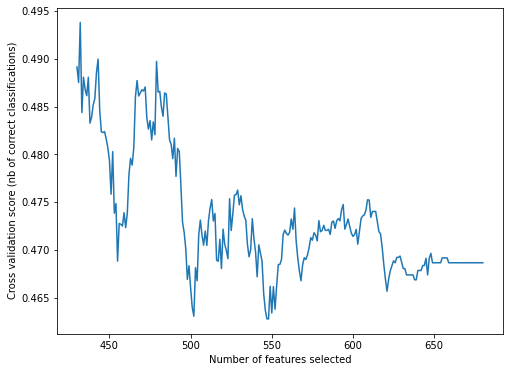

Number of features:  448
['WC_liwc', 'WPS_liwc', 'Sixltr_liwc', 'ipron_liwc', 'number_liwc', 'posemo_liwc', 'tentat_liwc', 'differ_liwc', 'percept_liwc', 'bio_liwc', 'body_liwc', 'health_liwc', 'reward_liwc', 'leisure_liwc', 'home_liwc', 'informal_liwc', 'swear_liwc', 'Period_liwc', 'Comma_liwc', 'QMark_liwc', 'PERSON_NER', 'CARDINAL_NER', 'PERCENT_NER', 'ORDINAL_NER', 'MONEY_NER', 'FAC_NER', 'abroad', 'accumul', 'achiev', 'adhd', 'administr', 'adult', 'advers', 'affirm', 'after', 'age', 'aggress', 'ahead', 'aid', 'all', 'although', 'analyz', 'antidepress', 'anyon', 'approxim', 'aren', 'autism', 'avoid', 'bacteri', 'bas', 'be', 'becaus', 'beg', 'begin', 'belief', 'berg', 'biggest', 'billion', 'bissau', 'boil', 'bore', 'both', 'bout', 'brain', 'brand', 'by', 'ca', 'california', 'caregiv', 'categori', 'causat', 'cb', 'cdc', 'center', 'charg', 'chosen', 'ci', 'circul', 'claim', 'classen', 'cognit', 'columbia', 'com', 'come', 'commiss', 'commun', 'complex', 'complic', 'comprehend', 'concer

In [ ]:
plt.rcParams["figure.figsize"] = (8, 6) # (w, h)
_, _, vac_important_features = get_important_features(vaccination_X_overlap, 
                                      vaccination_Y, 
                                      num_important_features=430)

In [ ]:
vac_pipeline = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 20), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
vac_important_features = ['WC_liwc', 'WPS_liwc', 'Sixltr_liwc', 'ipron_liwc', 'number_liwc', 'posemo_liwc', 'tentat_liwc', 'differ_liwc', 'percept_liwc', 'bio_liwc', 'body_liwc', 'health_liwc', 'reward_liwc', 'leisure_liwc', 'home_liwc', 'informal_liwc', 'swear_liwc', 'Period_liwc', 'Comma_liwc', 'QMark_liwc', 'PERSON_NER', 'CARDINAL_NER', 'PERCENT_NER', 'ORDINAL_NER', 'MONEY_NER', 'FAC_NER', 'abroad', 'accumul', 'achiev', 'adhd', 'administr', 'adult', 'advers', 'affirm', 'after', 'age', 'aggress', 'ahead', 'aid', 'all', 'although', 'analyz', 'antidepress', 'anyon', 'approxim', 'aren', 'autism', 'avoid', 'bacteri', 'bas', 'be', 'becaus', 'beg', 'begin', 'belief', 'berg', 'biggest', 'billion', 'bissau', 'boil', 'bore', 'both', 'bout', 'brain', 'brand', 'by', 'ca', 'california', 'caregiv', 'categori', 'causat', 'cb', 'cdc', 'center', 'charg', 'chosen', 'ci', 'circul', 'claim', 'classen', 'cognit', 'columbia', 'com', 'come', 'commiss', 'commun', 'complex', 'complic', 'comprehend', 'concern', 'condemn', 'conditions', 'confer', 'confin', 'confirm', 'conflict', 'congress', 'connect', 'conserv', 'continu', 'copi', 'corrupt', 'countri', 'cover', 'creat', 'criteria', 'cross', 'current', 'data', 'deadliest', 'demonstr', 'describ', 'described', 'design', 'detect', 'diagnost', 'diarrhea', 'did', 'difficult', 'diptheria', 'director', 'discourag', 'discredit', 'disease', 'disneyland', 'disproven', 'disput', 'docu', 'document', 'dollar', 'don', 'donald', 'done', 'door', 'dozen', 'dramat', 'drop', 'dt', 'dtap', 'dtp', 'dumb', 'dysfunct', 'each', 'ear', 'earli', 'entrust', 'environ', 'epub', 'erad', 'establish', 'eventu', 'everyon', 'everyth', 'evid', 'evidenc', 'excel', 'explos', 'facad', 'face', 'fault', 'febril', 'few', 'final', 'financi', 'finnish', 'formul', 'gain', 'gallagh', 'genet', 'girl', 'given', 'go', 'got', 'govern', 'grow', 'guid', 'guinea', 'ha', 'haemophilu', 'handl', 'happen', 'harbor', 'harm', 'harvard', 'hasn', 'hazard', 'hbv', 'heat', 'heavili', 'hh', 'home', 'howev', 'hypothesi', 'ii', 'iii', 'illness', 'impact', 'improv', 'inactiv', 'increasingli', 'induc', 'industri', 'infect', 'influenc', 'ingredi', 'inher', 'inject', 'injur', 'injuri', 'inorgan', 'insert', 'instanc', 'intens', 'interfer', 'iron', 'isn', 'isol', 'jenner', 'jenni', 'kid', 'knowledg', 'lab', 'lancet', 'large', 'largest', 'last', 'later', 'lbw', 'leader', 'least', 'less', 'leukemia', 'liabil', 'life', 'like', 'likewis', 'link', 'list', 'literatur', 'liver', 'london', 'long', 'major', 'male', 'mammalian', 'manufactur', 'massiv', 'matter', 'may', 'medicaid', 'medicine', 'meningococc', 'method', 'methyl', 'metropolitan', 'mice', 'might', 'mild', 'minut', 'misrepresent', 'monitor', 'mortal', 'most', 'mostli', 'much', 'multipl', 'my', 'myelin', 'myth', 'name', 'nearli', 'nervou', 'neurotoxin', 'newer', 'nine', 'nonprofit', 'notion', 'nourish', 'obviou', 'occur', 'oppon', 'oppos', 'opposit', 'opt', 'opthalmolog', 'org', 'other', 'out', 'outbreak', 'outright', 'over', 'overgrowth', 'overload', 'paper', 'paradox', 'parent', 'patent', 'pediatrician', 'percentag', 'period', 'persist', 'peter', 'phd', 'phenotyp', 'playmat', 'plummet', 'pneumococcu', 'polioviru', 'possible', 'prenat', 'prescript', 'prioriti', 'probabl', 'procedur', 'produc', 'profit', 'propon', 'public', 'pump', 'purport', 'push', 'quick', 'race', 'rare', 'reach', 'reaffirm', 'realiz', 'reason', 'recev', 'recipi', 'recogn', 'recommend', 'recomplet', 'record', 'reformul', 'regul', 'rehash', 'reimmunized', 'repres', 'respected', 'respond', 'review', 'rigor', 'risen', 'role', 'routin', 'rural', 'sage', 'scal', 'scientif', 'scientist', 'sclerosi', 'scrutin', 'search', 'second', 'seem', 'serious', 'serotonin', 'seven', 'sever', 'share', 'ship', 'should', 'sick', 'side', 'signific', 'simpli', 'site', 'six', 'sixfold', 'sixty', 'skin', 'small', 'socioeconom', 'solut', 'specul', 'stabl', 'start', 'starv', 'statist', 'stimul', 'stop', 'suggest', 'suppos', 'suprem', 'surgeon', 'survey', 'sway', 'swell', 'systemat', 'take', 'talk', 'tax', 'telephon', 'ten', 'that', 'the', 'them', 'theoret', 'these', 'thi', 'thimerosal', 'thought', 'time', 'topic', 'toxic', 'toxoid', 'tri', 'true', 'truli', 'truth', 'type', 'unavoid', 'unit', 'unsafe', 'unten', 'up', 'uptak', 'vacat', 'vaer', 'vast', 'vastli', 'virologist', 'virtual', 'visual', 'vitamin', 'vocal', 'was', 'way', 'weaker', 'weigh', 'weight', 'well', 'went', 'whatev', 'whi', 'whit', 'white', 'who', 'whole', 'with', 'wo', 'word', 'work', 'write', 'year', 'younger', 'subjectivity_sent']


Generation 1 - Current best internal CV score: 0.8029880125252177

Generation 2 - Current best internal CV score: 0.8029880125252177

Generation 3 - Current best internal CV score: 0.8049376082854343

Generation 4 - Current best internal CV score: 0.8049376082854343

Generation 5 - Current best internal CV score: 0.8049376082854343

Best pipeline: MLPClassifier(MLPClassifier(input_matrix, activation=logistic, hidden_layer_sizes=(50, 20), learning_rate=adaptive, max_iter=1000), activation=relu, hidden_layer_sizes=(30, 20), learning_rate=adaptive, max_iter=1000)


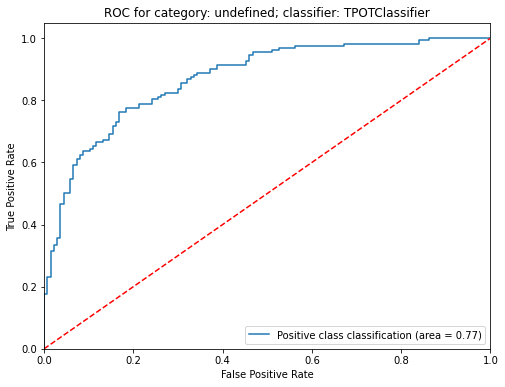

              precision    recall  f1-score   support

           0       0.77      0.74      0.76       137
           1       0.78      0.80      0.79       152

    accuracy                           0.78       289
   macro avg       0.77      0.77      0.77       289
weighted avg       0.78      0.78      0.77       289



In [ ]:
tpot_vac = teapot_optimizer(vaccination_X_overlap, 
                            vaccination_Y,
                            important_features = vac_important_features,
                            standarize=True)
vac_pipeline = tpot_vac.fitted_pipeline_.steps[-1][1]
# pickle.dump(tpot_vac.fitted_pipeline_, open('/content/drive/My Drive/Colab Notebooks/vac_fitted_pipeline.p','wb'))

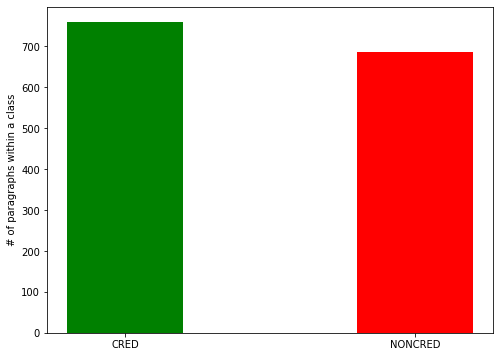

Counter({0: 685, 1: 759})

In [ ]:
vac_label_counter = Counter(vaccination_Y)
plt.bar(x=['CRED', 'NONCRED'], height=vac_label_counter.values(), width=0.4, color=['g', 'r'])
plt.ylabel('# of paragraphs within a class')
plt.show()
vac_label_counter

In [ ]:
mean_weighted_f1(vac_pipeline, vaccination_X_overlap[vac_important_features], vaccination_Y, 20, 0.2)

Mean weighted f1:  0.9180682523615161  STD:  0.01771948049499377
Mean micro f1:  0.9181660899653981  STD:  0.017720689055677034


In [41]:
mean_precision(vac_pipeline, vaccination_X_overlap[vac_important_features], vaccination_Y, 20, 0.2)

Mean precision for class 1:  0.9137764868787315  STD:  0.032893399963213596
Mean accuracy for class 1:  0.9204152249134946  STD:  0.01963496326520569


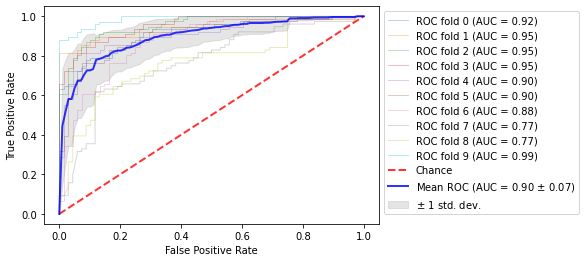

In [43]:
show_auc_for_cv(vac_pipeline, vaccination_X_overlap[vac_important_features], vaccination_Y, n_splits=10)

In [ ]:
vac_scaled_X = standard_scaler.fit_transform(vaccination_X_overlap[vac_important_features])
vac_scaled_X = pd.DataFrame(vac_scaled_X, columns=vac_important_features)
X_train, X_test, y_train, y_test = train_test_split(vac_scaled_X, 
                                                      vaccination_Y, 
                                                      test_size=0.2, 
                                                      stratify=vaccination_Y)
vac_pipeline.fit(X_train, y_train)
explainer = ClassifierExplainer(vac_pipeline, X_test, y_test)
# ie  = InlineExplainer(explainer)
# ie.classifier.model_stats()

Note: shap values for shap='kernel' normally get calculated against X_background, but paramater X_background=None, so setting X_background=shap.sample(X, 50)...
Generating self.shap_explainer = shap.KernelExplainer(model, X, link='identity')


In [36]:
ie  = InlineExplainer(explainer)
ie.classifier.model_stats()

/usr/local/lib/python3.7/dist-packages/jupyter_dash/jupyter_app.py:139: UserWarning:

The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.



<IPython.core.display.Javascript object>

### Non-overlapping paragraphs

In [ ]:
print(np.shape(vaccination_X))
print(np.shape(vaccination_Y_no))

(482, 2854)
(482,)


In [ ]:
482*0.3

144.6

Running RFE to find the most supportive features
Optimal number of features according to RFE : 1434


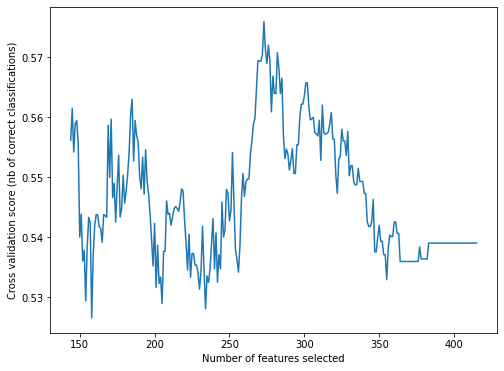

Number of features:  144
['Sixltr_liwc', 'social_liwc', 'differ_liwc', 'academi', 'achiev', 'addit', 'against', 'age', 'all', 'amount', 'anoth', 'are', 'aren', 'argument', 'be', 'beyond', 'ca', 'catch', 'cdc', 'co', 'confirm', 'contrast', 'copi', 'corpor', 'cross', 'current', 'dead', 'deal', 'demonstr', 'described', 'discredit', 'disease', 'disproven', 'drop', 'encount', 'especi', 'excel', 'exercis', 'experienc', 'experiment', 'exposur', 'extrapol', 'factor', 'flu', 'fre', 'gain', 'genet', 'girl', 'go', 'handl', 'harm', 'hassl', 'healthi', 'hemispher', 'here', 'hh', 'howev', 'ii', 'imposs', 'inactiv', 'incid', 'increasingli', 'induc', 'ingredi', 'inject', 'insuffici', 'intens', 'inﬂuenza', 'is', 'kept', 'larg', 'last', 'least', 'link', 'list', 'live', 'mark', 'mercury', 'mistrust', 'multipl', 'my', 'myth', 'net', 'never', 'none', 'oppos', 'opposit', 'or', 'other', 'paradox', 'patent', 'pediatrician', 'percentag', 'phase', 'plu', 'plummet', 'problem', 'profound', 'public', 'question', '

In [ ]:
plt.rcParams["figure.figsize"] = (8, 6) # (w, h)
_, _, vac_important_features = get_important_features(vaccination_X, 
                                      vaccination_Y_no, 
                                      num_important_features=144)


Generation 1 - Current best internal CV score: 0.7242063492063493

Generation 2 - Current best internal CV score: 0.7242063492063493

Generation 3 - Current best internal CV score: 0.7242063492063493

Best pipeline: MLPClassifier(MLPClassifier(input_matrix, activation=logistic, hidden_layer_sizes=(30, 20), learning_rate=adaptive, max_iter=1000), activation=logistic, hidden_layer_sizes=(30, 20), learning_rate=adaptive, max_iter=1000)


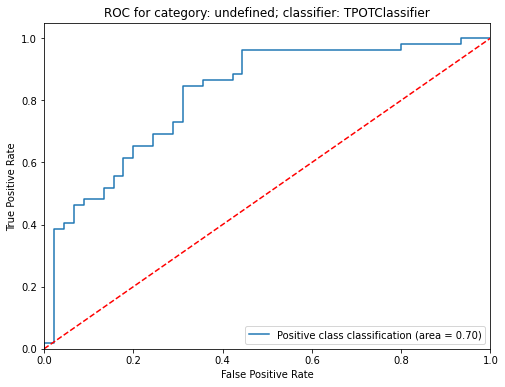

              precision    recall  f1-score   support

           0       0.65      0.76      0.70        45
           1       0.76      0.65      0.70        52

    accuracy                           0.70        97
   macro avg       0.70      0.70      0.70        97
weighted avg       0.71      0.70      0.70        97



In [ ]:
tpot_vac = teapot_optimizer(vaccination_X, 
                            vaccination_Y_no,
                            important_features = vac_important_features,
                            standarize=True)
vac_pipeline = tpot_vac.fitted_pipeline_.steps[-1][1]

In [ ]:
vac_pipeline = MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 20), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
vac_important_features = ['Sixltr_liwc', 'social_liwc', 'differ_liwc', 'academi', 'achiev', 'addit', 'against', 'age', 'all', 'amount', 'anoth', 'are', 'aren', 'argument', 'be', 'beyond', 'ca', 'catch', 'cdc', 'co', 'confirm', 'contrast', 'copi', 'corpor', 'cross', 'current', 'dead', 'deal', 'demonstr', 'described', 'discredit', 'disease', 'disproven', 'drop', 'encount', 'especi', 'excel', 'exercis', 'experienc', 'experiment', 'exposur', 'extrapol', 'factor', 'flu', 'fre', 'gain', 'genet', 'girl', 'go', 'handl', 'harm', 'hassl', 'healthi', 'hemispher', 'here', 'hh', 'howev', 'ii', 'imposs', 'inactiv', 'incid', 'increasingli', 'induc', 'ingredi', 'inject', 'insuffici', 'intens', 'inﬂuenza', 'is', 'kept', 'larg', 'last', 'least', 'link', 'list', 'live', 'mark', 'mercury', 'mistrust', 'multipl', 'my', 'myth', 'net', 'never', 'none', 'oppos', 'opposit', 'or', 'other', 'paradox', 'patent', 'pediatrician', 'percentag', 'phase', 'plu', 'plummet', 'problem', 'profound', 'public', 'question', 'reach', 'recev', 'recogn', 'recommend', 'refus', 'regress', 'replac', 'resurg', 'retract', 'review', 'rigor', 'sampl', 'save', 'scientif', 'size', 'some', 'start', 'stay', 'stimul', 'strain', 'strict', 'strongli', 'student', 'suppli', 'suppos', 'talk', 'these', 'thi', 'thimerosal', 'track', 'treat', 'trial', 'true', 'typ', 'unit', 'vaer', 'vaxx', 'was', 'weaker', 'weakest', 'western', 'wipe', 'work', 'your']

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

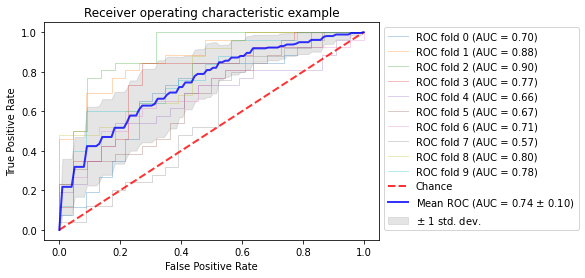

In [ ]:
show_auc_for_cv(vac_pipeline, vaccination_X[vac_important_features], vaccination_Y_no, n_splits=10)

In [ ]:
mean_precision(vac_pipeline, vaccination_X[vac_important_features], vaccination_Y_no, 20, 0.3)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

Mean precision for class 1:  0.7897822366407911  STD:  0.03182841820818596


In [ ]:
mean_weighted_f1(vac_pipeline, vaccination_X[vac_important_features], vaccination_Y_no, 20, 0.3)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

Mean weighted f1:  0.7730845362435563  STD:  0.029501034799699698
Mean micro f1:  0.7734482758620691  STD:  0.029443914721888127


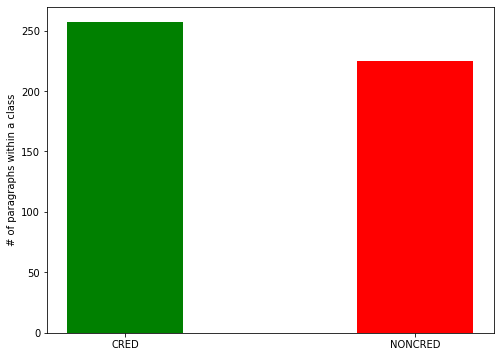

Counter({0: 225, 1: 257})

In [ ]:
vac_label_counter = Counter(vaccination_Y_no)
plt.bar(x=['CRED', 'NONCRED'], height=vac_label_counter.values(), width=0.4, color=['g', 'r'])
plt.ylabel('# of paragraphs within a class')
plt.show()
vac_label_counter

Model: MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 20), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
Loading LIME feature importance retrieval model...


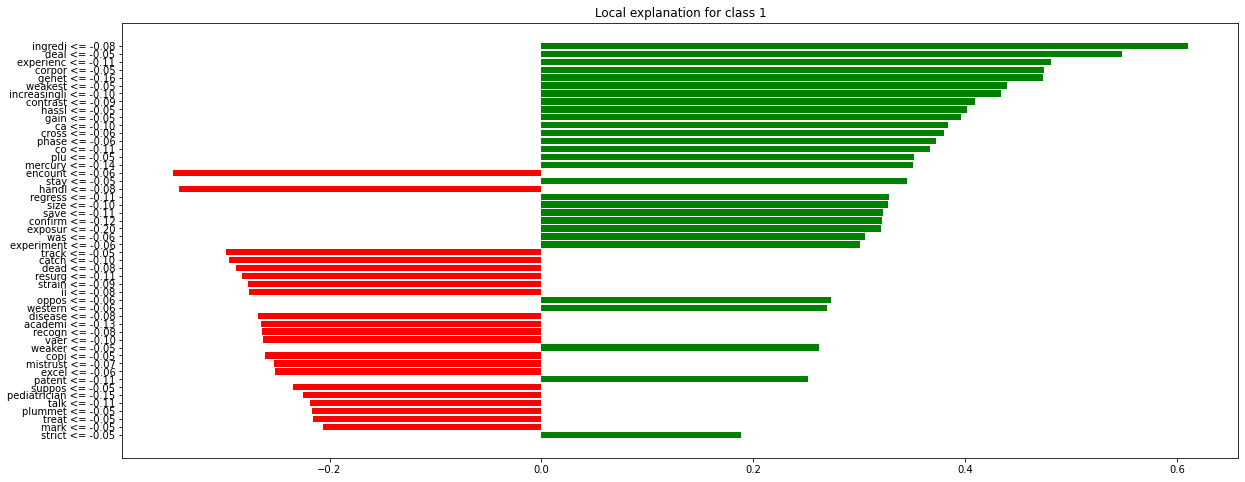

In [ ]:
plt.rcParams["figure.figsize"] = (20, 8) # (w, h)
proba_1, proba_0, vaccination_clf = predict_proba_hist(vac_pipeline, 
                                      vaccination_X, 
                                      vaccination_Y_no, 
                                      vac_important_features)

## statins

### Overlapping paragraphs

In [44]:
print(np.shape(statins_X_overlap))
print(np.shape(statins_Y))

(1917, 3599)
(1917,)


In [ ]:
1917*0.3

575.1

In [ ]:
statins_X_overlap.head()

WC_liwc  Analytic_liwc  ...  polarity_sent  subjectivity_sent
0       56          98.29  ...       0.275000           0.475000
1       53          93.26  ...       0.300000           0.500000
2       84          74.10  ...       0.242000           0.428000
3       76          64.39  ...       0.242000           0.428000
4      101          92.29  ...       0.035848           0.466905

[5 rows x 3536 columns]

Running RFE to find the most supportive features
Optimal number of features according to RFE : 1606


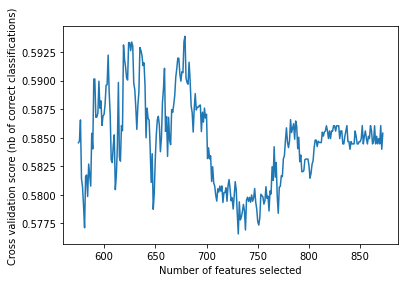

Number of features:  575
['Analytic_liwc', 'pronoun_liwc', 'i_liwc', 'ipron_liwc', 'negate_liwc', 'interrog_liwc', 'negemo_liwc', 'sad_liwc', 'cogproc_liwc', 'insight_liwc', 'cause_liwc', 'see_liwc', 'feel_liwc', 'bio_liwc', 'health_liwc', 'drives_liwc', 'achieve_liwc', 'reward_liwc', 'motion_liwc', 'money_liwc', 'death_liwc', 'netspeak_liwc', 'Comma_liwc', 'QMark_liwc', 'Apostro_liwc', 'GPE_NER', 'ORG_NER', 'ORDINAL_NER', 'DATE_NER', 'TIME_NER', 'PRODUCT_NER', 'abov', 'acc', 'accept', 'admit', 'adolesc', 'adult', 'adulthood', 'advertis', 'afford', 'afraid', 'age', 'agency', 'ail', 'allevi', 'also', 'altern', 'alway', 'america', 'anecdot', 'angri', 'annual', 'anoth', 'antagonist', 'anymor', 'appar', 'approv', 'are', 'aren', 'arora', 'at', 'ate', 'atherosclerosi', 'attack', 'attempt', 'attribut', 'away', 'basi', 'be', 'been', 'belch', 'believ', 'below', 'between', 'bizarr', 'blind', 'blood', 'boast', 'boil', 'bombard', 'book', 'bound', 'breakthrough', 'brief', 'bring', 'brisk', 'broad',

In [ ]:
_, _, statins_important_features = get_important_features(statins_X_overlap, 
                                      statins_Y, 
                                      num_important_features=575)


Generation 1 - Current best internal CV score: 0.8126391334223161

Generation 2 - Current best internal CV score: 0.8211929432278273

Generation 3 - Current best internal CV score: 0.8211929432278273

Best pipeline: MLPClassifier(MLPClassifier(input_matrix, activation=relu, hidden_layer_sizes=(30, 20), learning_rate=adaptive, max_iter=1000), activation=logistic, hidden_layer_sizes=(30, 20), learning_rate=adaptive, max_iter=1000)


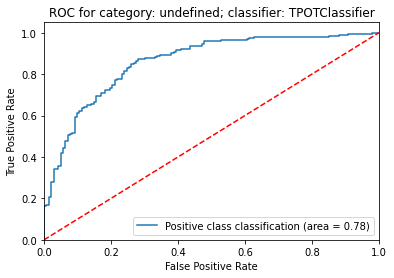

              precision    recall  f1-score   support

           0       0.69      0.76      0.72       142
           1       0.85      0.80      0.83       242

    accuracy                           0.79       384
   macro avg       0.77      0.78      0.78       384
weighted avg       0.79      0.79      0.79       384



In [ ]:
tpot_statins = teapot_optimizer(statins_X_overlap, 
                             statins_Y,
                             important_features = statins_important_features)
# pickle.dump(tpot_stat.fitted_pipeline_, open('/content/drive/My Drive/Colab Notebooks/stat_fitted_pipeline.p','wb'))

In [ ]:
statins_fitted_pipeline = tpot_statins.fitted_pipeline_.steps[-1][1]

In [46]:
stat_pipeline = MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08, hidden_layer_sizes=(30, 20), learning_rate='adaptive', learning_rate_init=0.001, max_fun=15000, max_iter=1000, momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5, random_state=None, shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False, warm_start=False)
stat_important_features = ['Analytic_liwc', 'pronoun_liwc', 'i_liwc', 'ipron_liwc', 'negate_liwc', 'interrog_liwc', 'negemo_liwc', 'sad_liwc', 'cogproc_liwc', 'insight_liwc', 'cause_liwc', 'see_liwc', 'feel_liwc', 'bio_liwc', 'health_liwc', 'drives_liwc', 'achieve_liwc', 'reward_liwc', 'motion_liwc', 'money_liwc', 'death_liwc', 'netspeak_liwc', 'Comma_liwc', 'QMark_liwc', 'Apostro_liwc', 'GPE_NER', 'ORG_NER', 'ORDINAL_NER', 'DATE_NER', 'TIME_NER', 'PRODUCT_NER', 'abov', 'acc', 'accept', 'admit', 'adolesc', 'adult', 'adulthood', 'advertis', 'afford', 'afraid', 'age', 'agency', 'ail', 'allevi', 'also', 'altern', 'alway', 'america', 'anecdot', 'angri', 'annual', 'anoth', 'antagonist', 'anymor', 'appar', 'approv', 'are', 'aren', 'arora', 'at', 'ate', 'atherosclerosi', 'attack', 'attempt', 'attribut', 'away', 'basi', 'be', 'been', 'belch', 'believ', 'below', 'between', 'bizarr', 'blind', 'blood', 'boast', 'boil', 'bombard', 'book', 'bound', 'breakthrough', 'brief', 'bring', 'brisk', 'broad', 'brodi', 'build', 'buildup', 'bunch', 'busi', 'businessweek', 'but', 'buzzword', 'cal', 'can', 'car', 'cardiovascular', 'carry', 'caus', 'cell', 'cerebr', 'certain', 'chang', 'chart', 'cheekbon', 'choos', 'chose', 'claim', 'clear', 'clinic', 'clot', 'coa', 'column', 'come', 'compar', 'complaint', 'conclud', 'conspicu', 'constrict', 'consum', 'consumption', 'content', 'continu', 'contradict', 'convent', 'convers', 'coronari', 'could', 'counter', 'cramp', 'crestor', 'criticis', 'culprit', 'cv', 'danger', 'data', 'date', 'day', 'decad', 'declin', 'densiti', 'deplet', 'deriv', 'desir', 'destabil', 'destroy', 'diagnos', 'diagnosi', 'differ', 'difficult', 'discomfort', 'diseas', 'disease', 'dispos', 'disrupt', 'dissolv', 'distort', 'doesn', 'dollar', 'dos', 'drain', 'dysfunct', 'easili', 'elderli', 'elev', 'elimin', 'encount', 'endors', 'endpoint', 'enorm', 'enough', 'entitl', 'erectil', 'estrogen', 'everi', 'everybodi', 'everyon', 'exact', 'exactli', 'examin', 'excel', 'except', 'excret', 'explan', 'exposur', 'express', 'extract', 'extreme', 'eye', 'fact', 'factor', 'fall', 'familiar', 'far', 'fashion', 'fatti', 'feedback', 'feel', 'femal', 'fewer', 'fifti', 'first', 'fit', 'flaw', 'fluffi', 'follow', 'food', 'forc', 'formul', 'formula', 'fortun', 'forum', 'fructos', 'function', 'fundament', 'funni', 'further', 'furthermor', 'ga', 'gave', 'genuin', 'glanc', 'gloss', 'gold', 'gp', 'graveyard', 'gross', 'ha', 'halt', 'hand', 'harlan', 'hasn', 'hdl', 'heal', 'health', 'healthi', 'heard', 'heighten', 'help', 'herbal', 'here', 'hmg', 'hour', 'howev', 'huge', 'hundr', 'hypothesis', 'ideal', 'identif', 'identifi', 'ignor', 'impair', 'import', 'imprint', 'inabl', 'incid', 'includ', 'incom', 'incred', 'ineffect', 'ingredi', 'injuri', 'insignific', 'instanc', 'instantli', 'instruct', 'interact', 'interest', 'intermedi', 'internet', 'intestin', 'intuit', 'invers', 'just', 'justifi', 'kidney', 'know', 'lab', 'larger', 'last', 'latest', 'least', 'left', 'less', 'licens', 'lifestyl', 'lik', 'limit', 'lip', 'lipid', 'live', 'lost', 'lower', 'made', 'maintain', 'male', 'marker', 'market', 'materi', 'may', 'meagr', 'meal', 'meanwhil', 'measur', 'mediat', 'medic', 'medit', 'messag', 'met', 'meta', 'methodolog', 'microwav', 'mid', 'might', 'milligram', 'misconcept', 'misinform', 'miss', 'mitochondri', 'money', 'morbid', 'multipl', 'must', 'narrow', 'nasti', 'neurolog', 'never', 'nonfat', 'normal', 'not', 'notabl', 'notifi', 'notion', 'now', 'number', 'offal', 'older', 'oliv', 'omega', 'ongo', 'opportun', 'opposit', 'option', 'orthodoxi', 'our', 'out', 'outrag', 'outweigh', 'over', 'overal', 'overcom', 'overestim', 'oxygen', 'pack', 'page', 'pamm', 'particip', 'particularli', 'partisan', 'pattern', 'peopl', 'percentag', 'perfect', 'person', 'pharma', 'pharmaceut', 'pharmaci', 'place', 'poach', 'pool', 'poorli', 'popularli', 'power', 'precursor', 'predict', 'presenc', 'prevail', 'prevent', 'previou', 'problem', 'produc', 'profession', 'profil', 'program', 'proper', 'protect', 'provabl', 'prudent', 'put', 'quantiti', 'question', 'quit', 'rack', 'rate', 'rather', 'ratio', 'raw', 're', 'reactiv', 'read', 'real', 'realiz', 'reassur', 'recess', 'recommend', 'recurr', 'redefin', 'reduc', 'reductas', 'refresh', 'refus', 'regularly', 'reimburs', 'reintroduc', 'relationship', 'relentlessli', 'relev', 'reliabl', 'reput', 'research', 'rest', 'restor', 'return', 'reus', 'revenu', 'review', 'reward', 'right', 'rigor', 'roughli', 'routin', 'rule', 'safest', 'save', 'saw', 'search', 'second', 'seem', 'seen', 'selenium', 'servic', 'sever', 'she', 'shoot', 'should', 'shown', 'significantli', 'simpl', 'skeptic', 'slightli', 'slope', 'smaller', 'smartest', 'smoker', 'snowmass', 'so', 'sole', 'some', 'sophist', 'sourc', 'speak', 'special', 'spectrum', 'spike', 'squar', 'starchi', 'start', 'starter', 'state', 'states', 'steam', 'step', 'stop', 'store', 'strang', 'streak', 'stream', 'stronger', 'stuff', 'subject', 'subsequ', 'substanti', 'subtract', 'suddenli', 'summari', 'sunday', 'surpris', 'sweating', 'switch', 'synergis', 'synthes', 'synthesi', 'system', 'systemat', 'talk', 'tank', 'tend', 'test', 'that', 'their', 'themselv', 'theori', 'therebi', 'therefor', 'thicken', 'thicker', 'thing', 'third', 'threshold', 'through', 'thu', 'tip', 'too', 'took', 'top', 'topic', 'tran', 'transport', 'treatment', 'triglycerid', 'trigylcerid', 'troubl', 'twice', 'two', 'type', 'typic', 'ultra', 'uncertain', 'under', 'underli', 'underst', 'unequivoc', 'unhealthi', 'uniformli', 'univers', 'unless', 'unreal', 'untreat', 'upon', 'upset', 'user', 'usual', 'valuabl', 'vari', 've', 'veggi', 'versu', 'vet', 'via', 'view', 'vldl', 'wall', 'want', 'wateri', 'we', 'weaken', 'weight', 'what', 'whi', 'white', 'wildli', 'will', 'women', 'wors', 'worthless', 'worthwhil', 'wrote', 'yep', 'you', 'your', 'zealou', 'polarity_sent', 'subjectivity_sent']

In [ ]:
mean_weighted_f1(statins_fitted_pipeline, statins_X_overlap[statins_important_features], statins_Y, 20, 0.2)

Mean weighted f1:  0.8583300520649363  STD:  0.015519736510042537
Mean micro f1:  0.8591145833333333  STD:  0.015470152854457445


In [ ]:
mean_precision(stat_pipeline, statins_X_overlap[stat_important_features], statins_Y, 20, 0.2)

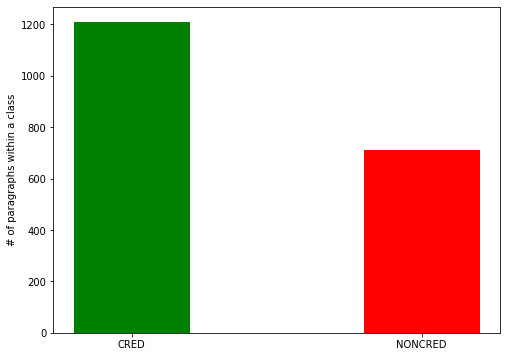

Counter({0: 709, 1: 1208})

In [ ]:
stat_label_counter = Counter(statins_Y)
plt.bar(x=['CRED', 'NONCRED'], height=stat_label_counter.values(), width=0.4, color=['g', 'r'])
plt.ylabel('# of paragraphs within a class')
plt.show()
stat_label_counter

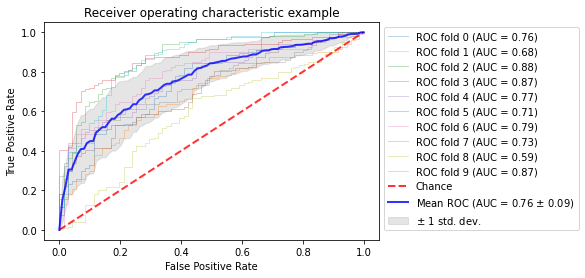

In [ ]:
show_auc_for_cv(statins_fitted_pipeline, statins_X_overlap[statins_important_features], statins_Y, n_splits=10)

Model: MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 20), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
Loading LIME feature importance retrieval model...


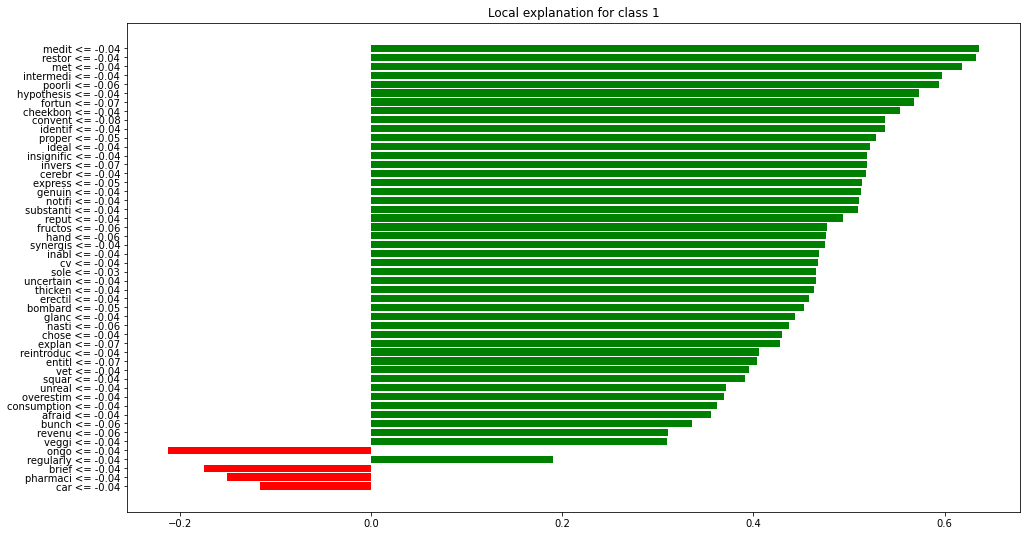

In [ ]:
plt.rcParams["figure.figsize"] = (16, 9) # (w, h)
proba_1, proba_0, statins_clf = predict_proba_hist(statins_fitted_pipeline, 
                                      statins_X_overlap , 
                                      statins_Y, 
                                      statins_important_features)

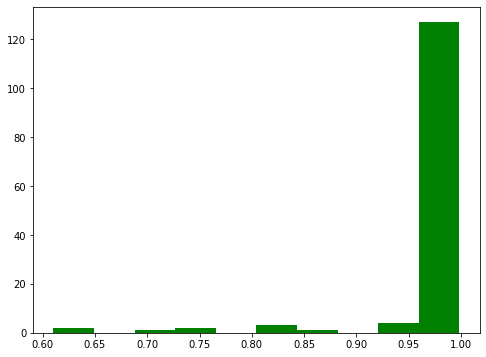

In [ ]:
plt.rcParams["figure.figsize"] = (8, 6) # (w, h)
plt.hist(proba_1.values(), bins=10, color='g')
plt.show()

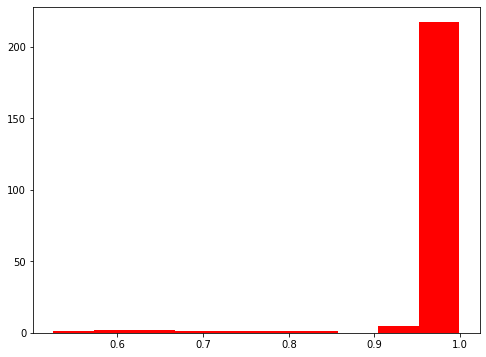

In [ ]:
plt.hist(proba_0.values(), bins=10, color='r')
plt.show()

### Non-overlapping paragraphs

In [ ]:
print(np.shape(statins_X))
print(np.shape(statins_Y_no))

In [ ]:
639*0.3

Running RFE to find the most supportive features
Optimal number of features according to RFE : 577


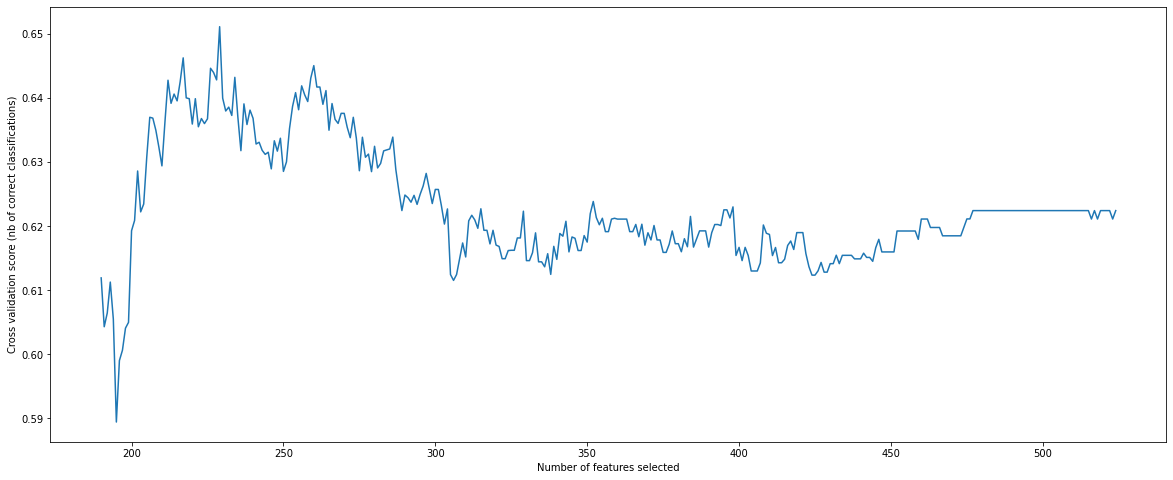

Number of features:  190
['function_liwc', 'pronoun_liwc', 'ipron_liwc', 'negate_liwc', 'interrog_liwc', 'cause_liwc', 'tentat_liwc', 'health_liwc', 'focusfuture_liwc', 'money_liwc', 'QMark_liwc', 'Apostro_liwc', 'across', 'alcohol', 'also', 'antioxid', 'apoprotein', 'arora', 'asterisk', 'attempt', 'becom', 'better', 'between', 'blame', 'blood', 'boast', 'bring', 'broil', 'cancer', 'case', 'certain', 'chose', 'close', 'clot', 'coconut', 'come', 'common', 'conclud', 'constrict', 'consum', 'consumption', 'contrast', 'convent', 'dementia', 'deriv', 'destabil', 'develop', 'diagnos', 'diagnosi', 'differ', 'disease', 'dispos', 'doctor', 'dos', 'doses', 'drink', 'easi', 'eat', 'effici', 'emphysema', 'entir', 'everybodi', 'exampl', 'excess', 'experienc', 'fact', 'factor', 'favor', 'fewer', 'fill', 'flour', 'fluffi', 'food', 'for', 'fortun', 'frame', 'glanc', 'gp', 'gun', 'hdl', 'healthi', 'herein', 'ideal', 'identif', 'ill', 'inabl', 'inflamm', 'insuffici', 'intermedi', 'intestin', 'journal', 

In [ ]:
_, _, statins_important_features = get_important_features(statins_X, 
                                      statins_Y_no, 
                                      num_important_features=190)


Generation 1 - Current best internal CV score: 0.8347587412587412

Generation 2 - Current best internal CV score: 0.8674855977355979

Generation 3 - Current best internal CV score: 0.8674855977355979

Best pipeline: MLPClassifier(GradientBoostingClassifier(GradientBoostingClassifier(input_matrix)), activation=relu, hidden_layer_sizes=(30, 20), learning_rate=adaptive, max_iter=1000)


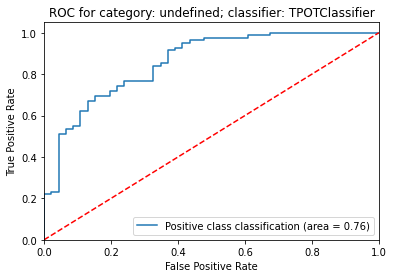

              precision    recall  f1-score   support

           0       0.80      0.61      0.69        46
           1       0.81      0.91      0.86        82

    accuracy                           0.80       128
   macro avg       0.80      0.76      0.77       128
weighted avg       0.80      0.80      0.80       128



In [ ]:
tpot_statins = teapot_optimizer(statins_X, 
                             statins_Y_no,
                             important_features = statins_important_features)
# pickle.dump(tpot_stat.fitted_pipeline_, open('/content/drive/My Drive/Colab Notebooks/stat_fitted_pipeline.p','wb'))

In [ ]:
statins_fitted_pipeline = tpot_statins.fitted_pipeline_.steps[-1][1]

In [ ]:
mean_weighted_f1(statins_fitted_pipeline, statins_X[statins_important_features], statins_Y_no, 20, 0.2)

Mean weighted f1:  0.7601241901809012  STD:  0.03064273190430953
Mean micro f1:  0.763671875  STD:  0.029530319925830044


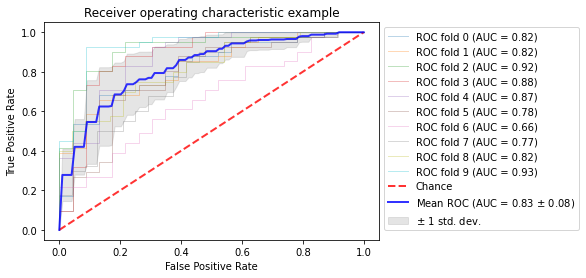

In [ ]:
show_auc_for_cv(statins_fitted_pipeline, statins_X[statins_important_features], statins_Y_no, n_splits=10)

Mean weighted precision for class 1:  0.7449337544652709  STD:  0.0316908743627545


Model: MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 20), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
Loading LIME feature importance retrieval model...


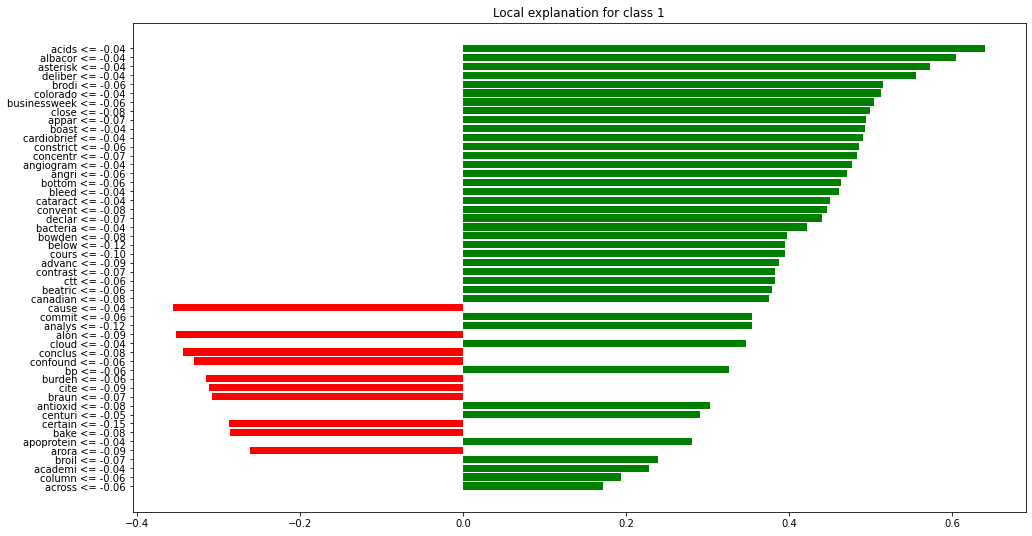

In [ ]:
plt.rcParams["figure.figsize"] = (16, 9) # (w, h)
proba_1, proba_0, statins_clf = predict_proba_hist(statins_fitted_pipeline, 
                                      statins_X, 
                                      statins_Y, 
                                      statins_important_features)

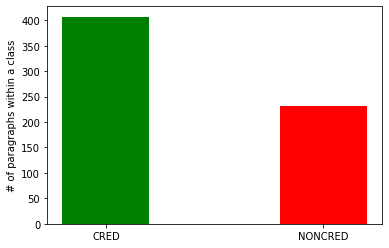

Counter({0: 232, 1: 407})

In [ ]:
stat_label_counter = Counter(statins_Y_no)
plt.bar(x=['CRED', 'NONCRED'], height=stat_label_counter.values(), width=0.4, color=['g', 'r'])
plt.ylabel('# of paragraphs within a class')
plt.show()
stat_label_counter

## ssri_during_pregnancy

In [ ]:
_, _, ssri_during_pregnancy_important_features = get_important_features(ssri_during_pregnancy_X, 
                                      ssri_during_pregnancy_Y, 
                                      num_important_features=100, 
                                      num_limit=50)

In [ ]:
tpot_ssri_during_pregnancy = teapot_optimizer(ssri_during_pregnancy_X, 
                             ssri_during_pregnancy_Y,
                             important_features = ssri_during_pregnancy_important_features,
                             VALIDATION_SPLIT=0.3,
                             scoring='f1_weighted',
                             cv=5)
ssri_during_pregnancy_fitted_pipeline = tpot_ssri_during_pregnancy.fitted_pipeline_.steps[-1][1]
# pickle.dump(tpot_ssri.fitted_pipeline_, open('/content/drive/My Drive/Colab Notebooks/ssri_fitted_pipeline.p','wb'))

In [ ]:
ssri_important_features = ['Analytic', 'Clout', 'Authentic', 'Tone', 'Dic', 'function', 'pronoun', 'ppron', 'you', 'they', 'article', 'adverb', 'conj', 'verb', 'adj', 'compare', 'interrog', 'number', 'anx', 'social', 'family', 'friend', 'male', 'insight', 'cause', 'see', 'hear', 'bio', 'body', 'health', 'sexual', 'ingest', 'drives', 'achieve', 'reward', 'risk', 'focuspast', 'focuspresent', 'focusfuture', 'relativ', 'time', 'work', 'leisure', 'home', 'money', 'death', 'informal', 'netspeak', 'AllPunc', 'Period', 'Comma', 'SemiC', 'Dash', 'Quote', 'Parenth', 'OtherP', 'PERSON', 'PERCENT', 'LOC', 'aa', 'abil', 'access', 'accompani', 'accord', 'accordingli', 'account', 'acid', 'across', 'act', 'ad', 'address', 'admiss', 'adult', 'advers', 'ae', 'affect', 'against', 'age', 'aj', 'al', 'all', 'also', 'am', 'amarillo', 'american', 'among', 'amount', 'amygdala', 'analysi', 'and', 'ani', 'anick', 'anim', 'anti', 'antidepress', 'appear', 'area', 'assess', 'at', 'author', 'autism', 'balanc', 'base', 'been', 'berard', 'besid', 'better', 'between', 'beyond', 'bifida', 'bipolar', 'birth', 'blood', 'bloodstream', 'bmj', 'board', 'brain', 'bt', 'but', 'cal', 'call', 'can', 'canada', 'candela', 'cardiac', 'care', 'carri', 'ce', 'cent', 'certifi', 'chang', 'chemic', 'child', 'childhood', 'children', 'choic', 'cipralex', 'circuitri', 'citalopram', 'citi', 'claudia', 'clear', 'clinic', 'close', 'clue', 'coauthor', 'cognit', 'colleagu', 'columbia', 'common', 'compar', 'concentr', 'conclud', 'confus', 'consid', 'consult', 'continu', 'contrast', 'contribut', 'correl', 'cortex', 'critic', 'current', 'days', 'dec', 'defect', 'definit', 'delay', 'deliveri', 'depression', 'depressive', 'develop', 'diaz', 'differ', 'difficulti', 'directli', 'discontinu', 'disord', 'disrupt', 'distress', 'do', 'doe', 'doesn', 'durat', 'dure', 'earli', 'educ', 'effici', 'either', 'element', 'email', 'emeritu', 'emot', 'england', 'epidemiolog', 'especi', 'et', 'even', 'everyth', 'exactli', 'examin', 'expect', 'explor', 'exposur', 'factor', 'feb', 'fellow', 'few', 'financi', 'find', 'first', 'fitzgerald', 'five', 'focu', 'follow', 'form', 'forms', 'four', 'from', 'function', 'further', 'gener', 'get', 'given', 'grey', 'grow', 'had', 'hard', 'hartz', 'health', 'hendrick', 'hernandez', 'hi', 'highest', 'highli', 'histori', 'howev', 'hub', 'human', 'hypertens', 'identifi', 'ill', 'immedi', 'impair', 'implic', 'incomplet', 'individu', 'inf', 'influenc', 'inhibitor', 'insuffici', 'insular', 'integr', 'intens', 'into', 'investig', 'involv', 'iq', 'irv', 'isn', 'jiook', 'journal', 'joy', 'juli', 'jun', 'keep', 'key', 'knowledg', 'known', 'kostara', 'late', 'lech', 'left', 'less', 'level', 'levi', 'lik', 'lin', 'linger', 'link', 'longer', 'louik', 'low', 'lower', 'lugo', 'made', 'major', 'mani', 'matter', 'mean', 'meanwhil', 'medic', 'mental', 'meta', 'might', 'mild', 'miscarriag', 'misri', 'mitchel', 'mm', 'monitor', 'month', 'montreal', 'motiv', 'motor', 'must', 'need', 'neonat', 'nerv', 'neural', 'neurolog', 'never', 'new', 'newborn', 'nicu', 'no', 'non', 'normal', 'nortriptylin', 'note', 'nov', 'nurs', 'oberland', 'occur', 'of', 'older', 'on', 'one', 'onli', 'order', 'osborn', 'other', 'our', 'outcom', 'over', 'oxygen', 'pair', 'paroxetin', 'pass', 'patient', 'pediatr', 'percent', 'persist', 'pharmacolog', 'phenomena', 'pictur', 'placenta', 'plasma', 'pool', 'poor', 'pose', 'post', 'postdoctor', 'postnat', 'postpartum', 'pregnanc', 'problem', 'proce', 'produc', 'professor', 'proport', 'provid', 'prozac', 'psychiatri', 'psychologist', 'psychotherapi', 'psychotrop', 'publish', 'pulmonari', 'rais', 'randomli', 'rapidli', 'rare', 'ratio', 'reaction', 'realist', 'realli', 'reassur', 'receiv', 'recent', 'record', 'refer', 'regard', 'region', 'regul', 'rel', 'remedi', 'reproduct', 'research', 'reserv', 'respond', 'reuptak', 'reuter', 'rigg', 'right', 'risk', 'robust', 'rule', 'rurak', 'safe', 'safer', 'satur', 'say', 'scan', 'school', 'second', 'seizur', 'select', 'self', 'sens', 'sensit', 'serotonin', 'seroxat', 'seventi', 'shorter', 'side', 'similar', 'singl', 'size', 'skill', 'sleep', 'smoke', 'smultan', 'so', 'socioeconom', 'some', 'spina', 'spinal', 'ssri', 'stabl', 'state', 'still', 'stop', 'strongest', 'struggl', 'studi', 'studying', 'subject', 'subsequ', 'substanti', 'suggest', 'suicid', 'supervis', 'surpris', 'symptom', 'syndrom', 'tackett', 'tech', 'tell', 'term', 'texa', 'tf', 'that', 'their', 'them', 'there', 'therefor', 'those', 'thought', 'three', 'through', 'transfer', 'transient', 'treat', 'trimest', 'tube', 'unansw', 'unclear', 'underweight', 'uneasi', 'unit', 'univers', 'unless', 'use', 'valproic', 'valu', 'via', 'volum', 'wasn', 'watch', 'way', 'weak', 'weight', 'weissman', 'weren', 'werler', 'which', 'while', 'white', 'whitelaw', 'who', 'will', 'wind', 'withdraw', 'within', 'without', 'woman', 'womb', 'women', 'work', 'worth', 'year', 'york', 'your', 'zero', 'polarity', 'subjectivity']
ssri_pipeline = pickle.load(open('/content/drive/My Drive/Colab Notebooks/ssri_fitted_pipeline.p','rb'))
mean_weighted_f1(ssri_pipeline, ssri_during_pregnancy_X[ssri_important_features], ssri_during_pregnancy_Y, 10, 0.3)

In [ ]:
mean_weighted_f1(ssri_during_pregnancy_fitted_pipeline, 
                 ssri_during_pregnancy_X[ssri_during_pregnancy_important_features], 
                 ssri_during_pregnancy_Y, 
                 5, 
                 0.3)

In [ ]:
show_auc_for_cv(ssri_during_pregnancy_fitted_pipeline, 
                ssri_during_pregnancy_X[ssri_during_pregnancy_important_features], 
                ssri_during_pregnancy_Y, 
                n_splits=5)

In [ ]:
proba_1, proba_0, ssri_clf = predict_proba_hist(ssri_during_pregnancy_fitted_pipeline, 
                                                ssri_during_pregnancy_X, 
                                                ssri_during_pregnancy_Y, 
                                                ssri_during_pregnancy_important_features)

In [ ]:
plt.hist(proba_0.values(), bins=10, color='r')
plt.show()

In [ ]:
plt.hist(proba_1.values(), bins=10, color='g')
plt.show()

## antioxidants

### Overlapping paragraphs

In [ ]:
print(np.shape(antioxidants_X_overlap))
print(np.shape(antioxidants_Y))

(674, 1701)
(674,)


Running RFE to find the most supportive features
Optimal number of features according to RFE : 301


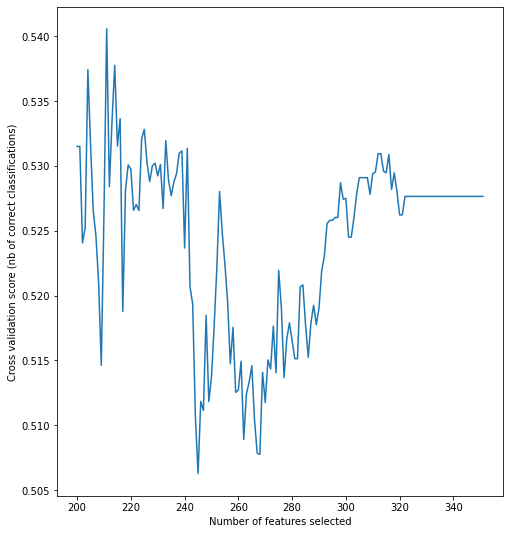

Number of features:  200
['Sixltr_liwc', 'interrog_liwc', 'quant_liwc', 'anger_liwc', 'friend_liwc', 'cause_liwc', 'certain_liwc', 'bio_liwc', 'leisure_liwc', 'assent_liwc', 'Colon_liwc', 'QMark_liwc', 'Apostro_liwc', 'WORK_OF_ART_NER', 'PRODUCT_NER', 'acorn', 'acétat', 'ad', 'addit', 'age', 'allevi', 'also', 'anim', 'anoth', 'antioxid', 'appear', 'are', 'arthriti', 'articl', 'asid', 'author', 'be', 'bean', 'behav', 'belong', 'bioactiv', 'bodi', 'bottom', 'break', 'bright', 'brighten', 'burn', 'caus', 'certain', 'chain', 'check', 'clot', 'color', 'compound', 'constantli', 'constrict', 'contain', 'content', 'convert', 'creatin', 'criteria', 'crucial', 'dearth', 'decid', 'deduc', 'defici', 'definit', 'delay', 'deliv', 'densiti', 'depend', 'deriv', 'design', 'destroy', 'dietari', 'diseas', 'do', 'doctor', 'down', 'easili', 'effort', 'eightfold', 'endotheli', 'evalu', 'event', 'exact', 'exercis', 'exert', 'explain', 'face', 'fact', 'feedback', 'few', 'fight', 'flavonoid', 'folat', 'freshen

In [ ]:
plt.rcParams["figure.figsize"] = (8, 9) # (w, h)
_, _, antioxidants_important_features = get_important_features(antioxidants_X_overlap, 
                                      antioxidants_Y, 
                                      num_important_features=200)

In [ ]:
plt.rcParams["figure.figsize"] = (8, 6) # (w, h)
num_limit = 200
antioxidants_important_features = antioxidants_important_features[0:num_limit]


Generation 1 - Current best internal CV score: 0.7442189196252663

Generation 2 - Current best internal CV score: 0.7455330221893688

Generation 3 - Current best internal CV score: 0.7583629863428625

Generation 4 - Current best internal CV score: 0.7583629863428625

Generation 5 - Current best internal CV score: 0.7583629863428625

Best pipeline: LogisticRegression(MLPClassifier(LogisticRegression(input_matrix, class_weight=balanced, max_iter=10000), activation=relu, hidden_layer_sizes=(50, 20), learning_rate=adaptive, max_iter=1000), class_weight=balanced, max_iter=10000)


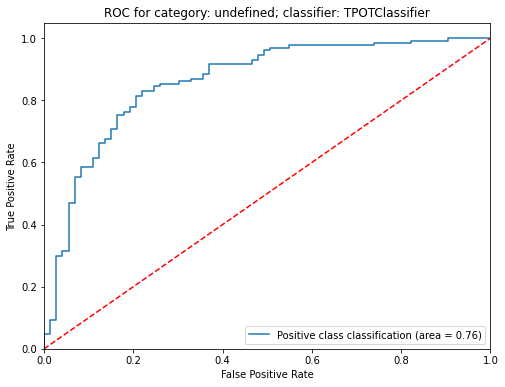

              precision    recall  f1-score   support

           0       0.74      0.66      0.70        73
           1       0.82      0.87      0.84       130

    accuracy                           0.79       203
   macro avg       0.78      0.76      0.77       203
weighted avg       0.79      0.79      0.79       203



In [ ]:
tpot_antiox = teapot_optimizer(antioxidants_X_overlap, 
                               antioxidants_Y, 
                               important_features = antioxidants_important_features,
                               VALIDATION_SPLIT=0.3)


In [ ]:
antioxidants_fitted_pipeline = tpot_antiox.fitted_pipeline_.steps[-1][1]

In [ ]:
pickle.dump(tpot_antiox.fitted_pipeline_, open('/content/drive/My Drive/Colab Notebooks/antiox_fitted_pipeline.p','wb'))

In [ ]:
mean_weighted_f1(antioxidants_fitted_pipeline, antioxidants_X_overlap[antioxidants_important_features], antioxidants_Y, 20, 0.3)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

Mean weighted f1:  0.8074407334920828  STD:  0.02581328420377633
Mean micro f1:  0.8081280788177342  STD:  0.026273989083616292


In [ ]:
mean_precision(antioxidants_fitted_pipeline,
               antioxidants_X_overlap[antioxidants_important_features],
               antioxidants_Y,
               20,
               0.3)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

Mean precision for class 1:  0.854796412875807  STD:  0.028782807948541215


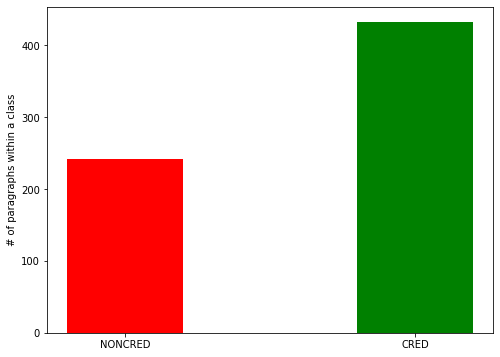

Counter({0: 242, 1: 432})

In [ ]:
antioxidants_label_counter = Counter(antioxidants_Y)
plt.bar(x=['NONCRED', 'CRED'], height=antioxidants_label_counter.values(), width=0.4, color=['r', 'g'])
plt.ylabel('# of paragraphs within a class')
plt.show()
antioxidants_label_counter

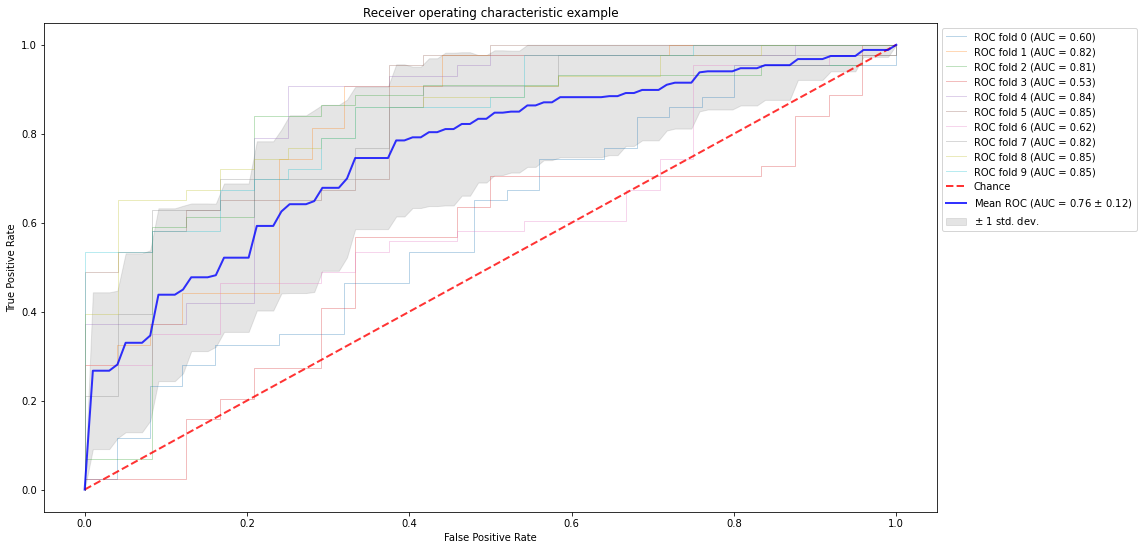

In [ ]:
show_auc_for_cv(antioxidants_fitted_pipeline, antioxidants_X_overlap[antioxidants_important_features], antioxidants_Y, n_splits=10)

Model: MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 20), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
Loading LIME feature importance retrieval model...


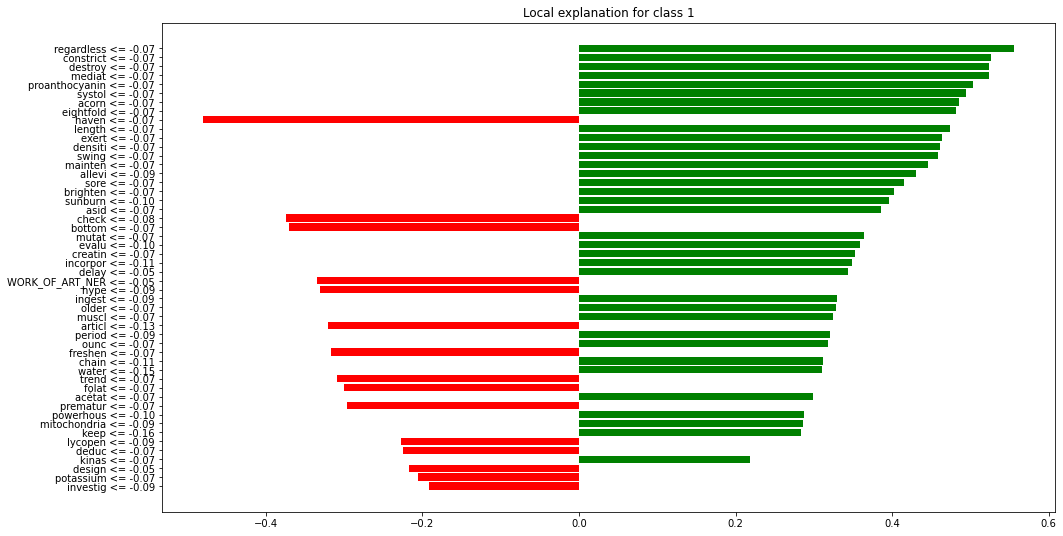

In [ ]:
plt.rcParams["figure.figsize"] = (16, 9) # (w, h)
proba_1, proba_0, antioxidants_clf = predict_proba_hist(antioxidants_fitted_pipeline, 
                                      antioxidants_X_overlap, 
                                      antioxidants_Y, 
                                      antioxidants_important_features)

### Non-overlapping paragraphs

In [ ]:
print(np.shape(antioxidants_X))
print(np.shape(antioxidants_Y_no))

(225, 1672)
(225,)


Running RFE to find the most supportive features
Optimal number of features according to RFE : 232


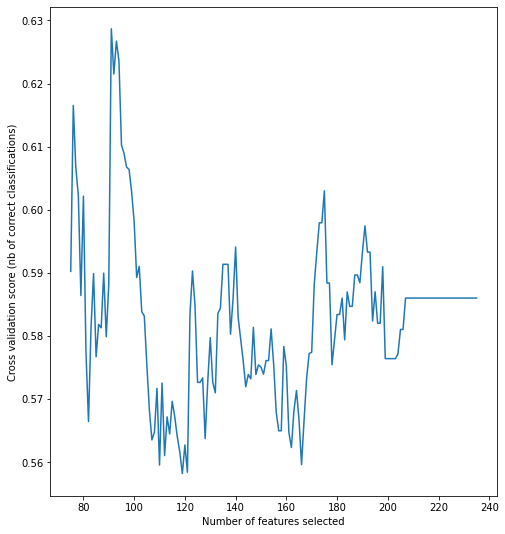

Number of features:  75
['Tone_liwc', 'pronoun_liwc', 'adj_liwc', 'posemo_liwc', 'cogproc_liwc', 'cause_liwc', 'certain_liwc', 'bio_liwc', 'health_liwc', 'ingest_liwc', 'Colon_liwc', 'about', 'accord', 'acorn', 'and', 'antioxid', 'benefit', 'can', 'cellular', 'certain', 'cold', 'critic', 'crucial', 'damage', 'definit', 'destruct', 'detail', 'doesn', 'either', 'exactli', 'exercis', 'fruit', 'glutathion', 'harm', 'have', 'heart', 'ill', 'immun', 'incorpor', 'individu', 'intens', 'interestingli', 'lipid', 'mediat', 'mitochondria', 'most', 'must', 'necessari', 'no', 'older', 'one', 'powerhous', 'prepar', 'process', 'promis', 'prove', 'reaction', 'relat', 'scientist', 'significantli', 'smoke', 'so', 'squash', 'suggest', 'system', 'systol', 'them', 'tissu', 'to', 'transport', 'triglycerid', 'what', 'which', 'will', 'worth']


In [ ]:
plt.rcParams["figure.figsize"] = (8, 9) # (w, h)
_, _, antioxidants_important_features = get_important_features(antioxidants_X, 
                                      antioxidants_Y_no, 
                                      num_important_features=75)


Generation 1 - Current best internal CV score: 0.9128571428571428

Generation 2 - Current best internal CV score: 0.9128571428571428

Generation 3 - Current best internal CV score: 0.9128571428571428

Best pipeline: MLPClassifier(MLPClassifier(input_matrix, activation=logistic, hidden_layer_sizes=(30, 20), learning_rate=adaptive, max_iter=1000), activation=logistic, hidden_layer_sizes=(50, 20), learning_rate=adaptive, max_iter=1000)


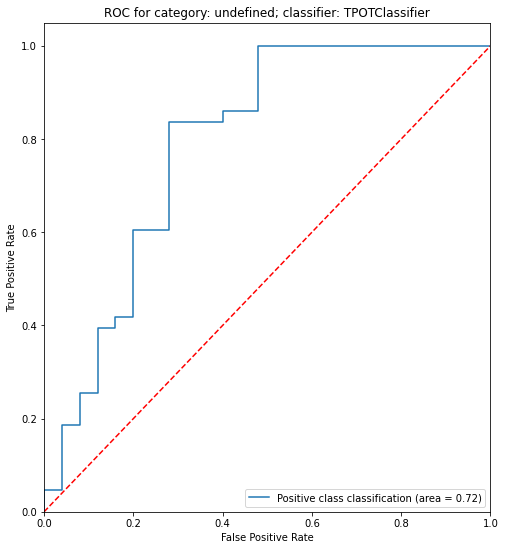

              precision    recall  f1-score   support

           0       0.68      0.60      0.64        25
           1       0.78      0.84      0.81        43

    accuracy                           0.75        68
   macro avg       0.73      0.72      0.72        68
weighted avg       0.75      0.75      0.75        68



In [ ]:
tpot_antiox = teapot_optimizer(antioxidants_X, 
                               antioxidants_Y_no, 
                               important_features = antioxidants_important_features,
                               VALIDATION_SPLIT=0.3)

In [ ]:
antioxidants_fitted_pipeline = tpot_antiox.fitted_pipeline_.steps[-1][1]

In [ ]:
mean_weighted_f1(antioxidants_fitted_pipeline, antioxidants_X[antioxidants_important_features], antioxidants_Y_no, 10, 0.3)

Mean weighted f1:  0.7188261210548375  STD:  0.04430463349117217
Mean micro f1:  0.723529411764706  STD:  0.04302570246567


In [ ]:
mean_precision(antioxidants_fitted_pipeline, antioxidants_X[antioxidants_important_features], antioxidants_Y_no, 10, 0.3)

Mean precision for class 1:  0.7681816447346542  STD:  0.040665866496936466


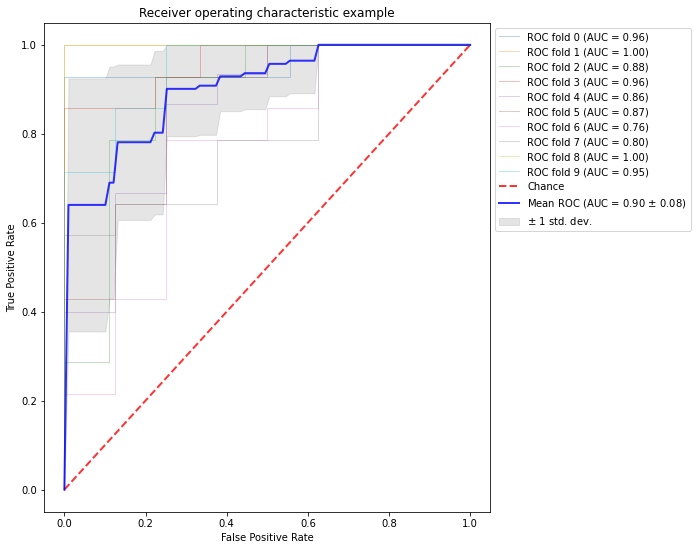

In [ ]:
show_auc_for_cv(antioxidants_fitted_pipeline, antioxidants_X[antioxidants_important_features], antioxidants_Y_no, n_splits=10)

Model: MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 20), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
Loading LIME feature importance retrieval model...


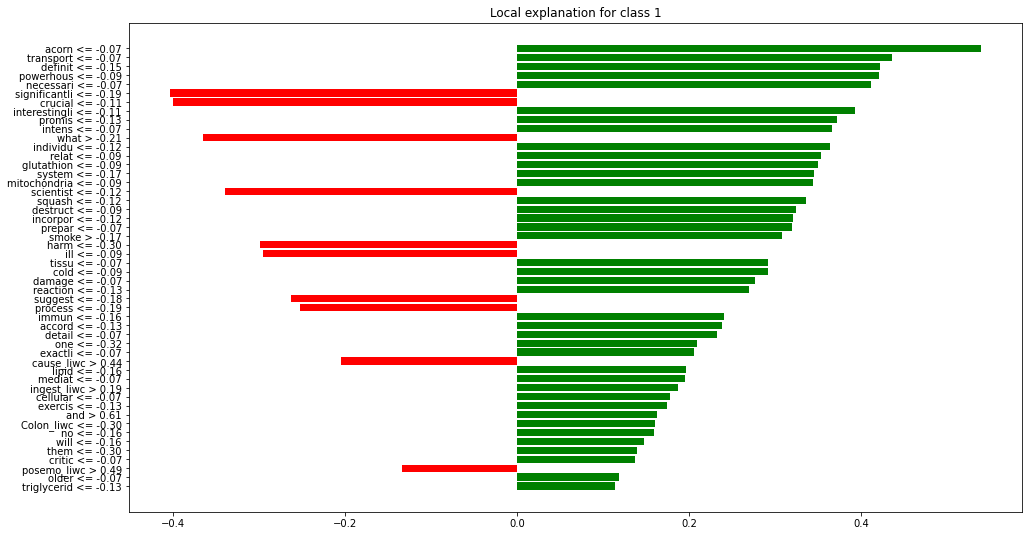

In [ ]:
plt.rcParams["figure.figsize"] = (16, 9) # (w, h)
proba_1, proba_0, antioxidants_clf = predict_proba_hist(antioxidants_fitted_pipeline, 
                                      antioxidants_X, 
                                      antioxidants_Y_no, 
                                      antioxidants_important_features)

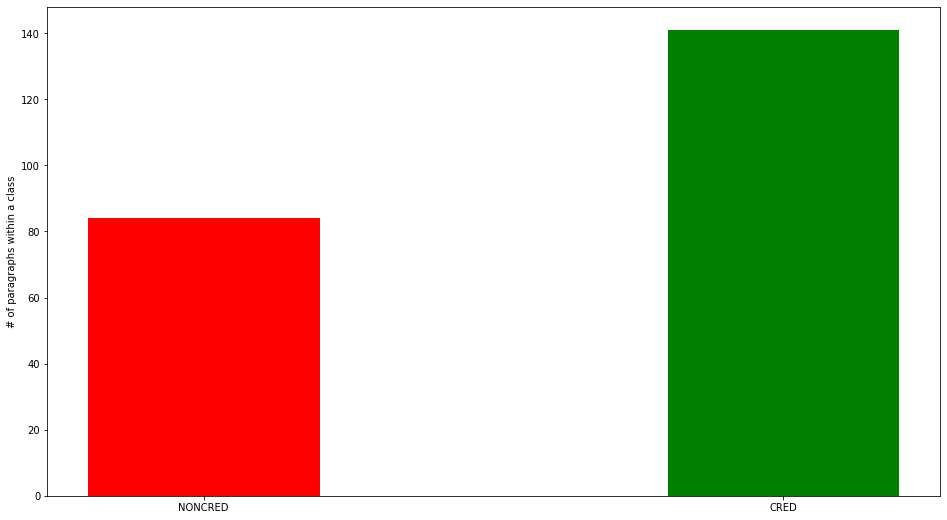

Counter({0: 84, 1: 141})

In [ ]:
antioxidants_label_counter = Counter(antioxidants_Y)
plt.bar(x=['NONCRED', 'CRED'], height=antioxidants_label_counter.values(), width=0.4, color=['r', 'g'])
plt.ylabel('# of paragraphs within a class')
plt.show()
antioxidants_label_counter

## psychiatry

### Overlapping paragraphs

In [ ]:
print(np.shape(psychiatry_X_overlap))
print(np.shape(psychiatry_Y))

(2421, 4216)
(2421,)


Running RFE to find the most supportive features
Optimal number of features according to RFE : 736


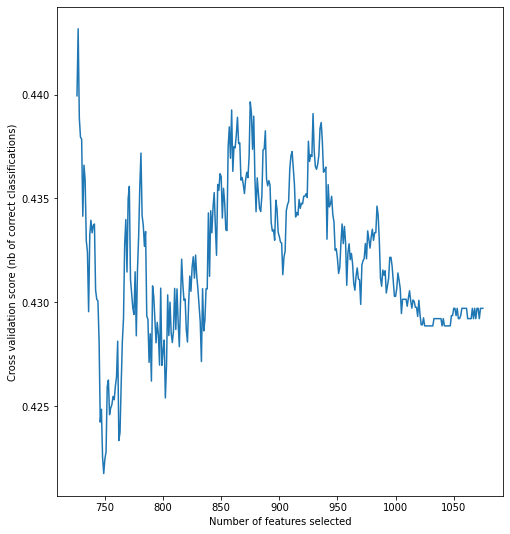

Number of features:  726
['WPS_liwc', 'Sixltr_liwc', 'pronoun_liwc', 'they_liwc', 'ipron_liwc', 'negate_liwc', 'interrog_liwc', 'affect_liwc', 'posemo_liwc', 'anx_liwc', 'social_liwc', 'discrep_liwc', 'certain_liwc', 'see_liwc', 'bio_liwc', 'health_liwc', 'ingest_liwc', 'affiliation_liwc', 'focuspresent_liwc', 'time_liwc', 'work_liwc', 'death_liwc', 'nonflu_liwc', 'AllPunc_liwc', 'Dash_liwc', 'Parenth_liwc', 'NORP_NER', 'abruptli', 'academ', 'access', 'accord', 'ach', 'achi', 'achiev', 'acknowledges', 'acquaint', 'act', 'activ', 'actress', 'adam', 'address', 'adhd', 'adher', 'advantag', 'aforement', 'after', 'afterward', 'against', 'agenc', 'akin', 'al', 'alert', 'algerian', 'allevi', 'allow', 'almost', 'also', 'alter', 'am', 'american', 'annoy', 'anoth', 'anxieti', 'anymor', 'anyth', 'anyway', 'anywher', 'apa', 'appreci', 'approach', 'approv', 'ardent', 'around', 'arous', 'asham', 'ashton', 'asid', 'asleep', 'assault', 'assert', 'assist', 'attach', 'attack', 'attempt', 'attribut', 'au

In [ ]:
plt.rcParams["figure.figsize"] = (8, 6) # (w, h)
_, _, psychiatry_important_features = get_important_features(psychiatry_X_overlap, 
                                      psychiatry_Y, 
                                      num_important_features=726)

In [ ]:
psychiatry_important_features = ['WPS_liwc', 'Sixltr_liwc', 'pronoun_liwc', 'they_liwc', 'ipron_liwc', 'negate_liwc', 'interrog_liwc', 'affect_liwc', 'posemo_liwc', 'anx_liwc', 'social_liwc', 'discrep_liwc', 'certain_liwc', 'see_liwc', 'bio_liwc', 'health_liwc', 'ingest_liwc', 'affiliation_liwc', 'focuspresent_liwc', 'time_liwc', 'work_liwc', 'death_liwc', 'nonflu_liwc', 'AllPunc_liwc', 'Dash_liwc', 'Parenth_liwc', 'NORP_NER', 'abruptli', 'academ', 'access', 'accord', 'ach', 'achi', 'achiev', 'acknowledges', 'acquaint', 'act', 'activ', 'actress', 'adam', 'address', 'adhd', 'adher', 'advantag', 'aforement', 'after', 'afterward', 'against', 'agenc', 'akin', 'al', 'alert', 'algerian', 'allevi', 'allow', 'almost', 'also', 'alter', 'am', 'american', 'annoy', 'anoth', 'anxieti', 'anymor', 'anyth', 'anyway', 'anywher', 'apa', 'appreci', 'approach', 'approv', 'ardent', 'around', 'arous', 'asham', 'ashton', 'asid', 'asleep', 'assault', 'assert', 'assist', 'attach', 'attack', 'attempt', 'attribut', 'audienc', 'auditori', 'augment', 'australian', 'avail', 'averag', 'award', 'balanc', 'bat', 'bay', 'becam', 'befor', 'beleagu', 'below', 'better', 'beverag', 'bias', 'bigot', 'blah', 'blind', 'blown', 'bodi', 'boom', 'branch', 'brand', 'brew', 'britain', 'british', 'broken', 'came', 'campaign', 'cardiologist', 'carta', 'case', 'categori', 'caveat', 'cchr', 'ceas', 'cent', 'center', 'certainli', 'chalk', 'chamber', 'characterist', 'chem', 'chemic', 'chicoutimi', 'choc', 'chronic', 'circuit', 'circular', 'claim', 'classic', 'clear', 'clearli', 'closer', 'clot', 'cluster', 'colleg', 'colonoscopi', 'combin', 'come', 'comité', 'commerci', 'commit', 'committe', 'commonli', 'commun', 'comorbid', 'comparison', 'compel', 'complet', 'complic', 'compuls', 'comput', 'concept', 'concern', 'conclud', 'condit', 'confirm', 'conjunct', 'connect', 'connecticut', 'constant', 'constitut', 'contempl', 'context', 'contrari', 'conveni', 'convinc', 'cora', 'correct', 'correl', 'could', 'countri', 'court', 'cover', 'credibl', 'cri', 'crisi', 'critic', 'crude', 'cyr', 'céline', 'damag', 'de', 'death', 'debat', 'debilit', 'decid', 'decis', 'dedic', 'deepli', 'defibril', 'defin', 'definit', 'delay', 'delet', 'delv', 'demand', 'depress', 'desper', 'determin', 'didn', 'diminish', 'discuss', 'dishonest', 'disorders', 'dispar', 'distress', 'disturb', 'divert', 'divid', 'dizzi', 'docil', 'doctor', 'doe', 'dolan', 'dollar', 'dopamin', 'dr', 'drive', 'drowsi', 'dure', 'each', 'earnest', 'earth', 'eas', 'easili', 'eastgat', 'edema', 'educ', 'effects', 'effici', 'eight', 'electr', 'embarrass', 'emphasi', 'empow', 'england', 'enough', 'ensur', 'environ', 'environment', 'epidem', 'equip', 'erectil', 'evad', 'ever', 'everi', 'evid', 'exactli', 'exampl', 'excess', 'excit', 'exclus', 'exercis', 'exorbit', 'experi', 'explan', 'extrem', 'faint', 'falsehood', 'familiar', 'fascin', 'fault', 'fearless', 'felt', 'fiddl', 'find', 'fire', 'firmli', 'flashback', 'flaw', 'flu', 'forget', 'former', 'fotografogetti', 'francesco', 'french', 'fulli', 'function', 'fundament', 'furthermor', 'futur', 'gain', 'generalis', 'get', 'give', 'glanc', 'gleeful', 'gp', 'greatli', 'group', 'grow', 'guy', 'hair', 'happen', 'harlow', 'haunt', 'have', 'haven', 'health', 'heard', 'heart', 'heat', 'heather', 'heavili', 'henc', 'here', 'high', 'higher', 'histori', 'hole', 'home', 'howev', 'hypothesi', 'iatrogen', 'ideat', 'identifi', 'if', 'ignor', 'imbal', 'immedi', 'impact', 'import', 'impos', 'in', 'includ', 'incorrectli', 'increas', 'incur', 'independ', 'indirect', 'individu', 'industri', 'infer', 'inflam', 'inform', 'ingrain', 'ingredi', 'innov', 'insomnia', 'instrument', 'interact', 'interf', 'internet', 'introduct', 'involv', 'is', 'issu', 'jame', 'jan', 'just', 'kess', 'ketamin', 'known', 'kramer', 'label', 'lament', 'larg', 'late', 'lately', 'later', 'leia', 'less', 'lethargi', 'lie', 'likelihood', 'lilli', 'limit', 'lin', 'linda', 'linger', 'link', 'liv', 'liver', 'lobotomi', 'long', 'look', 'loss', 'lot', 'lustral', 'manag', 'manual', 'manufactur', 'map', 'materi', 'matur', 'mayb', 'mdd', 'meaning', 'meantim', 'measur', 'med', 'media', 'medico', 'mediterranean', 'meet', 'memori', 'mention', 'mess', 'messag', 'method', 'mild', 'milligram', 'minimis', 'misplac', 'mistak', 'mistaken', 'modal', 'modern', 'modifi', 'mood', 'moon', 'moral', 'motiv', 'move', 'much', 'multi', 'myriad', 'name', 'narr', 'nassa', 'nazi', 'neg', 'neuroconnect', 'never', 'new', 'news', 'nobodi', 'non', 'none', 'nonsens', 'norepinephrin', 'normal', 'nose', 'noth', 'npe', 'numb', 'nutritionist', 'obedi', 'object', 'observ', 'obtain', 'obviou', 'occur', 'odd', 'offer', 'often', 'okaaay', 'on', 'onlin', 'opposit', 'organa', 'outlet', 'overlook', 'overwhelm', 'own', 'painless', 'paper', 'paralyt', 'paranoia', 'pare', 'paroxetin', 'particular', 'partnership', 'pathway', 'paus', 'peak', 'percent', 'period', 'persist', 'perspect', 'pie', 'placebo', 'platelet', 'plea', 'popular', 'posit', 'possibl', 'potenti', 'power', 'predecessor', 'prescrib', 'prescript', 'present', 'presid', 'pressur', 'pretti', 'prevail', 'primari', 'prior', 'procedur', 'profil', 'proof', 'propagand', 'proport', 'protect', 'proud', 'prove', 'proven', 'provid', 'psychiatr', 'psychoanalysi', 'psychologist', 'psychosoci', 'psychotherapi', 'puls', 'quarter', 'quickli', 'race', 'random', 'randomis', 'rapid', 'rather', 'ration', 'reaction', 'read', 'realis', 'reason', 'rebel', 'reconnect', 'recov', 'red', 'reduc', 'reduct', 'refer', 'reject', 'relaps', 'relev', 'reliev', 'remiss', 'reproduc', 'resourc', 'restless', 'revis', 'reviv', 'reward', 'ridley', 'right', 'rimouski', 'risk', 'riski', 'rival', 'road', 'role', 'rough', 'round', 'routin', 'rubbish', 'rule', 'runni', 'russia', 'scari', 'scientist', 'scrutini', 'secret', 'sedat', 'seizur', 'seizure', 'sell', 'serious', 'sertralin', 'sh', 'shaki', 'sham', 'she', 'shi', 'shift', 'shock', 'shoot', 'short', 'shortli', 'shot', 'sign', 'similarli', 'simon', 'situat', 'size', 'skew', 'skin', 'skinnerian', 'slept', 'sober', 'somebodi', 'sparingli', 'speaker', 'spell', 'spend', 'split', 'sprung', 'spur', 'stake', 'start', 'statist', 'stereotyp', 'stimuli', 'stomach', 'straightforward', 'strapped', 'strong', 'stronger', 'strongli', 'stuff', 'stupid', 'sue', 'suffici', 'sugar', 'suggest', 'suicideprevention', 'supplement', 'suppos', 'sure', 'surg', 'surgic', 'survey', 'suspect', 'sustained', 'sweat', 'switch', 'syndrom', 'system', 'tablet', 'take', 'taken', 'target', 'taxpayer', 'tbi', 'team', 'tell', 'tempor', 'temporari', 'tend', 'term', 'them', 'then', 'therapy', 'they', 'thi', 'thing', 'thoma', 'though', 'thought', 'threat', 'three', 'through', 'thrown', 'tie', 'time', 'timelin', 'tingkær', 'to', 'togeth', 'told', 'toler', 'tolerance', 'tom', 'train', 'treat', 'treatment', 'trial', 'tricycl', 'truli', 'tumor', 'turningto', 'type', 'ucl', 'unabl', 'unc', 'uncommon', 'uncov', 'under', 'underplay', 'undetect', 'unexpect', 'univers', 'unload', 'unprocess', 'unproduct', 'unrel', 'unwind', 'up', 'upper', 'us', 'usag', 'user', 'usual', 'utter', 'vacuous', 'valu', 'valuabl', 'vasodilat', 'visit', 'voic', 'vomit', 'wait', 'war', 'watch', 'weight', 'were', 'western', 'what', 'which', 'who', 'whole', 'wide', 'wider', 'wine', 'wit', 'withdraw', 'without', 'won', 'word', 'worsen', 'would', 'wrong', 'xanax', 'yep', 'zealand', 'zombi']


Generation 1 - Current best internal CV score: 0.7032705496709072

Generation 2 - Current best internal CV score: 0.7032705496709072

Generation 3 - Current best internal CV score: 0.7094326675218467

Best pipeline: GradientBoostingClassifier(MLPClassifier(CombineDFs(input_matrix, input_matrix), activation=logistic, hidden_layer_sizes=(30, 20), learning_rate=adaptive, max_iter=1000))


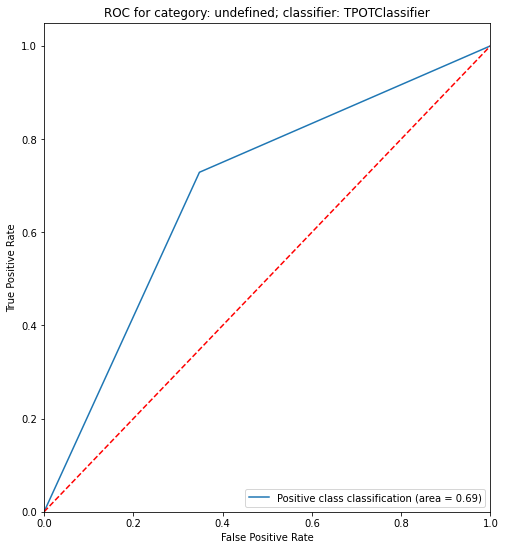

              precision    recall  f1-score   support

           0       0.68      0.65      0.67       227
           1       0.70      0.73      0.72       258

    accuracy                           0.69       485
   macro avg       0.69      0.69      0.69       485
weighted avg       0.69      0.69      0.69       485



In [ ]:
tpot_psych = teapot_optimizer(psychiatry_X_overlap, 
                               psychiatry_Y, 
                               important_features = psychiatry_important_features,
                               VALIDATION_SPLIT=0.2)
# pickle.dump(tpot_psych.fitted_pipeline_, open('/content/drive/My Drive/Colab Notebooks/psych_fitted_pipeline.p','wb'))

In [ ]:
# psychiatry_important_features = ['Sixltr', 'Dic', 'friend', 'certain', 'percept', 'see', 'bio', 'health', 'focuspresent', 'Parenth', 'PERCENT', 'TIME', 'accomplish', 'achiev', 'address', 'administr', 'advanc', 'advis', 'agent', 'agre', 'al', 'allevi', 'am', 'anim', 'anxieti', 'anxiou', 'appear', 'appreci', 'appropri', 'approv', 'aren', 'ask', 'assist', 'assum', 'attempt', 'averag', 'babi', 'balanc', 'barbar', 'barber', 'began', 'behav', 'big', 'blurri', 'bodi', 'both', 'breakup', 'breath', 'brochur', 'bullshit', 'canadian', 'cancer', 'center', 'certain', 'character', 'clear', 'clearli', 'commiss', 'commonli', 'compassion', 'compli', 'composit', 'compuls', 'confer', 'conflict', 'continu', 'convinc', 'cora', 'correct', 'cyr', 'damag', 'damage', 'date', 'dealt', 'debat', 'decent', 'deeper', 'delay', 'deliber', 'depart', 'descript', 'desper', 'diagnosi', 'did', 'didn', 'differ', 'difficulti', 'disappear', 'discontinu', 'disorders', 'dispel', 'dizzi', 'doctor', 'document', 'dog', 'dollar', 'doubl', 'drapetomania', 'drug', 'durat', 'dyskinesia', 'edema', 'els', 'embarrass', 'encount', 'encourag', 'enrich', 'entir', 'enzym', 'epilepsi', 'equal', 'erectil', 'eventu', 'excit', 'execut', 'explain', 'extens', 'extent', 'extrem', 'failur', 'felt', 'find', 'forget', 'free', 'freelanc', 'friend', 'fundament', 'gari', 'gemma', 'give', 'gold', 'gotten', 'gp', 'grate', 'grow', 'guy', 'gynecologist', 'happen', 'harrow', 'heal', 'health', 'heartbeat', 'higher', 'histor', 'hiv', 'hope', 'hypertens', 'idea', 'identifi', 'impair', 'impuls', 'incid', 'includ', 'inde', 'indic', 'individu', 'influenti', 'inhibit', 'instead', 'institut', 'intens', 'interact', 'introduc', 'it', 'joke', 'joul', 'judi', 'just', 'kesey', 'kess', 'ketamin', 'kramer', 'largest', 'later', 'learn', 'lectur', 'led', 'let', 'life', 'likelihood', 'link', 'list', 'liver', 'loss', 'lucki', 'mainstream', 'manner', 'maoi', 'map', 'matter', 'mayb', 'mechan', 'med', 'media', 'memori', 'merit', 'mess', 'mind', 'mistak', 'moment', 'monthli', 'mood', 'motiv', 'movement', 'movi', 'must', 'myth', 'nardil', 'nazi', 'neurotransmiss', 'news', 'nicotin', 'nobodi', 'non', 'noradrenalin', 'nordic', 'normal', 'notabl', 'numer', 'object', 'obviou', 'occupi', 'odd', 'offic', 'oh', 'organis', 'outweigh', 'pad', 'parti', 'partnership', 'pay', 'per', 'perhap', 'pharma', 'pharmaci', 'philosophi', 'phrase', 'pie', 'piec', 'possibl', 'potent', 'precis', 'prescript', 'prevail', 'preval', 'profil', 'proport', 'propos', 'protect', 'provok', 'prozac', 'psychopharmacolog', 'psychotherapist', 'publicli', 'realiti', 'reappear', 'reason', 'receptor', 'recov', 'refer', 'reliev', 'research', 'respect', 'restless', 'review', 'richard', 'rimouski', 'road', 'roughli', 'routin', 'scienc', 'secret', 'sedat', 'seem', 'seen', 'semant', 'serotoninerg', 'sertralin', 'servic', 'shock', 'shoot', 'shortli', 'should', 'sign', 'similar', 'slightli', 'snort', 'speak', 'spectrum', 'spent', 'stabil', 'stand', 'start', 'stomach', 'stop', 'street', 'stress', 'strongli', 'substances', 'suffer', 'suitabl', 'surfac', 'sweat', 'symptom', 'szasz', 'tablet', 'tackl', 'taken', 'tardiv', 'target', 'taylor', 'teen', 'temporari', 'term', 'the', 'themselv', 'there', 'they', 'third', 'though', 'thousand', 'threshold', 'thrown', 'tie', 'to', 'told', 'tolerance', 'too', 'toward', 'trauma', 'trial', 'tricycl', 'tv', 'unc', 'uniqu', 'unlik', 'unpromis', 'unproven', 'unusu', 'up', 'usag', 'valu', 'variou', 'version', 'versu', 'violat', 'visit', 'voic', 'voltag', 'voluntari', 'wean', 'weigh', 'wellb', 'wendi', 'western', 'what', 'who', 'whoever', 'whole', 'whose', 'wide', 'word', 'writer', 'written', 'xanax', 'zealand']
# psychiatry_pipeline = pickle.load(open('/content/drive/My Drive/Colab Notebooks/psych_fitted_pipeline.p','rb'))
# mean_weighted_f1(psychiatry_pipeline, psychiatry_X[psychiatry_important_features], psychiatry_Y, 30, 0.2)

In [ ]:
# psychiatry_fitted_pipeline = tpot_psych.fitted_pipeline_.steps[-1][1]
psychiatry_fitted_pipeline = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 20), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
psychiatry_label_counter = Counter(psychiatry_Y)
plt.bar(x=['NONCRED', 'CRED'], height=psychiatry_label_counter.values(), width=0.4, color=['r', 'g'])
plt.ylabel('# of paragraphs within a class')
plt.show()
psychiatry_label_counter

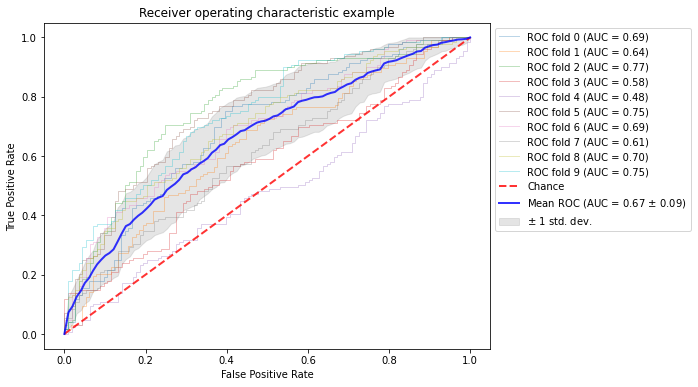

In [ ]:
show_auc_for_cv(LogisticRegression(max_iter=1000), psychiatry_X_overlap[psychiatry_important_features], psychiatry_Y)

In [ ]:
mean_weighted_f1(LogisticRegression(max_iter=1000), psychiatry_X_overlap[psychiatry_important_features], psychiatry_Y, 20, 0.2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Mean weighted f1:  0.6919403517136995  STD:  0.019757648852009493
Mean micro f1:  0.692783505154639  STD:  0.019894503353532295


In [ ]:
mean_precision(LogisticRegression(max_iter=1000), psychiatry_X_overlap[psychiatry_important_features], psychiatry_Y, 20, 0.2)

Mean precision for class 1:  0.7121756396382841  STD:  0.01230366293121092


Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


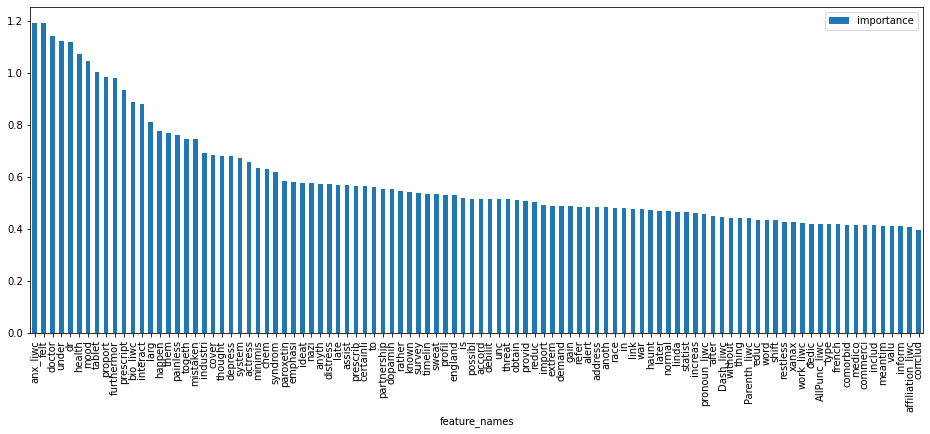

In [ ]:
plt.rcParams["figure.figsize"] = (16, 6) # (w, h)
proba_1, proba_0, clf = predict_proba_hist(LogisticRegression(max_iter=1000), 
                                      psychiatry_X_overlap, 
                                      psychiatry_Y, 
                                      psychiatry_important_features)

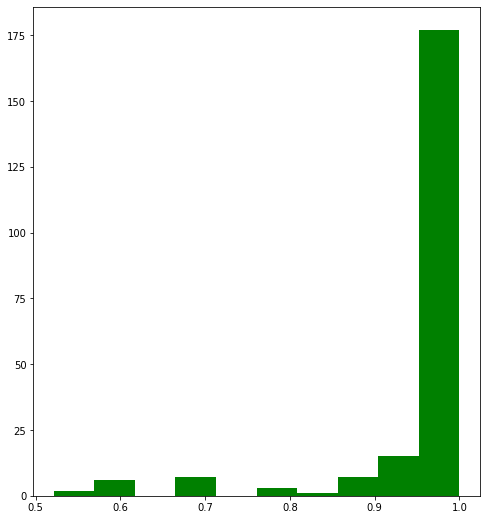

In [ ]:
plt.hist(proba_1.values(), bins=10, color='g')
plt.show()

### Non-overlapping paragraphs

In [ ]:
print(np.shape(psychiatry_X))
print(np.shape(psychiatry_Y_no))

(807, 4126)
(807,)


Running RFE to find the most supportive features
Optimal number of features according to RFE : 866


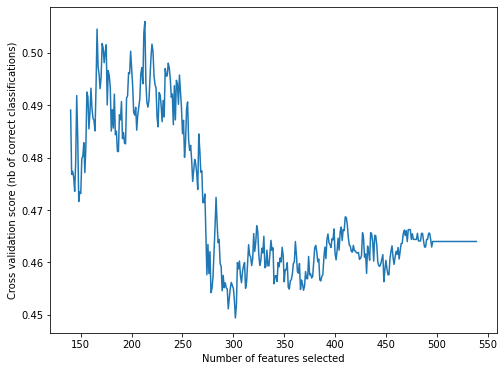

Number of features:  140
['we_liwc', 'ipron_liwc', 'anx_liwc', 'certain_liwc', 'percept_liwc', 'bio_liwc', 'focuspresent_liwc', 'acetylcholin', 'advis', 'anxieti', 'anyth', 'appreci', 'appropri', 'aren', 'ask', 'assault', 'assist', 'balanc', 'bodi', 'brand', 'breath', 'clear', 'clearli', 'commonli', 'complic', 'constip', 'contempl', 'continu', 'convinc', 'cora', 'correl', 'damag', 'decent', 'delay', 'desir', 'didn', 'diminish', 'discontinu', 'dispar', 'doctor', 'edema', 'effici', 'electr', 'electroconvuls', 'enrich', 'experi', 'extens', 'extrem', 'fan', 'fast', 'free', 'generalis', 'give', 'health', 'heartbeat', 'higher', 'hiv', 'hypertens', 'identifi', 'ill', 'includ', 'individu', 'instead', 'interact', 'later', 'let', 'lift', 'link', 'list', 'loss', 'lustral', 'maoi', 'mdd', 'med', 'merit', 'minimis', 'mistak', 'monthli', 'mood', 'myth', 'name', 'nassa', 'never', 'nobodi', 'noradrenalin', 'normal', 'numer', 'object', 'odd', 'perhap', 'perman', 'possibl', 'power', 'precis', 'problem',

In [ ]:
plt.rcParams["figure.figsize"] = (8, 6) # (w, h)
_, _, psychiatry_important_features = get_important_features(psychiatry_X, 
                                      psychiatry_Y_no, 
                                      num_important_features=140)


Generation 1 - Current best internal CV score: 0.6187079097373215

Generation 2 - Current best internal CV score: 0.6187079097373215

Generation 3 - Current best internal CV score: 0.6187079097373215

Best pipeline: MLPClassifier(input_matrix, activation=relu, hidden_layer_sizes=(50, 20), learning_rate=adaptive, max_iter=1000)


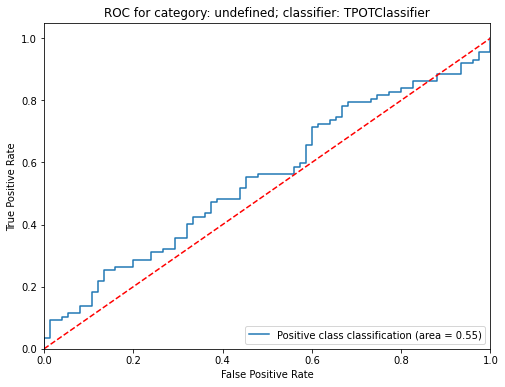

              precision    recall  f1-score   support

           0       0.51      0.55      0.53        75
           1       0.59      0.55      0.57        87

    accuracy                           0.55       162
   macro avg       0.55      0.55      0.55       162
weighted avg       0.55      0.55      0.55       162



In [ ]:
tpot_psych = teapot_optimizer(psychiatry_X, 
                               psychiatry_Y_no, 
                               important_features = psychiatry_important_features,
                               VALIDATION_SPLIT=0.2)

In [ ]:
psychiatry_fitted_pipeline = tpot_psych.fitted_pipeline_.steps[-1][1]

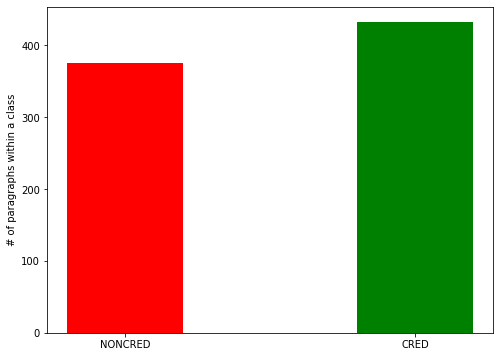

Counter({0: 375, 1: 432})

In [ ]:
psychiatry_label_counter = Counter(psychiatry_Y_no)
plt.bar(x=['NONCRED', 'CRED'], height=psychiatry_label_counter.values(), width=0.4, color=['r', 'g'])
plt.ylabel('# of paragraphs within a class')
plt.show()
psychiatry_label_counter

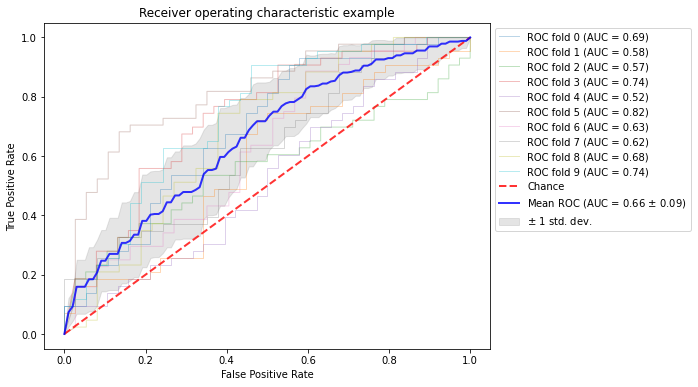

In [ ]:
show_auc_for_cv(psychiatry_fitted_pipeline, psychiatry_X[psychiatry_important_features], psychiatry_Y_no)

In [ ]:
mean_weighted_f1(psychiatry_fitted_pipeline, psychiatry_X[psychiatry_important_features], psychiatry_Y_no, 20, 0.2)

Mean weighted f1:  0.621620961803833  STD:  0.040615468373551296
Mean micro f1:  0.6234567901234568  STD:  0.03947722705017156


In [ ]:
mean_precision(psychiatry_fitted_pipeline, psychiatry_X[psychiatry_important_features], psychiatry_Y_no, 20, 0.2)

Mean precision for class 1:  0.6388220699055156  STD:  0.024946253445537487


Model: MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 20), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
Loading LIME feature importance retrieval model...


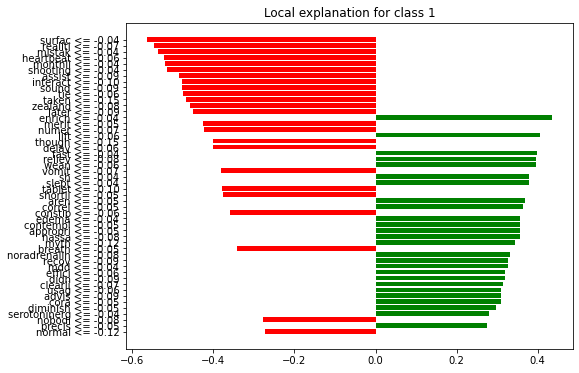

In [ ]:
proba_1, proba_0, clf = predict_proba_hist(psychiatry_fitted_pipeline, 
                                      psychiatry_X, 
                                      psychiatry_Y_no, 
                                      psychiatry_important_features)


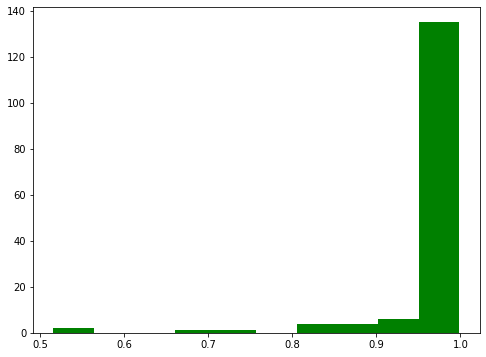

In [ ]:
plt.hist(proba_1.values(), bins=10, color='g')
plt.show()

## diet and Autism

### Overlapping paragraphs

In [ ]:
print(np.shape(diet_and_autism_X_overlap))
print(np.shape(diet_and_autism_Y))

(545, 1882)
(545,)


In [ ]:
545*0.3

163.5

Running RFE to find the most supportive features
Optimal number of features according to RFE : 282


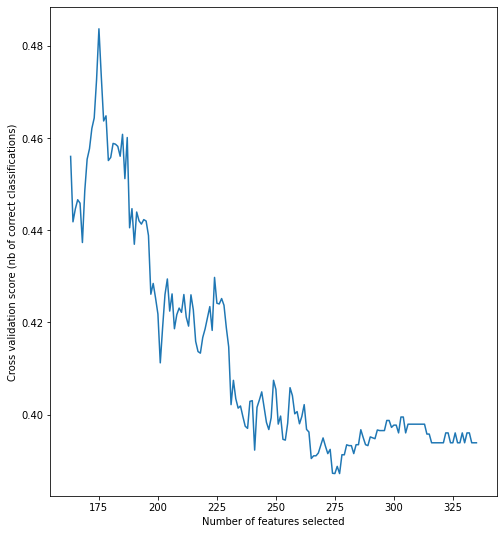

Number of features:  163
['Sixltr_liwc', 'ipron_liwc', 'body_liwc', 'work_liwc', 'assent_liwc', 'QMark_liwc', 'Apostro_liwc', 'absenc', 'absorb', 'accompani', 'accur', 'addit', 'aim', 'allow', 'alter', 'amaranth', 'amount', 'an', 'and', 'andent', 'ani', 'approach', 'appropri', 'are', 'autist', 'base', 'be', 'befor', 'bi', 'big', 'blood', 'born', 'bread', 'buckwheat', 'buy', 'cake', 'cal', 'calf', 'call', 'carri', 'casein', 'cereal', 'chemic', 'chicken', 'child', 'cocoa', 'compon', 'concern', 'consist', 'constant', 'contraind', 'control', 'count', 'cours', 'dairi', 'decad', 'decid', 'deriv', 'dietari', 'differ', 'dimension', 'doctor', 'don', 'dramat', 'each', 'eat', 'effect', 'element', 'enough', 'essenti', 'etc', 'exorphin', 'fat', 'feingold', 'ferment', 'find', 'form', 'function', 'gradual', 'grain', 'growth', 'ha', 'have', 'help', 'hyperact', 'includ', 'influenc', 'inform', 'ingredi', 'intensifi', 'irrit', 'is', 'journey', 'kid', 'life', 'list', 'll', 'lose', 'love', 'make', 'mani', 

In [ ]:
plt.rcParams["figure.figsize"] = (8, 9) # (w, h)
_, _, diet_and_autism_important_features = get_important_features(diet_and_autism_X_overlap, 
                                      diet_and_autism_Y, 
                                      num_important_features=163)


Generation 1 - Current best internal CV score: 0.7554569504569504

Generation 2 - Current best internal CV score: 0.7693314093314093

Generation 3 - Current best internal CV score: 0.7693314093314093

Best pipeline: MLPClassifier(MLPClassifier(input_matrix, activation=logistic, hidden_layer_sizes=(30, 20), learning_rate=adaptive, max_iter=1000), activation=logistic, hidden_layer_sizes=(30, 20), learning_rate=adaptive, max_iter=1000)


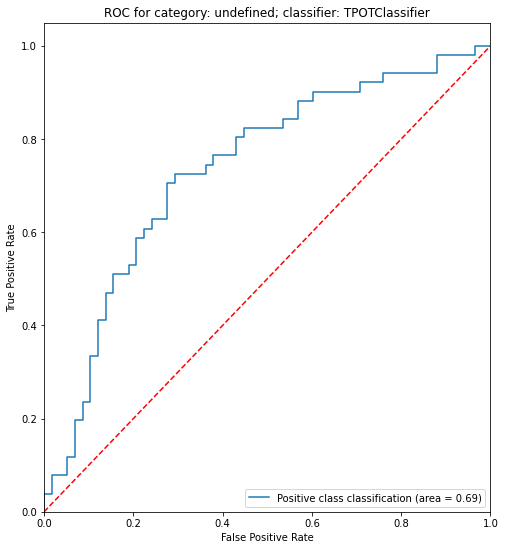

              precision    recall  f1-score   support

           0       0.74      0.64      0.69        58
           1       0.64      0.75      0.69        51

    accuracy                           0.69       109
   macro avg       0.69      0.69      0.69       109
weighted avg       0.70      0.69      0.69       109



In [ ]:
tpot_da = teapot_optimizer(diet_and_autism_X_overlap, 
                               diet_and_autism_Y, 
                               important_features = diet_and_autism_important_features,
                               VALIDATION_SPLIT=0.2)

# pickle.dump(tpot_da.fitted_pipeline_, open('/content/drive/My Drive/Colab Notebooks/da_fitted_pipeline.p','wb'))

In [ ]:
diet_and_autism_fitted_pipeline = tpot_da.fitted_pipeline_.steps[-1][1]

In [ ]:
# da_important_features = ['Sixltr', 'Dic', 'we', 'article', 'verb', 'affect', 'posemo', 'negemo', 'anger', 'friend', 'female', 'male', 'cogproc', 'health', 'work', 'leisure', 'money', 'informal', 'netspeak', 'Period', 'Colon', 'QMark', 'Apostro', 'DATE', 'PERSON', 'QUANTITY', 'abil', 'abl', 'abnorm', 'about', 'absorb', 'absorpt', 'abstract', 'academi', 'accept', 'account', 'achiev', 'activ', 'adapt', 'add', 'addict', 'admit', 'adolesc', 'adulthood', 'advic', 'after', 'age', 'aim', 'albican', 'allergen', 'allevi', 'allow', 'alon', 'alter', 'amount', 'an', 'analysi', 'analyz', 'answer', 'antibiot', 'approach', 'appropri', 'are', 'arrang', 'articl', 'artifici', 'asid', 'author', 'autist', 'autoimmun', 'avoid', 'back', 'bacteri', 'bacteria', 'bad', 'bark', 'barley', 'barrier', 'bas', 'base', 'basic', 'becom', 'befor', 'beforehand', 'began', 'begin', 'behaviour', 'benefit', 'between', 'bi', 'birch', 'black', 'blood', 'bloodstream', 'both', 'bread', 'breast', 'breed', 'bring', 'buckwheat', 'build', 'bulk', 'butter', 'calf', 'can', 'candida', 'carbohydr', 'cardiovascular', 'carri', 'case', 'casein', 'caus', 'center', 'centr', 'cereal', 'certainli', 'cf', 'chemic', 'children', 'chip', 'chocol', 'claim', 'clarifi', 'class', 'cochran', 'cocoa', 'cod', 'coffe', 'collabor', 'combin', 'commonli', 'complaint', 'complementari', 'complic', 'compon', 'concern', 'consist', 'constant', 'consult', 'consumpt', 'contribut', 'controversi', 'correctli', 'correl', 'count', 'cours', 'cracker', 'cream', 'cri', 'current', 'dairi', 'data', 'day', 'deal', 'decad', 'decid', 'decreas', 'defect', 'deficiencies', 'demonstr', 'deriv', 'development', 'diabet', 'did', 'diet', 'dietari', 'dietician', 'digest', 'direct', 'director', 'discuss', 'diseas', 'disord', 'disput', 'disturb', 'doctor', 'don', 'dosag', 'dose', 'down', 'dr', 'dramat', 'drug', 'due', 'dure', 'dye', 'each', 'earli', 'easi', 'eat', 'effort', 'emori', 'empti', 'encourag', 'endorphin', 'energi', 'enough', 'ensur', 'enter', 'environ', 'establish', 'etc', 'everi', 'exampl', 'exhibit', 'exorphin', 'experi', 'expert', 'explain', 'exposur', 'extrem', 'eye', 'famili', 'fat', 'faulti', 'favorit', 'feingold', 'ferguson', 'field', 'find', 'fine', 'fire', 'flake', 'flora', 'flourtapioca', 'flouryucca', 'follow', 'food', 'form', 'fortifi', 'fragment', 'french', 'fresh', 'from', 'fulli', 'function', 'fungi', 'gastrointestin', 'genet', 'get', 'gf', 'given', 'glue', 'gradual', 'groat', 'groceri', 'ground', 'grow', 'growth', 'guidanc', 'ha', 'habit', 'hammerâ', 'happen', 'have', 'health', 'healthier', 'held', 'henc', 'high', 'highest', 'him', 'histori', 'homemad', 'homogen', 'hospit', 'huge', 'human', 'hunger', 'hurt', 'hydrolys', 'hydrolysi', 'idea', 'identifi', 'ill', 'impair', 'implic', 'inadequ', 'increas', 'indirectli', 'inflammatori', 'inform', 'ingredi', 'initi', 'insult', 'intens', 'intensifi', 'intern', 'intervent', 'involv', 'is', 'issu', 'itself', 'journal', 'kefir', 'know', 'label', 'labor', 'languag', 'larg', 'larger', 'lead', 'leav', 'level', 'life', 'limit', 'link', 'list', 'liver', 'look', 'loos', 'love', 'low', 'lower', 'lump', 'made', 'mainli', 'major', 'make', 'manag', 'mani', 'manufactur', 'marc', 'marcu', 'margarin', 'mealtim', 'meat', 'medication', 'medicin', 'megson', 'mental', 'menu', 'mercuri', 'method', 'microbiolog', 'millet', 'mind', 'miner', 'monitor', 'monotoni', 'mostli', 'mother', 'much', 'mucosa', 'mushroom', 'nake', 'nationwid', 'necessari', 'necessarili', 'need', 'neg', 'nervou', 'network', 'new', 'nice', 'night', 'no', 'noodl', 'noth', 'nutritionist', 'obes', 'occur', 'of', 'oil', 'opioid', 'optimum', 'option', 'order', 'organ', 'otherwis', 'our', 'oven', 'overal', 'overweight', 'pain', 'parellada', 'parent', 'particular', 'pattern', 'pay', 'pearl', 'pediatr', 'peptid', 'permeabl', 'person', 'perspect', 'phenomenon', 'physiolog', 'pie', 'plant', 'point', 'poland', 'posit', 'post', 'potato', 'potenti', 'practic', 'prepar', 'present', 'preserv', 'pro', 'probiot', 'problem', 'process', 'produc', 'programm', 'properli', 'protein', 'pud', 'puf', 'pyroluria', 'question', 'quit', 'rais', 'rank', 'rapid', 'realli', 'receptor', 'recip', 'recommend', 'recreat', 'reflux', 'regard', 'relat', 'remov', 'replenish', 'reportedli', 'requir', 'research', 'restless', 'restrict', 'return', 'ridicul', 'rimland', 'risk', 'ritualist', 'safe', 'said', 'sausag', 'scariest', 'school', 'seem', 'seemingli', 'select', 'semolina', 'sens', 'servic', 'sever', 'show', 'shown', 'side', 'sign', 'signific', 'silenc', 'singl', 'skin', 'sleep', 'slight', 'small', 'so', 'social', 'sometim', 'son', 'soon', 'soup', 'soybean', 'special', 'specialis', 'specif', 'speech', 'stamp', 'statu', 'stomach', 'subset', 'such', 'suggest', 'suitabl', 'summari', 'supermarket', 'supervis', 'supplement', 'surviv', 'switch', 'syndrom', 'systemat', 'tackl', 'take', 'tantrum', 'tapioca', 'tasti', 'than', 'that', 'the', 'them', 'theori', 'therapi', 'these', 'thimeros', 'thimerosal', 'think', 'through', 'throw', 'time', 'tip', 'toddler', 'toler', 'toxic', 'toxin', 'trait', 'trial', 'turn', 'type', 'unaffect', 'under', 'understand', 'underweight', 'undesir', 'unfortun', 'unhealthi', 'unit', 'unpleas', 'unsuit', 'upon', 'us', 'usual', 'variou', 'veget', 'via', 'visual', 'vitamin', 'warn', 'water', 'way', 'weak', 'were', 'wheat', 'where', 'whether', 'wheyhalf', 'whi', 'while', 'white', 'wholem', 'worsen', 'write', 'xylitol', 'yeast', 'yoghurt', 'young', 'your', 'zinc', 'â¾']
# da_pipeline = pickle.load(open('/content/drive/My Drive/Colab Notebooks/da_fitted_pipeline.p','rb'))
# mean_weighted_f1(da_pipeline, diet_and_autism_X[da_important_features], diet_and_autism_Y, 30, 0.3)

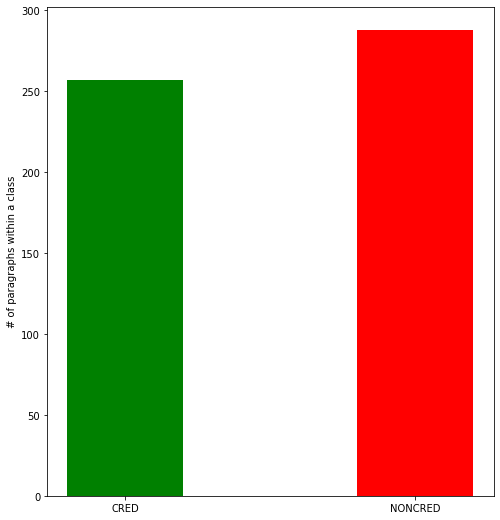

Counter({0: 288, 1: 257})

In [ ]:
da_label_counter = Counter(diet_and_autism_Y)
plt.bar(x=['CRED', 'NONCRED'], height=da_label_counter.values(), width=0.4, color=['g', 'r'])
plt.ylabel('# of paragraphs within a class')
plt.show()
da_label_counter

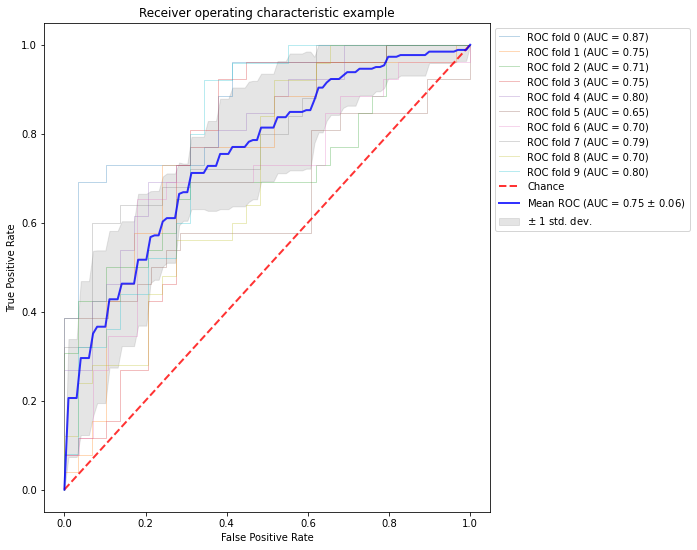

In [ ]:
show_auc_for_cv(diet_and_autism_fitted_pipeline, diet_and_autism_X_overlap[diet_and_autism_important_features], diet_and_autism_Y, n_splits=10)

In [ ]:
mean_weighted_f1(diet_and_autism_fitted_pipeline, 
                 diet_and_autism_X_overlap[diet_and_autism_important_features], 
                 diet_and_autism_Y, 
                 20, 
                 0.2)
mean_precision(diet_and_autism_fitted_pipeline, 
                 diet_and_autism_X_overlap[diet_and_autism_important_features], 
                 diet_and_autism_Y, 
                 20, 
                 0.2)

Mean weighted f1:  0.8795202608611806  STD:  0.029279091360426585
Mean micro f1:  0.879816513761468  STD:  0.028851715951406193


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Mean precision for class 1:  0.8792318901728031  STD:  0.03671388806547541


Model: MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 20), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
Loading LIME feature importance retrieval model...


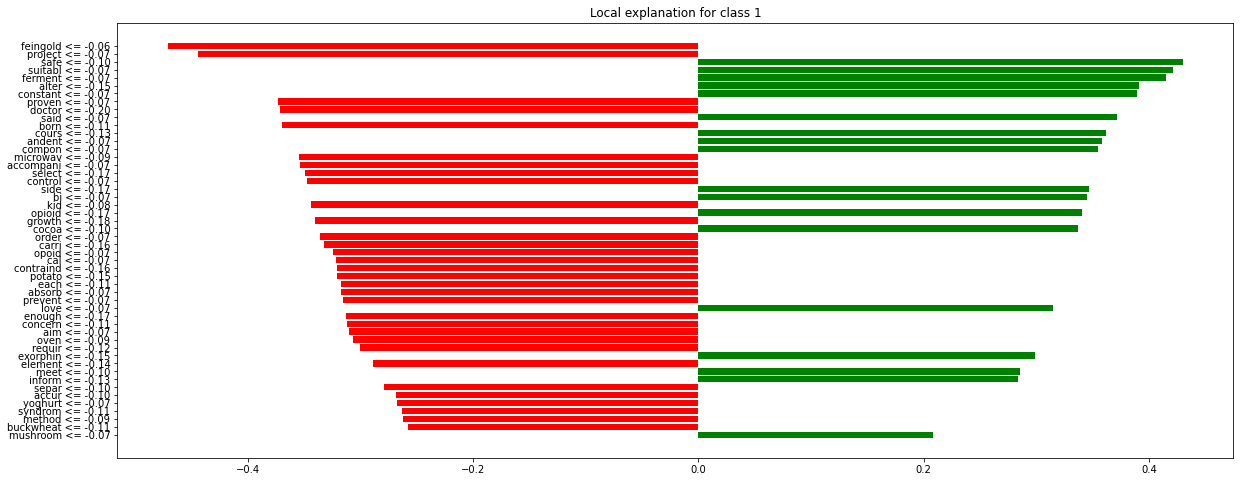

In [ ]:
plt.rcParams["figure.figsize"] = (20, 8) # (w, h)
proba_1, proba_0, clf = predict_proba_hist(diet_and_autism_fitted_pipeline, 
                                      diet_and_autism_X_overlap, 
                                      diet_and_autism_Y, 
                                      diet_and_autism_important_features)

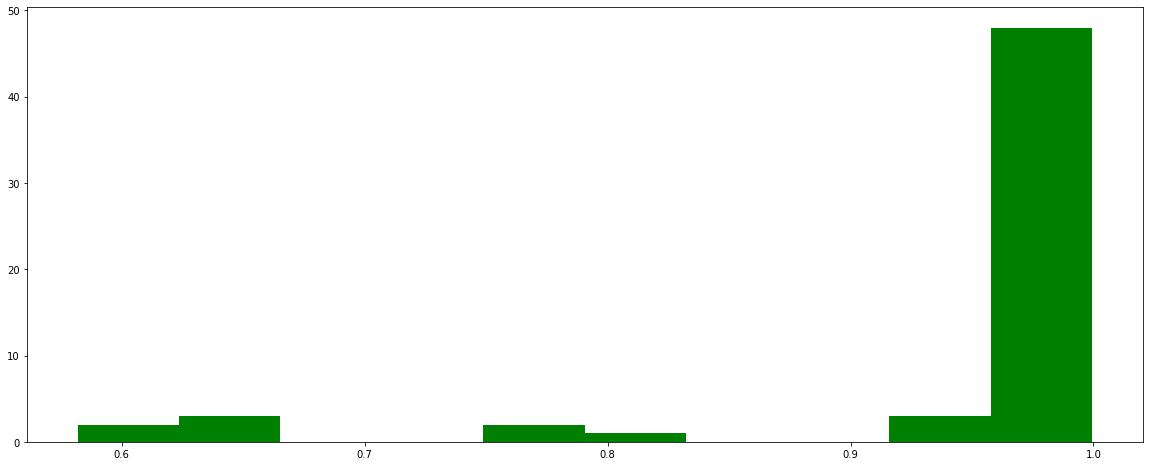

In [ ]:
plt.hist(proba_1.values(), bins=10, color='g')
plt.show()

### Non-overlapping paragraphs

In [ ]:
print(np.shape(diet_and_autism_X))
print(np.shape(diet_and_autism_Y_no))

(182, 1802)
(182,)


In [ ]:
182*0.3

54.6

Running RFE to find the most supportive features
Optimal number of features according to RFE : 552


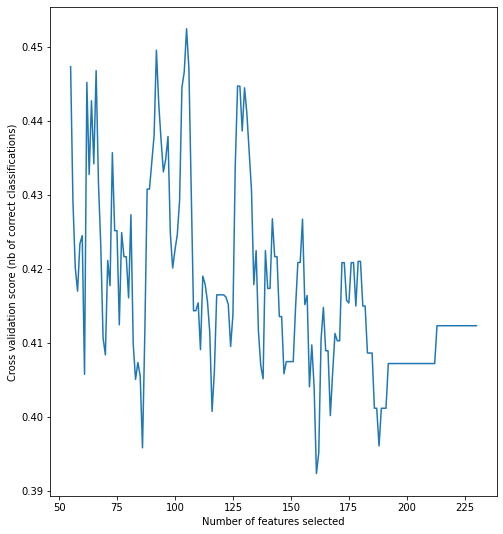

Number of features:  55
['affect_liwc', 'friend_liwc', 'leisure_liwc', 'allevi', 'an', 'analysi', 'approach', 'are', 'autist', 'beforehand', 'begin', 'buckwheat', 'carbohydr', 'casein', 'chemic', 'clarifi', 'diet', 'disord', 'dosag', 'dramat', 'feingold', 'follow', 'fulli', 'groat', 'ha', 'ingredi', 'journal', 'know', 'label', 'life', 'lower', 'made', 'mani', 'monitor', 'new', 'of', 'overal', 'produc', 'realli', 'recommend', 'relat', 'reportedli', 'restrict', 'semolina', 'side', 'small', 'so', 'such', 'suitabl', 'take', 'that', 'these', 'whi', 'wholem', 'write']


In [ ]:
plt.rcParams["figure.figsize"] = (8, 9) # (w, h)
_, _, diet_and_autism_important_features = get_important_features(diet_and_autism_X, 
                                      diet_and_autism_Y_no, 
                                      num_important_features=55)


Generation 1 - Current best internal CV score: 0.7966666666666666

Generation 2 - Current best internal CV score: 0.7966666666666666

Generation 3 - Current best internal CV score: 0.7966666666666666

Best pipeline: MLPClassifier(input_matrix, activation=logistic, hidden_layer_sizes=(30, 20), learning_rate=adaptive, max_iter=1000)


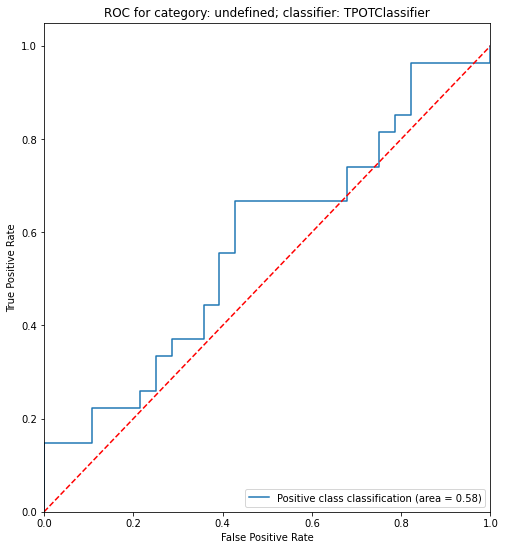

              precision    recall  f1-score   support

           0       0.59      0.57      0.58        28
           1       0.57      0.59      0.58        27

    accuracy                           0.58        55
   macro avg       0.58      0.58      0.58        55
weighted avg       0.58      0.58      0.58        55



In [ ]:
tpot_da = teapot_optimizer(diet_and_autism_X, 
                               diet_and_autism_Y_no, 
                               important_features = diet_and_autism_important_features,
                               VALIDATION_SPLIT=0.3)

# pickle.dump(tpot_da.fitted_pipeline_, open('/content/drive/My Drive/Colab Notebooks/da_fitted_pipeline.p','wb'))

In [ ]:
diet_and_autism_fitted_pipeline = tpot_da.fitted_pipeline_.steps[-1][1]

In [ ]:
mean_weighted_f1(LogisticRegression(max_iter=1000), diet_and_autism_X[diet_and_autism_important_features], diet_and_autism_Y_no, 20, 0.2)
mean_precision(LogisticRegression(max_iter=1000), diet_and_autism_X[diet_and_autism_important_features], diet_and_autism_Y_no, 20, 0.2)

Mean weighted f1:  0.6101159250678815  STD:  0.06740550117116915
Mean micro f1:  0.6148648648648649  STD:  0.06501952283091572
Mean precision for class 1:  0.6429827325667109  STD:  0.08153590125016531


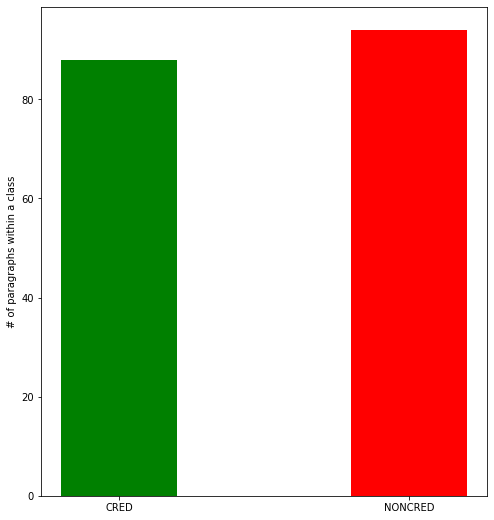

Counter({0: 94, 1: 88})

In [ ]:
da_label_counter = Counter(diet_and_autism_Y_no)
plt.bar(x=['CRED', 'NONCRED'], height=da_label_counter.values(), width=0.4, color=['g', 'r'])
plt.ylabel('# of paragraphs within a class')
plt.show()
da_label_counter

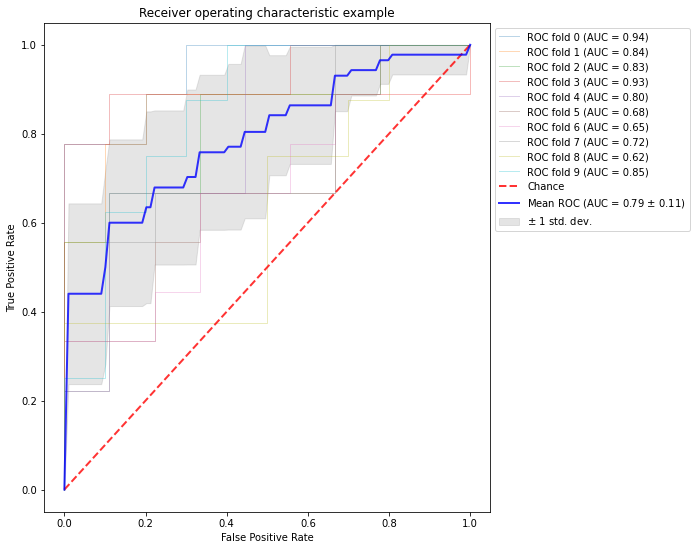

In [ ]:
show_auc_for_cv(LogisticRegression(max_iter=1000), diet_and_autism_X[diet_and_autism_important_features], diet_and_autism_Y_no, n_splits=10)

Model: GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


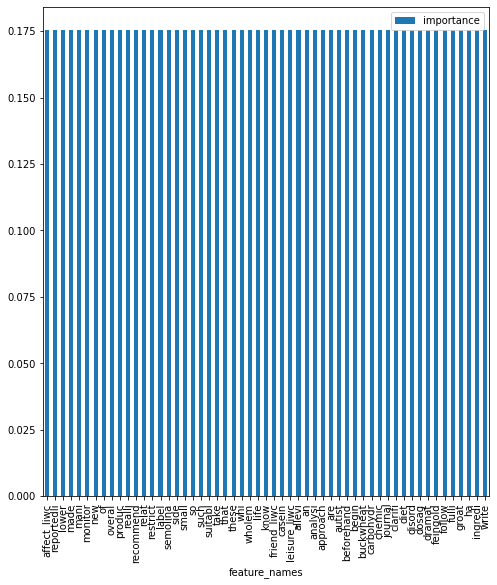

In [ ]:
proba_1, proba_0, clf = predict_proba_hist(diet_and_autism_fitted_pipeline, 
                                      diet_and_autism_X, 
                                      diet_and_autism_Y_no, 
                                      diet_and_autism_important_features)


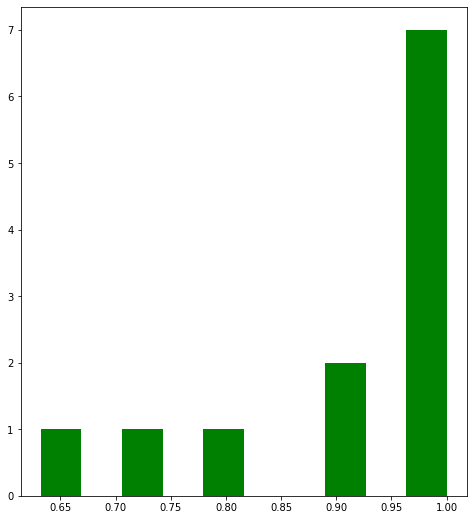

In [ ]:

plt.hist(proba_1.values(), bins=10, color='g')
plt.show()

## aspirin during pregnancy

In [ ]:
print(np.shape(aspirin_pregnancy_X_overlap))
print(np.shape(aspirin_pregnancy_Y))

(326, 1372)
(326,)


In [ ]:
aspirin_important_features, tpot_aspirin = teapot_optimizer(aspirin_pregnancy_X, 
                               aspirin_pregnancy_Y, 
                               num_important_features = 100,
                               cv=5,
                               VALIDATION_SPLIT=0.4)
pickle.dump(tpot_aspirin.fitted_pipeline_, open('/content/drive/My Drive/Colab Notebooks/aspirin_fitted_pipeline.p','wb'))

In [ ]:
aspirin_important_features = ['Clout', 'WPS', 'Dic', 'we', 'they', 'anger', 'cogproc', 'reward', 'focuspresent', 'space', 'home', 'nonflu', 'Period', 'QMark', 'Dash', 'TIME', 'abrupt', 'acetaminophen', 'administr', 'advis', 'ailment', 'all', 'are', 'ask', 'aspirin', 'atherosclerosi', 'avoid', 'be', 'becam', 'becaus', 'born', 'ca', 'cancer', 'case', 'circumst', 'clot', 'commonli', 'consid', 'consult', 'contraind', 'correl', 'describ', 'determin', 'diseas', 'disord', 'dosag', 'elimin', 'embryo', 'explicit', 'explor', 'facilit', 'find', 'gestat', 'get', 'headach', 'healthi', 'hour', 'how', 'iii', 'implant', 'infect', 'institut', 'intak', 'lactat', 'last', 'like', 'look', 'maximum', 'menstruat', 'mom', 'month', 'more', 'mother', 'nation', 'never', 'no', 'non', 'nonsteroid', 'not', 'often', 'order', 'osteoporosi', 'painkil', 'paracetamol', 'period', 'pose', 'preced', 'preeclampsia', 'prolong', 'properti', 're', 'regularli', 'rememb', 'right', 'safe', 'safer', 'safest', 'salicyl', 'similarli', 'so', 'steroid', 'studi', 'study', 'suddenli', 'supervis', 'suppress', 'system', 'tell', 'their', 'therebi', 'thi', 'thu', 'treat', 'tylenol', 'unfortun', 'us', 'usual', 'way', 'well', 'when', 'will', 'with', 'within', 'without', 'worth', 'year', 'polarity']
aspirin_pipeline = pickle.load(open('/content/drive/My Drive/Colab Notebooks/aspirin_fitted_pipeline.p','rb'))
mean_weighted_f1(aspirin_pipeline, aspirin_pregnancy_X[aspirin_important_features], aspirin_pregnancy_Y, 30, 0.4)

In [ ]:
show_auc_for_cv(aspirin_pipeline, aspirin_pregnancy_X[aspirin_important_features], aspirin_pregnancy_Y, n_splits=10)

In [ ]:
aspirin_label_counter = Counter(aspirin_pregnancy_Y)
plt.bar(x=['NONCRED', 'CRED'], height=aspirin_label_counter.values(), width=0.4, color=['r', 'g'])
plt.ylabel('# of paragraphs within a class')
plt.show()
aspirin_label_counter

In [ ]:
proba_1, proba_0 = predict_proba_hist(aspirin_pipeline, 
                                      aspirin_pregnancy_X, 
                                      aspirin_pregnancy_Y, 
                                      aspirin_important_features)

plt.hist(proba_1.values(), bins=10, color='g')
plt.show()

In [ ]:
plt.hist(proba_0.values(), bins=10, color='r')
plt.show()

## allergy testing

### Overlapping paragraphs

In [ ]:
print(np.shape(allergy_testing_X_overlap))
print(np.shape(allergy_testing_Y))

(1353, 2387)
(1353,)


In [ ]:
1353*0.3

405.9

Running RFE to find the most supportive features
Optimal number of features according to RFE : 537


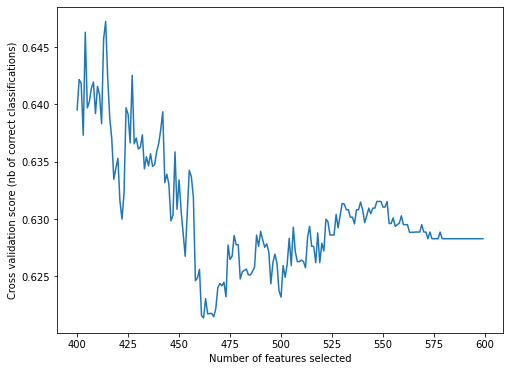

Number of features:  400
['Clout_liwc', 'WPS_liwc', 'Dic_liwc', 'ppron_liwc', 'we_liwc', 'you_liwc', 'article_liwc', 'number_liwc', 'quant_liwc', 'anx_liwc', 'friend_liwc', 'cogproc_liwc', 'tentat_liwc', 'differ_liwc', 'percept_liwc', 'hear_liwc', 'feel_liwc', 'body_liwc', 'health_liwc', 'power_liwc', 'focuspast_liwc', 'focuspresent_liwc', 'motion_liwc', 'money_liwc', 'relig_liwc', 'assent_liwc', 'Period_liwc', 'QMark_liwc', 'Apostro_liwc', 'PERCENT_NER', 'ORDINAL_NER', 'WORK_OF_ART_NER', 'abdomin', 'accredit', 'accumul', 'achiev', 'actual', 'adult', 'after', 'against', 'agre', 'agro', 'alway', 'amber', 'amount', 'an', 'analys', 'anyth', 'appar', 'appear', 'appoint', 'area', 'aren', 'argu', 'aris', 'assess', 'assist', 'associ', 'at', 'avail', 'avoid', 'babi', 'base', 'basi', 'be', 'believ', 'benefici', 'better', 'biggest', 'blood', 'book', 'borderlin', 'breastmilk', 'bring', 'bundl', 'burden', 'can', 'cater', 'cbc', 'certain', 'challeng', 'chanc', 'changes', 'cheaper', 'chemistri', 'ch

In [ ]:
plt.rcParams["figure.figsize"] = (8, 6) # (w, h)
_, _, allergy_testing_important_features = get_important_features(allergy_testing_X_overlap, 
                                      allergy_testing_Y, 
                                      num_important_features=400)


Generation 1 - Current best internal CV score: 0.8213077725832882

Generation 2 - Current best internal CV score: 0.8296354688504698

Generation 3 - Current best internal CV score: 0.8323680663150859

Best pipeline: MLPClassifier(LogisticRegression(LogisticRegression(input_matrix, class_weight=None, max_iter=10000), class_weight=balanced, max_iter=10000), activation=relu, hidden_layer_sizes=(50, 20), learning_rate=adaptive, max_iter=1000)


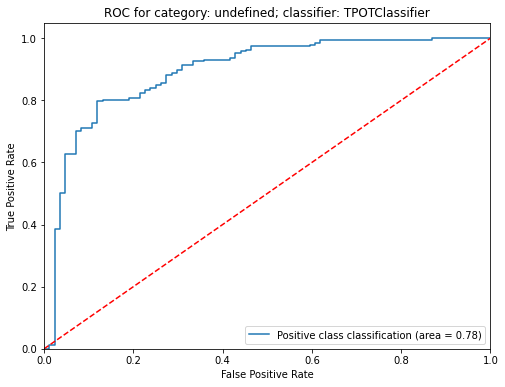

              precision    recall  f1-score   support

           0       0.80      0.63      0.71        84
           1       0.85      0.93      0.89       187

    accuracy                           0.84       271
   macro avg       0.83      0.78      0.80       271
weighted avg       0.83      0.84      0.83       271



In [ ]:
tpot_allergy = teapot_optimizer(allergy_testing_X_overlap, 
                               allergy_testing_Y, 
                               important_features = allergy_testing_important_features,
                               VALIDATION_SPLIT=0.2)
# pickle.dump(tpot_allergy.fitted_pipeline_, open('/content/drive/My Drive/Colab Notebooks/allergy_fitted_pipeline.p','wb'))

In [ ]:
# allergy_testing_important_features = ['WC', 'Analytic', 'Clout', 'Tone', 'WPS', 'Sixltr', 'Dic', 'function', 'pronoun', 'ppron', 'i', 'we', 'you', 'shehe', 'they', 'article', 'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'compare', 'number', 'quant', 'posemo', 'anx', 'anger', 'sad', 'family', 'female', 'cogproc', 'insight', 'cause', 'discrep', 'tentat', 'certain', 'differ', 'bio', 'health', 'sexual', 'drives', 'affiliation', 'power', 'reward', 'risk', 'focuspast', 'focuspresent', 'focusfuture', 'motion', 'time', 'work', 'home', 'money', 'relig', 'death', 'informal', 'swear', 'nonflu', 'AllPunc', 'Period', 'Comma', 'Colon', 'SemiC', 'QMark', 'Exclam', 'Dash', 'Quote', 'Apostro', 'Parenth', 'OtherP', 'CARDINAL', 'ORG', 'DATE', 'PERSON', 'PERCENT', 'EVENT', 'MONEY', 'aaaai', 'abdomin', 'abov', 'absolut', 'absorb', 'abund', 'academi', 'access', 'accessori', 'accompani', 'accomplish', 'accord', 'account', 'accredit', 'accumul', 'ach', 'achiev', 'acn', 'act', 'action', 'activ', 'acupunctur', 'ad', 'add', 'addit', 'addressintoler', 'adequ', 'adhes', 'administr', 'adult', 'advanc', 'advantag', 'advers', 'advertis', 'advis', 'advoc', 'affect', 'afterward', 'against', 'age', 'agent', 'agre', 'agro', 'ah', 'air', 'alcohol', 'all', 'allerg', 'allergen', 'allergi', 'allergist', 'allergy', 'allison', 'almost', 'alon', 'alot', 'alpay', 'alreadi', 'also', 'altern', 'altogeth', 'alway', 'am', 'amber', 'amin', 'amount', 'an', 'analys', 'analysi', 'analyt', 'analyz', 'anaphylact', 'anaphylaxi', 'annoy', 'anoth', 'answers', 'antibodi', 'antibody', 'antihistamin', 'anybodi', 'anyth', 'anytim', 'anywher', 'apart', 'appar', 'appear', 'appl', 'applyt', 'appoint', 'appointment', 'approach', 'appropri', 'april', 'area', 'aren', 'argu', 'arguabl', 'argument', 'aris', 'arm', 'around', 'arriv', 'arroyav', 'art', 'arthralgia', 'arthriti', 'artifici', 'as', 'asid', 'ask', 'aspartam', 'assay', 'assist', 'associ', 'assum', 'asthma', 'at', 'athlet', 'atkinson', 'atop', 'attach', 'attribut', 'audit', 'author', 'autism', 'autoimmun', 'autoinjector', 'avail', 'averag', 'await', 'award', 'awesom', 'babi', 'babies', 'back', 'background', 'bag', 'balanc', 'barley', 'barrier', 'bas', 'base', 'basi', 'basic', 'batteri', 'bbq', 'bda', 'be', 'bead', 'bean', 'beat', 'beauti', 'becaus', 'befor', 'begin', 'behind', 'believ', 'belli', 'below', 'benefici', 'benefit', 'bentz', 'best', 'bestsel', 'better', 'between', 'beyond', 'bia', 'biggest', 'bind', 'biochemist', 'biom', 'bird', 'bite', 'black', 'blight', 'blind', 'body', 'book', 'booklet', 'booster', 'borderlin', 'born', 'both', 'bothersom', 'bottl', 'bottom', 'box', 'brain', 'brand', 'brazilian', 'bread', 'break', 'breast', 'breastfe', 'breastfeed', 'breastmilk', 'breath', 'brief', 'briefli', 'brilliant', 'bring', 'british', 'broader', 'bulb', 'bump', 'burden', 'busi', 'buss', 'buy', 'by', 'ca', 'call', 'cam', 'came', 'can', 'canada', 'canadian', 'captur', 'carb', 'card', 'care', 'carefre', 'caregiv', 'carr', 'carri', 'carrot', 'case', 'cash', 'catch', 'categor', 'categori', 'cater', 'caught', 'caus', 'cbc', 'cdc', 'ce', 'celebr', 'celiac', 'cell', 'cells', 'cellular', 'center', 'centrevik', 'certain', 'chanc', 'chang', 'charg', 'charlsi', 'cheaper', 'check', 'chemic', 'chemistri', 'chest', 'chicken', 'child', 'childhood', 'children', 'chili', 'choic', 'choke', 'choos', 'chosen', 'chronic', 'chuck', 'cilantro', 'circul', 'citat', 'claim', 'clamp', 'clan', 'class', 'classic', 'classifi', 'clear', 'clearli', 'click', 'client', 'clog', 'close', 'clue', 'cmaj', 'co', 'cod', 'code', 'coin', 'collect', 'colour', 'come', 'comfort', 'commerci', 'commercially', 'common', 'commonli', 'compani', 'comparison', 'compel', 'competitor', 'complementari', 'compon', 'concern', 'condit', 'condition', 'conduct', 'confidenti', 'confirm', 'confus', 'conjunct', 'consid', 'consist', 'constant', 'construct', 'consult', 'consum', 'consumpt', 'contact', 'contain', 'contamin', 'content', 'context', 'control', 'conveni', 'convent', 'convers', 'convinc', 'cook', 'copolym', 'copyright', 'corn', 'correl', 'cough', 'couldn', 'count', 'countless', 'countri', 'cow', 'cramp', 'crap', 'crave', 'crazi', 'cream', 'creat', 'credibl', 'crisp', 'critic', 'crohn', 'crucial', 'culprit', 'cultur', 'curd', 'curiou', 'cut', 'cystic', 'cytotox', 'dairi', 'damag', 'danger', 'databas', 'date', 'daughter', 'day', 'days', 'debat', 'debra', 'deconstruct', 'defenc', 'defici', 'definit', 'delay', 'delayed', 'delight', 'deposit', 'depress', 'dermat', 'describ', 'design', 'dessani', 'dessanti', 'detail', 'detect', 'deterg', 'detergents', 'develop', 'diagnos', 'diagnosi', 'diagnosis', 'diagnost', 'dictat', 'diet', 'dietari', 'dietet', 'differ', 'difficulti', 'digest', 'dinner', 'dip', 'direct', 'directli', 'director', 'disappear', 'disclaim', 'discomfort', 'discov', 'discuss', 'disrupt', 'distinguish', 'distress', 'do', 'doctor', 'doe', 'dollars', 'don', 'dont', 'dose', 'dot', 'download', 'dr', 'dramat', 'draw', 'dri', 'drink', 'drinkscan', 'drisko', 'drop', 'drown', 'drugstor', 'dt', 'due', 'dure', 'dust', 'dynacar', 'each', 'earli', 'easier', 'easili', 'eat', 'eczema', 'educ', 'egg', 'eight', 'either', 'electromagnet', 'elev', 'elimin', 'elimination', 'elisa', 'els', 'email', 'embarrass', 'emerg', 'end', 'endors', 'energi', 'engag', 'enhanc', 'enterpris', 'entir', 'entireti', 'envelop', 'environ', 'enzym', 'enzyme', 'epilepsi', 'epinephrin', 'episod', 'epitop', 'equip', 'essenti', 'establish', 'estim', 'etc', 'european', 'everi', 'everlywel', 'everyday', 'everyon', 'everyth', 'everywher', 'evidence', 'exagger', 'examin', 'excel', 'exclud', 'exclus', 'exist', 'expect', 'expens', 'experienc', 'expert', 'explan', 'exploit', 'explor', 'expos', 'exposur', 'extra', 'face', 'factor', 'factsheet', 'failur', 'fake', 'fals', 'famili', 'familiar', 'faster', 'fatigu', 'fattier', 'feather', 'featur', 'fee', 'feed', 'femal', 'few', 'fiber', 'fibrosi', 'field', 'fight', 'fill', 'filter', 'find', 'fine', 'finger', 'fingerprint', 'first', 'firststep', 'fish', 'five', 'flag', 'flare', 'flax', 'flow', 'fodmap', 'fog', 'folder', 'food', 'foods', 'foodscan', 'for', 'forearm', 'forgot', 'fork', 'format', 'formula', 'found', 'four', 'fourth', 'framepric', 'fre', 'freedom', 'frequent', 'friendli', 'from', 'front', 'frustrat', 'full', 'function', 'further', 'furthermor', 'fussi', 'fussier', 'futur', 'gallergi', 'garlic', 'gassi', 'gastroesophag', 'gastrointestin', 'gear', 'gene', 'gener', 'genet', 'genova', 'gerd', 'get', 'gill', 'girl', 'give', 'gladli', 'glass', 'glutam', 'gluten', 'goal', 'goe', 'gold', 'got', 'gotten', 'gp', 'grab', 'gradual', 'grant', 'greater', 'green', 'groceri', 'ground', 'group', 'growth', 'guarante', 'guidanc', 'gulp', 'gut', 'guy', 'gym', 'ha', 'had', 'hair', 'hand', 'handl', 'happen', 'happi', 'harmoni', 'hart', 'hartz', 'have', 'hazard', 'he', 'head', 'headach', 'headaches', 'healthcar', 'healthi', 'healthier', 'hell', 'help', 'henc', 'hepat', 'here', 'hesit', 'hidden', 'high', 'higher', 'highli', 'highlight', 'him', 'hint', 'histamin', 'histori', 'hiv', 'hive', 'hold', 'home', 'honey', 'hong', 'hope', 'hormon', 'horribl', 'hospit', 'host', 'hotlin', 'hous', 'household', 'how', 'howev', 'human', 'hummu', 'hundr', 'hurri', 'hypersensit', 'ice', 'ick', 'ideal', 'identif', 'if', 'ig', 'ige', 'igg', 'iii', 'ill', 'illustr', 'imbal', 'immediate', 'immun', 'immune', 'immunodiagnost', 'immunoglobulin', 'immunolog', 'immunotherapi', 'impact', 'implic', 'import', 'improv', 'imupro', 'inappropri', 'includ', 'inconveni', 'incorrect', 'increas', 'independ', 'indigest', 'indirectli', 'indiscrimin', 'industri', 'infant', 'infect', 'inflamm', 'influenc', 'info', 'ingest', 'ingredi', 'inhal', 'initi', 'inject', 'innov', 'insight', 'insomnia', 'instanc', 'instant', 'instantli', 'instead', 'instruct', 'intak', 'interchang', 'interest', 'interfer', 'internet', 'interpret', 'intoler', 'intolerance', 'intolerancelab', 'intolerances', 'introduc', 'introduct', 'invad', 'invalu', 'invasivedo', 'invertebr', 'invit', 'involv', 'ireland', 'iron', 'irrit', 'is', 'isn', 'iso', 'issu', 'itch', 'item', 'itself', 'jarrow', 'jk', 'joe', 'join', 'joint', 'journal', 'journey', 'judgement', 'juic', 'juli', 'junior', 'keep', 'kid', 'kidney', 'kilounit', 'kinet', 'kirst', 'kit', 'kitchen', 'kiwi', 'know', 'knowledg', 'known', 'kong', 'kua', 'lab', 'label', 'lack', 'lactas', 'lactat', 'lactos', 'lancet', 'larg', 'larger', 'last', 'later', 'latest', 'lazi', 'leaflet', 'leaki', 'learn', 'leav', 'lectin', 'leg', 'leukocyt', 'level', 'lge', 'lgg', 'lian', 'licens', 'lie', 'life', 'light', 'likelihood', 'lime', 'linda', 'link', 'liter', 'literatur', 'litr', 'littl', 'live', 'll', 'locat', 'lock', 'long', 'longer', 'look', 'lose', 'loss', 'lot', 'love', 'low', 'lower', 'ltd', 'lunch', 'lymphocyt', 'mack', 'macrophag', 'made', 'mail', 'main', 'maintain', 'major', 'make', 'maker', 'malnutrit', 'mama', 'man', 'manag', 'manage', 'manifest', 'manner', 'map', 'mar', 'marker', 'market', 'martha', 'mastiti', 'materi', 'matter', 'max', 'may', 'mayb', 'mean', 'meanwhil', 'measur', 'mechan', 'meconium', 'medela', 'medic', 'mercuri', 'messag', 'messeng', 'metabol', 'metal', 'method', 'microbiom', 'might', 'migrain', 'millet', 'mind', 'minn', 'minu', 'minut', 'misconcept', 'miss', 'mitchel', 'moder', 'modern', 'modif', 'mold', 'mom', 'moment', 'momma', 'money', 'monitor', 'monosodium', 'month', 'mood', 'more', 'mother', 'mountain', 'mouth', 'mrt', 'msg', 'mucou', 'mucousi', 'multipl', 'muscl', 'narrow', 'natur', 'naturopath', 'nausea', 'navig', 'ncg', 'ne', 'necessarili', 'neg', 'never', 'new', 'newcastl', 'next', 'nh', 'nibsc', 'nightshad', 'nippl', 'nitrit', 'no', 'none', 'nonfood', 'nor', 'normal', 'not', 'noth', 'notic', 'number', 'numer', 'nurs', 'nurtur', 'nutrient', 'nutrit', 'nutriti', 'nutritionist', 'nutritionistsnon', 'oald', 'ob', 'obes', 'observ', 'obtain', 'occasion', 'occur', 'of', 'off', 'offend', 'offer', 'offic', 'offici', 'often', 'oh', 'okay', 'oldest', 'on', 'one', 'ongo', 'onion', 'onli', 'onlin', 'only', 'opaqu', 'open', 'openli', 'opinion', 'opportun', 'opt', 'optimis', 'optimum', 'option', 'or', 'oral', 'order', 'organ', 'other', 'otherwis', 'ounc', 'our', 'out', 'outgrow', 'outlet', 'overal', 'overcom', 'overreact', 'oversuppli', 'overwhelm', 'own', 'oxal', 'pack', 'packag', 'pad', 'paid', 'pain', 'painless', 'parent', 'park', 'partial', 'particular', 'pass', 'passion', 'past', 'patient', 'pattern', 'pay', 'payment', 'pdf', 'peak', 'peanut', 'pediatr', 'pediatrician', 'peopl', 'percent', 'perform', 'period', 'permeabl', 'person', 'pet', 'pharmaci', 'phas', 'phase', 'phone', 'photo', 'physic', 'physician', 'pick', 'pictur', 'piec', 'pin', 'pinpoint', 'pistin', 'pita', 'place', 'planner', 'plants', 'plaster', 'play', 'pleas', 'pln', 'pluck', 'point', 'poison', 'pollen', 'polymer', 'poop', 'poorli', 'popul', 'popular', 'portion', 'positive', 'post', 'potato', 'potenti', 'powder', 'practic', 'practition', 'pre', 'predict', 'predispos', 'pregnanc', 'pregnant', 'prepar', 'prescrib', 'presenc', 'present', 'preserv', 'press', 'presum', 'pretend', 'pretti', 'prevent', 'previou', 'print', 'probabl', 'problem', 'problemat', 'problems', 'procedur', 'proceed', 'produc', 'product', 'products', 'progress', 'projectil', 'promise', 'promot', 'proper', 'properli', 'proprietari', 'protein', 'protocol', 'proud', 'prove', 'proven', 'provok', 'public', 'publish', 'pull', 'puls', 'pump', 'purchas', 'purpos', 'purveyor', 'puré', 'put', 'quantit', 'quantiti', 'queri', 'queso', 'question', 'quibbl', 'quicker', 'quickli', 'quinoa', 'quot', 'rais', 'ran', 'random', 'rapidly', 'rate', 'ration', 'rational', 'raven', 'raw', 're', 'reach', 'react', 'reaction', 'reactiv', 'read', 'readi', 'realiti', 'realiz', 'realli', 'reason', 'recal', 'recent', 'recently', 'rechalleng', 'recip', 'recognit', 'recommend', 'recoveri', 'recreat', 'refer', 'referr', 'refund', 'refus', 'regard', 'regular', 'regularli', 'regularly', 'relat', 'relationship', 'relev', 'reli', 'reliabl', 'relianc', 'reliev', 'remain', 'renown', 'report', 'reput', 'requir', 'requisit', 'research', 'reserv', 'resolv', 'respond', 'rest', 'restraint', 'restrict', 'result', 'results', 'resuscit', 'return', 'reveal', 'rheumatoid', 'right', 'rinkel', 'risen', 'riski', 'road', 'robert', 'rochest', 'rocki', 'role', 'root', 'rotat', 'rule', 'run', 'sad', 'safe', 'sake', 'sal', 'salad', 'sale', 'salicyl', 'same', 'sampl', 'sandwich', 'satisfact', 'saturday', 'save', 'saw', 'say', 'scale', 'scan', 'schedul', 'school', 'scienc', 'scientif', 'scientist', 'score', 'scratch', 'scream', 'second', 'section', 'secur', 'see', 'seed', 'seek', 'sell', 'semi', 'send', 'sensit', 'sensitivities', 'sensitivity', 'sent', 'separ', 'seri', 'seriou', 'serious', 'serum', 'servic', 'sesam', 'set', 'sever', 'share', 'she', 'sheet', 'shellfish', 'ship', 'shirt', 'shop', 'shot', 'should', 'shouldn', 'show', 'sick', 'sieman', 'siemen', 'sign', 'signal', 'signifi', 'signific', 'silenc', 'similar', 'simpl', 'sinc', 'singl', 'sit', 'site', 'situat', 'six', 'sizelarg', 'sizeregular', 'skin', 'skinni', 'slower', 'slowli', 'sme', 'smith', 'smoothi', 'sneaki', 'snot', 'so', 'soak', 'social', 'societi', 'soft', 'sold', 'solid', 'solubl', 'solut', 'solv', 'some', 'someth', 'sometim', 'son', 'soooooo', 'sorrow', 'sound', 'soup', 'sourc', 'soy', 'spam', 'spec', 'special', 'specialist', 'specif', 'specifi', 'speed', 'spend', 'spit', 'spoke', 'sport', 'spot', 'spray', 'squeez', 'sst', 'staf', 'stage', 'stain', 'stand', 'standard', 'start', 'starter', 'state', 'statnew', 'step', 'sterilis', 'steroid', 'still', 'stimul', 'sting', 'stop', 'store', 'straightforward', 'strand', 'strang', 'stress', 'strong', 'stuart', 'subject', 'sublingu', 'submiss', 'submit', 'substanc', 'success', 'such', 'suck', 'suction', 'suffer', 'sugar', 'suggest', 'sulfit', 'summaris', 'supervis', 'suppli', 'support', 'surpris', 'survey', 'suspect', 'swallow', 'symptom', 'symptoms', 'system', 'ta', 'tab', 'tad', 'take', 'takeout', 'task', 'tast', 'tasti', 'team', 'technic', 'technician', 'technolog', 'telephon', 'televis', 'tell', 'temporari', 'tendenc', 'test', 'testedqualifi', 'testfood', 'testimoni', 'testing', 'tests', 'text', 'that', 'the', 'their', 'them', 'therapi', 'therapist', 'there', 'therefor', 'therfor', 'thes', 'these', 'they', 'thi', 'thorough', 'thoroughli', 'those', 'thought', 'threaten', 'three', 'throat', 'thu', 'time', 'tini', 'tip', 'tired', 'tissu', 'to', 'today', 'togeth', 'toilet', 'told', 'ton', 'tongu', 'too', 'toss', 'total', 'tough', 'toxic', 'toxin', 'track', 'trader', 'train', 'treat', 'treatment', 'tree', 'tri', 'trial', 'tribe', 'trigger', 'trip', 'troubl', 'true', 'truli', 'truschnig', 'truth', 'tummi', 'twice', 'two', 'type', 'typic', 'tyramin', 'ugh', 'uk', 'ulcer', 'unawar', 'unclear', 'uncomfort', 'uncommon', 'uncov', 'undergo', 'understand', 'understood', 'undertak', 'underway', 'undiagnos', 'undo', 'unfortun', 'unhealthi', 'unit', 'univers', 'unless', 'unlik', 'unpleas', 'unrel', 'unresolv', 'until', 'untreat', 'unwel', 'unwelcom', 'up', 'upon', 'us', 'use', 'useless', 'usinfo', 'usual', 'utmost', 'valid', 'valu', 'valuabl', 'vari', 'varieti', 'variou', 'vasoact', 'vegan', 'vendor', 'versu', 'vessel', 'via', 'vial', 'view', 'visit', 'vital', 'vl', 'volum', 'vomit', 'vs', 'warn', 'warsaw', 'wasn', 'watch', 'wateri', 'we', 'wear', 'websit', 'week', 'weight', 'welcom', 'wellb', 'wendi', 'went', 'were', 'western', 'what', 'wheat', 'wheez', 'when', 'whenev', 'wherea', 'whether', 'whi', 'which', 'while', 'white', 'whom', 'widespread', 'wilders', 'will', 'william', 'win', 'wind', 'wine', 'wipe', 'wise', 'within', 'won', 'wood', 'word', 'worldwid', 'wors', 'worst', 'worth', 'wu', 'ye', 'year', 'yellow', 'yet', 'yoghurt', 'york', 'yorktest', 'you', 'young', 'your', 'yourself', 'zealand', 'zone', 'zucchini', 'polarity', 'subjectivity']
# allergy_testing_pipeline = pickle.load(open('/content/drive/My Drive/Colab Notebooks/allergy_fitted_pipeline.p','rb'))
# mean_weighted_f1(allergy_testing_pipeline, allergy_testing_X[allergy_testing_important_features], allergy_testing_Y, 30, 0.2)

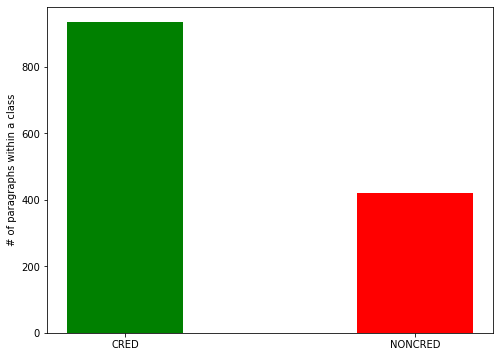

Counter({0: 419, 1: 934})

In [ ]:
allergy_label_counter = Counter(allergy_testing_Y)
plt.bar(x=['CRED', 'NONCRED'], height=allergy_label_counter.values(), width=0.4, color=['g', 'r'])
plt.ylabel('# of paragraphs within a class')
plt.show()
allergy_label_counter

In [ ]:
allergy_testing_fitted_pipeline = tpot_allergy.fitted_pipeline_.steps[-1][1]

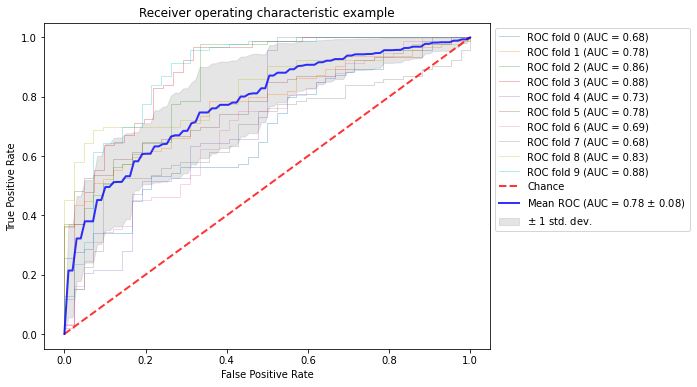

In [ ]:
show_auc_for_cv(allergy_testing_fitted_pipeline, allergy_testing_X_overlap[allergy_testing_important_features], allergy_testing_Y, n_splits=10)

In [ ]:
mean_weighted_f1(allergy_testing_fitted_pipeline, 
                 allergy_testing_X_overlap[allergy_testing_important_features], 
                 allergy_testing_Y, 
                 20, 
                 0.2)
mean_precision(allergy_testing_fitted_pipeline, 
                 allergy_testing_X_overlap[allergy_testing_important_features], 
                 allergy_testing_Y, 
                 20, 
                 0.2)

Mean weighted f1:  0.8773695193653162  STD:  0.01767513590833547
Mean micro f1:  0.8785977859778598  STD:  0.01757712968828716
Mean precision for class 1:  0.8996574265929131  STD:  0.021159548153706815


Model: MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 20), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
Loading LIME feature importance retrieval model...


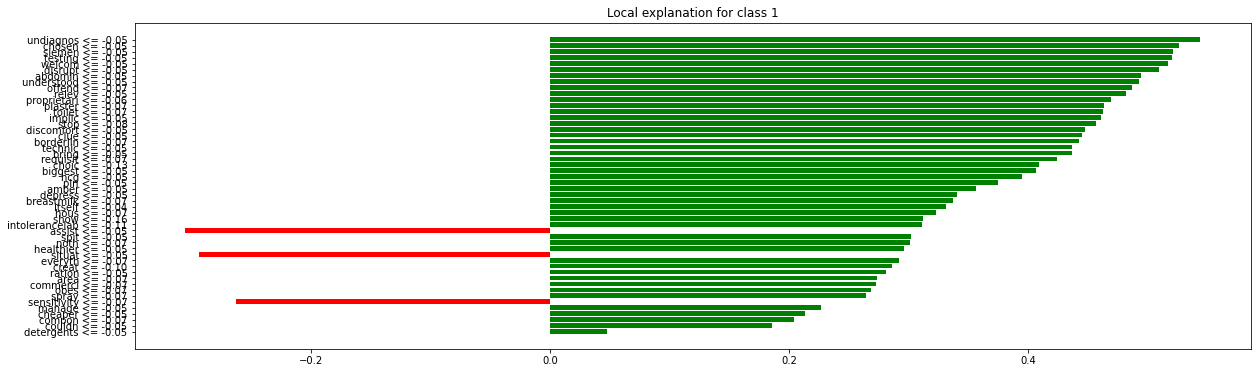

In [ ]:
plt.rcParams["figure.figsize"] = (20, 6) # (w, h)
proba_1, proba_0, clf = predict_proba_hist(allergy_testing_fitted_pipeline, 
                                      allergy_testing_X_overlap, 
                                      allergy_testing_Y, 
                                      allergy_testing_important_features)

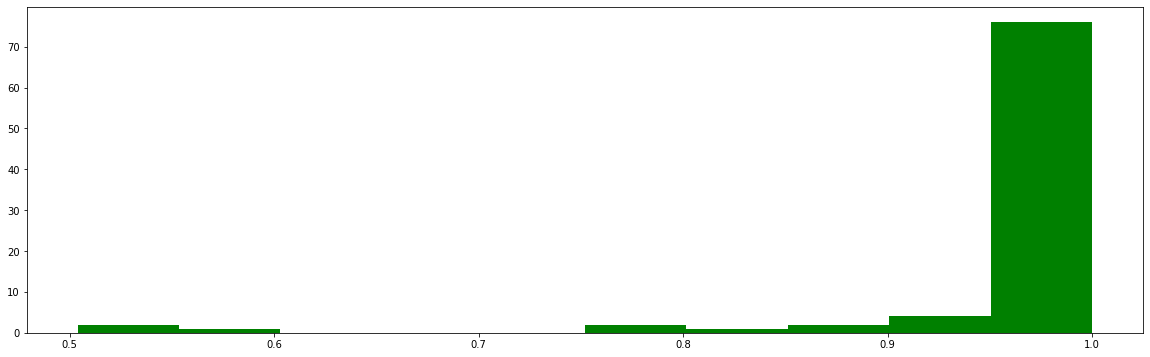

In [ ]:
plt.hist(proba_1.values(), bins=10, color='g')
plt.show()

### Non-overlapping paragraphs

In [ ]:
print(np.shape(allergy_testing_X))
print(np.shape(allergy_testing_Y_no))

(451, 2342)
(451,)


In [ ]:
451*0.3

135.29999999999998

Running RFE to find the most supportive features
Optimal number of features according to RFE : 1682


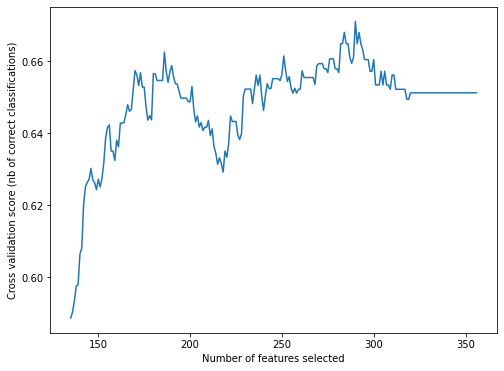

Number of features:  135
['Dic_liwc', 'i_liwc', 'we_liwc', 'article_liwc', 'number_liwc', 'sad_liwc', 'cogproc_liwc', 'tentat_liwc', 'health_liwc', 'power_liwc', 'Period_liwc', 'PERCENT_NER', 'acupunctur', 'addit', 'adhes', 'agro', 'allergi', 'analys', 'analyz', 'appar', 'basi', 'below', 'book', 'breastmilk', 'can', 'celebr', 'children', 'choke', 'click', 'clue', 'come', 'confidenti', 'cough', 'countless', 'dairi', 'damag', 'definit', 'delayed', 'detail', 'deterg', 'detergents', 'dictat', 'doctor', 'eight', 'elisa', 'els', 'etc', 'everi', 'exclud', 'exposur', 'familiar', 'fill', 'find', 'finger', 'five', 'for', 'gluten', 'group', 'guarante', 'guidanc', 'hair', 'head', 'hidden', 'hive', 'hold', 'hope', 'ig', 'ige', 'igg', 'immun', 'indigest', 'insight', 'insomnia', 'itself', 'life', 'live', 'longer', 'lose', 'make', 'manner', 'multipl', 'new', 'no', 'noth', 'notic', 'numer', 'of', 'often', 'one', 'optimum', 'our', 'oversuppli', 'pack', 'pad', 'plaster', 'properli', 'quicker', 'rais', 'r

In [ ]:
plt.rcParams["figure.figsize"] = (8, 6) # (w, h)
_, _, allergy_testing_important_features = get_important_features(allergy_testing_X, 
                                      allergy_testing_Y_no, 
                                      num_important_features=135)


Generation 1 - Current best internal CV score: 0.8434199134199133

Generation 2 - Current best internal CV score: 0.8434199134199133

Generation 3 - Current best internal CV score: 0.8434199134199133

Best pipeline: GradientBoostingClassifier(MLPClassifier(input_matrix, activation=relu, hidden_layer_sizes=(30, 20), learning_rate=adaptive, max_iter=1000))


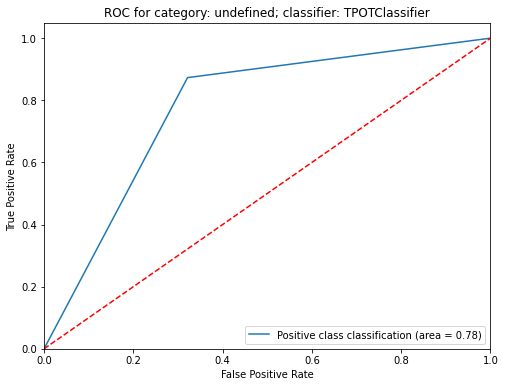

              precision    recall  f1-score   support

           0       0.70      0.68      0.69        28
           1       0.86      0.87      0.87        63

    accuracy                           0.81        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.81      0.81      0.81        91



In [ ]:
tpot_allergy = teapot_optimizer(allergy_testing_X, 
                               allergy_testing_Y_no, 
                               important_features = allergy_testing_important_features,
                               VALIDATION_SPLIT=0.2)
# pickle.dump(tpot_allergy.fitted_pipeline_, open('/content/drive/My Drive/Colab Notebooks/allergy_fitted_pipeline.p','wb'))

In [ ]:
allergy_testing_fitted_pipeline = tpot_allergy.fitted_pipeline_.steps[-1][1]

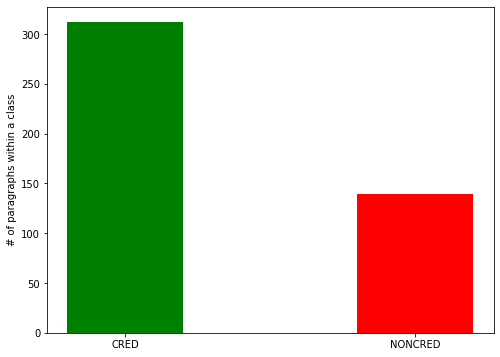

Counter({0: 139, 1: 312})

In [ ]:
allergy_label_counter = Counter(allergy_testing_Y_no)
plt.bar(x=['CRED', 'NONCRED'], height=allergy_label_counter.values(), width=0.4, color=['g', 'r'])
plt.ylabel('# of paragraphs within a class')
plt.show()
allergy_label_counter

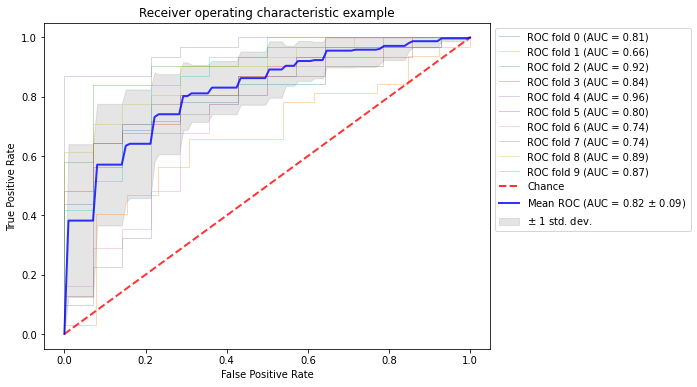

In [ ]:
show_auc_for_cv(allergy_testing_fitted_pipeline, allergy_testing_X[allergy_testing_important_features], allergy_testing_Y_no, n_splits=10)

In [ ]:
mean_weighted_f1(allergy_testing_fitted_pipeline, allergy_testing_X[allergy_testing_important_features], allergy_testing_Y_no, 20, 0.2)
mean_precision(allergy_testing_fitted_pipeline, allergy_testing_X[allergy_testing_important_features], allergy_testing_Y_no, 20, 0.2)

Mean weighted f1:  0.7623566734065383  STD:  0.02374008542813448
Mean micro f1:  0.7741758241758243  STD:  0.023943690735715287
Mean precision for class 1:  0.7998353147208455  STD:  0.030792086558544606


Model: GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


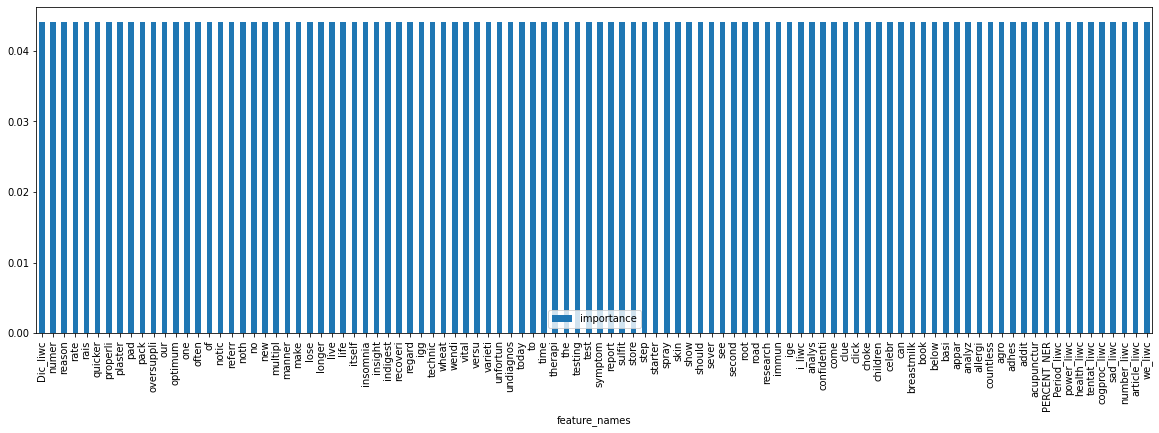

In [ ]:
plt.rcParams["figure.figsize"] = (20, 6) # (w, h)
proba_1, proba_0, clf = predict_proba_hist(allergy_testing_fitted_pipeline, 
                                      allergy_testing_X, 
                                      allergy_testing_Y_no, 
                                      allergy_testing_important_features)

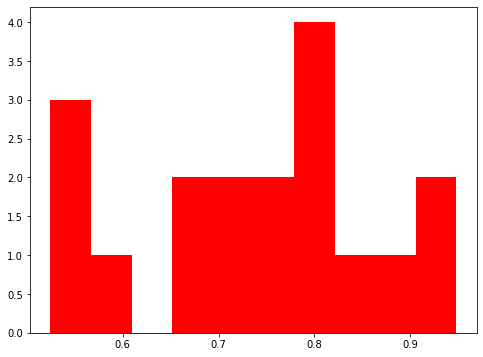

In [ ]:
plt.rcParams["figure.figsize"] = (8, 6) # (w, h)

plt.hist(proba_1.values(), bins=10, color='r')
plt.show()

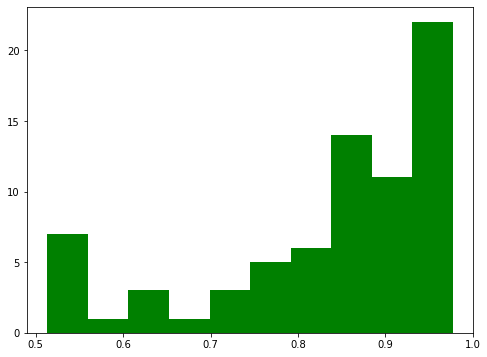

In [ ]:
plt.rcParams["figure.figsize"] = (8, 6) # (w, h)

plt.hist(proba_0.values(), bins=10, color='g')
plt.show()

## heart supplements

### Overlapping paragraphs

In [ ]:
print(np.shape(heart_supplements_X_overlap))
print(np.shape(heart_supplements_Y))

(448, 1600)
(448,)


In [ ]:
448*0.3

134.4

Running RFE to find the most supportive features
Optimal number of features according to RFE : 400


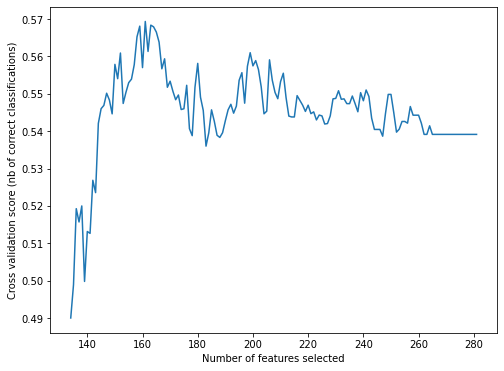

Number of features:  134
['Analytic_liwc', 'Sixltr_liwc', 'prep_liwc', 'negate_liwc', 'quant_liwc', 'affect_liwc', 'insight_liwc', 'drives_liwc', 'focuspast_liwc', 'money_liwc', 'abov', 'absorb', 'addit', 'adren', 'aid', 'alga', 'algal', 'alon', 'an', 'appear', 'appropri', 'bcca', 'beat', 'believ', 'best', 'better', 'brain', 'build', 'capsul', 'car', 'cardiovascular', 'cellular', 'chronic', 'claim', 'compon', 'compound', 'conclud', 'consid', 'consum', 'contributor', 'convert', 'coq', 'could', 'crummi', 'day', 'decreas', 'dissolv', 'do', 'downright', 'drink', 'duti', 'effect', 'electr', 'ensur', 'estrogen', 'everi', 'experienc', 'far', 'find', 'fluffi', 'found', 'get', 'growth', 'hdl', 'help', 'hospit', 'how', 'idea', 'import', 'indoor', 'inexepens', 'insolubl', 'isn', 'key', 'label', 'link', 'liquid', 'lowest', 'mainten', 'major', 'manag', 'mind', 'miner', 'most', 'nor', 'not', 'on', 'own', 'place', 'plumb', 'polyunsatur', 'posit', 'predictor', 'promot', 'prostat', 'rate', 'readili', '

In [ ]:
plt.rcParams["figure.figsize"] = (8, 6) # (w, h)
_, _, heart_supplements_important_features = get_important_features(heart_supplements_X_overlap, 
                                      heart_supplements_Y, 
                                      num_important_features=134)


Generation 1 - Current best internal CV score: 0.7414790764790765

Generation 2 - Current best internal CV score: 0.7688095238095238

Generation 3 - Current best internal CV score: 0.7688095238095238

Best pipeline: MLPClassifier(CombineDFs(input_matrix, input_matrix), activation=logistic, hidden_layer_sizes=(50, 20), learning_rate=adaptive, max_iter=1000)


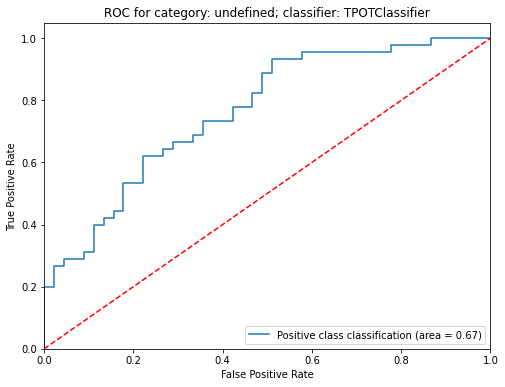

              precision    recall  f1-score   support

           0       0.67      0.64      0.66        45
           1       0.66      0.69      0.67        45

    accuracy                           0.67        90
   macro avg       0.67      0.67      0.67        90
weighted avg       0.67      0.67      0.67        90



In [ ]:
plt.rcParams["figure.figsize"] = (8, 6) # (w, h)

tpot_heart = teapot_optimizer(heart_supplements_X_overlap, 
                              heart_supplements_Y, 
                              important_features = heart_supplements_important_features,
                              VALIDATION_SPLIT=0.2)

# pickle.dump(tpot_heart.fitted_pipeline_, open('/content/drive/My Drive/Colab Notebooks/heart_supplements_fitted_pipeline.p','wb'))

In [ ]:
heart_supplements_fitted_pipeline = tpot_heart.fitted_pipeline_.steps[-1][1]

In [ ]:
# heart_supplements_important_features = ['Analytic', 'Authentic', 'Tone', 'Sixltr', 'i', 'shehe', 'article', 'prep', 'auxverb', 'negate', 'adj', 'number', 'quant', 'affect', 'negemo', 'anger', 'sad', 'female', 'male', 'cause', 'tentat', 'certain', 'bio', 'health', 'ingest', 'drives', 'reward', 'focuspast', 'time', 'work', 'leisure', 'money', 'filler', 'Comma', 'Colon', 'OtherP', 'DATE', 'CARDINAL', 'QUANTITY', 'ORDINAL', 'PERCENT', 'about', 'abov', 'absorb', 'absorption', 'accompani', 'acid', 'addit', 'adequ', 'adher', 'advis', 'against', 'aid', 'ail', 'alert', 'alga', 'algal', 'almost', 'alon', 'alpha', 'alreadi', 'american', 'amount', 'an', 'analysi', 'andunnecessary', 'anger', 'angina', 'ani', 'annal', 'anoth', 'anti', 'anticanc', 'anyth', 'appear', 'appli', 'appropri', 'are', 'argu', 'arteri', 'arugula', 'asbesto', 'asian', 'assess', 'assign', 'astaxanthin', 'at', 'athlet', 'attack', 'attribut', 'back', 'bailey', 'bcaa', 'beat', 'becaus', 'becom', 'beef', 'been', 'beetroot', 'behind', 'believ', 'benefit', 'berberin', 'between', 'beyond', 'biggest', 'bioenergi', 'block', 'bloodstream', 'bodi', 'bonu', 'book', 'boost', 'bowden', 'bowel', 'branch', 'bright', 'bring', 'broccoli', 'build', 'buildup', 'bump', 'burden', 'but', 'call', 'cancer', 'car', 'carcinogen', 'cardiologist', 'cardiovascular', 'carotenoid', 'cell', 'cellular', 'certain', 'chain', 'cheap', 'choic', 'cholesterol', 'cinnamon', 'circul', 'circumfer', 'claim', 'click', 'cod', 'cognit', 'collard', 'color', 'combat', 'combin', 'come', 'compani', 'complet', 'compon', 'compound', 'conclud', 'conduct', 'congest', 'conjunct', 'connect', 'consist', 'consum', 'contain', 'contribut', 'convent', 'convert', 'coq', 'count', 'counter', 'critic', 'crp', 'curcumin', 'current', 'cut', 'cystein', 'damag', 'danger', 'dangeroussubst', 'deal', 'death', 'decreas', 'deep', 'defibril', 'defici', 'dens', 'describ', 'design', 'detail', 'diabet', 'did', 'die', 'diet', 'dietari', 'dig', 'diseas', 'dismiss', 'dissolv', 'distinguish', 'dl', 'do', 'doe', 'doesn', 'downright', 'draw', 'drink', 'drug', 'due', 'dure', 'duti', 'earli', 'earth', 'easili', 'editori', 'educ', 'effici', 'either', 'elev', 'enabl', 'environmentally', 'enzym', 'eric', 'essenti', 'etc', 'event', 'everi', 'evid', 'exact', 'exampl', 'except', 'expect', 'experienc', 'explor', 'expos', 'extract', 'extractract', 'extrem', 'facilit', 'fact', 'factor', 'fashion', 'fatti', 'fattyacid', 'fda', 'februari', 'fib', 'filler', 'find', 'flavor', 'flexibl', 'fluff', 'fluffi', 'focu', 'folic', 'food', 'for', 'form', 'four', 'fresh', 'fruit', 'fundament', 'gap', 'garlic', 'get', 'glucos', 'glutamin', 'gold', 'goodfor', 'gpl', 'gplc', 'gradient', 'great', 'greater', 'greatli', 'growth', 'guid', 'ha', 'habit', 'had', 'harder', 'harmless', 'hawthorn', 'hbac', 'hcl', 'he', 'health', 'healthi', 'heart', 'heartbeat', 'heavili', 'help', 'herb', 'here', 'high', 'highest', 'highli', 'highlight', 'homocystein', 'hospit', 'how', 'hs', 'hydrat', 'hydrogen', 'hype', 'hypertens', 'idea', 'ie', 'immun', 'impact', 'import', 'improv', 'in', 'inadvert', 'incid', 'incorpor', 'ineffect', 'inexepens', 'inflammatori', 'ingredi', 'inher', 'inquiri', 'insolubl', 'instanc', 'insuffici', 'intak', 'intern', 'intervent', 'into', 'intuit', 'is', 'isn', 'iu', 'jarrow', 'jolla', 'journal', 'key', 'know', 'known', 'krill', 'la', 'label', 'lax', 'ldla', 'leafi', 'lean', 'learn', 'legum', 'lessen', 'let', 'level', 'lifestyl', 'lik', 'likelihood', 'limit', 'linolen', 'lipid', 'liquid', 'liver', 'load', 'long', 'longer', 'lot', 'love', 'lower', 'lowest', 'lpp', 'lung', 'lysin', 'mackerel', 'magnesium', 'main', 'mainten', 'manag', 'marin', 'marker', 'mayo', 'meal', 'meanwhil', 'measur', 'medicin', 'megar', 'men', 'merz', 'meta', 'metabol', 'methionin', 'method', 'might', 'mile', 'miller', 'mind', 'miner', 'mission', 'mmol', 'molecul', 'molecule', 'morgantown', 'most', 'mostli', 'murad', 'must', 'myth', 'name', 'nation', 'nearli', 'necessari', 'need', 'neg', 'nerv', 'network', 'never', 'new', 'newer', 'nitrat', 'nitrate', 'nitric', 'nitrit', 'nitrosamin', 'noel', 'non', 'normal', 'not', 'notion', 'now', 'number', 'nut', 'off', 'offatti', 'offer', 'often', 'omega', 'on', 'onlin', 'open', 'oregano', 'organ', 'osmot', 'other', 'ounc', 'ourselv', 'outdat', 'outrank', 'over', 'overal', 'overweight', 'own', 'oxygen', 'packag', 'pad', 'pain', 'pair', 'pamm', 'pan', 'paper', 'part', 'particular', 'peacehealth', 'peanut', 'perform', 'perhap', 'period', 'person', 'pharmacist', 'phd', 'physician', 'pink', 'place', 'placebo', 'plan', 'platelet', 'play', 'polyunsatur', 'posit', 'potassium', 'powder', 'preciou', 'predict', 'prefer', 'pregnant', 'present', 'prevent', 'prior', 'prioriti', 'pristin', 'pro', 'produc', 'promot', 'prompt', 'pronounc', 'proof', 'properli', 'properly', 'properti', 'prostat', 'protect', 'protein', 'proven', 'provid', 'psycholog', 'psyllium', 'pungent', 'qh', 'quantiti', 'randomli', 'ranges', 'rate', 'read', 'readili', 'recent', 'recommend', 'red', 'reduc', 'refer', 'regard', 'rel', 'reliabl', 'report', 'reput', 'requir', 'restaur', 'restor', 'retail', 'reveal', 'rhythm', 'ribos', 'ribose', 'rice', 'role', 'roughli', 'rutherford', 'ryan', 'safi', 'salmon', 'same', 'sardin', 'scare', 'school', 'scientist', 'scripp', 'sea', 'secondhand', 'seed', 'seen', 'selenium', 'sell', 'seven', 'shape', 'share', 'shellfish', 'shorten', 'should', 'sign', 'signal', 'significantli', 'similar', 'sinc', 'slightli', 'slow', 'small', 'so', 'sodium', 'softgel', 'solubl', 'some', 'someth', 'sophist', 'sourc', 'soy', 'specif', 'speed', 'spent', 'spice', 'stabil', 'statin', 'statist', 'steadili', 'step', 'steve', 'stick', 'still', 'stop', 'strategi', 'stratifi', 'strength', 'stronger', 'subject', 'substanc', 'substitut', 'subtyp', 'subtypes', 'sugar', 'sulfid', 'superfood', 'supervis', 'supplements', 'support', 'surgeri', 'surviv', 'sustain', 'swanson', 'symptom', 'synthet', 'taken', 'talk', 'tea', 'team', 'ten', 'tend', 'term', 'tget', 'th', 'than', 'that', 'the', 'their', 'thelabel', 'them', 'there', 'they', 'thin', 'think', 'thought', 'through', 'throughout', 'thrown', 'ticker', 'time', 'tobacco', 'tocardiovascular', 'togeth', 'toler', 'toomuch', 'top', 'topol', 'trace', 'tran', 'trans', 'transport', 'treat', 'trigger', 'triglycerid', 'trio', 'truth', 'under', 'unfortun', 'univers', 'unless', 'unnatur', 'upon', 'us', 'vagu', 'vampir', 'vari', 'veg', 'vegan', 'veget', 'vein', 'vers', 'victim', 'virginia', 'vldl', 'wa', 'walnut', 'wat', 'water', 'way', 'weaken', 'wear', 'webmd', 'were', 'west', 'whether', 'why', 'winner', 'within', 'women', 'word', 'worldwid', 'worth', 'wound', 'year', 'polarity']
# heart_supplements_pipeline = pickle.load(open('/content/drive/My Drive/Colab Notebooks/heart_supplements_fitted_pipeline.p','rb'))
# mean_weighted_f1(heart_supplements_pipeline, heart_supplements_X[heart_supplements_important_features], heart_supplements_Y, 10, 0.3)

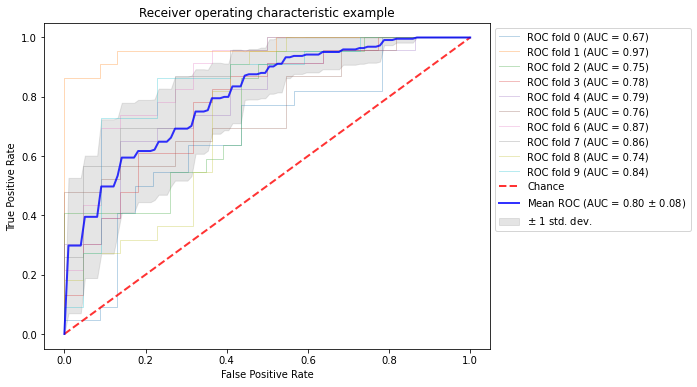

In [ ]:
show_auc_for_cv(heart_supplements_fitted_pipeline, 
                heart_supplements_X_overlap[heart_supplements_important_features], 
                heart_supplements_Y, n_splits=10)

In [ ]:
mean_weighted_f1(heart_supplements_fitted_pipeline, 
                 heart_supplements_X_overlap[heart_supplements_important_features], 
                 heart_supplements_Y, 
                 20, 
                 0.2)
mean_precision(heart_supplements_fitted_pipeline, 
                 heart_supplements_X_overlap[heart_supplements_important_features], 
                 heart_supplements_Y, 
                 20, 
                 0.2)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

Mean weighted f1:  0.8887427009163081  STD:  0.025154655325462287
Mean micro f1:  0.8888888888888887  STD:  0.025092421756969362


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

Mean precision for class 1:  0.8728301369209014  STD:  0.04568312963914492


Model: MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 20), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
Loading LIME feature importance retrieval model...


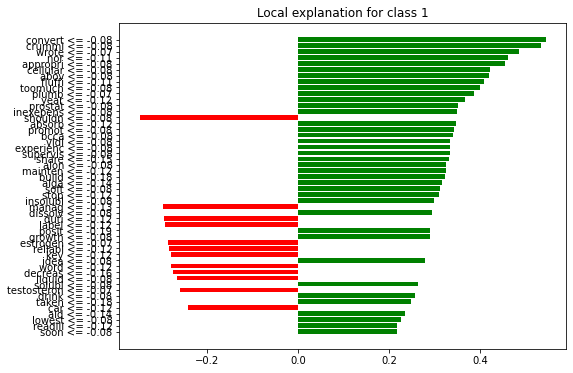

In [ ]:
proba_1, proba_0, clf = predict_proba_hist(heart_supplements_fitted_pipeline, 
                                      heart_supplements_X_overlap, 
                                      heart_supplements_Y, 
                                      heart_supplements_important_features)


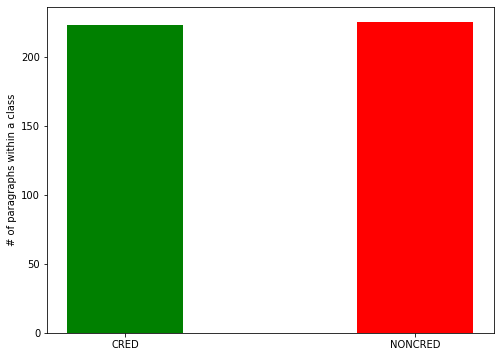

Counter({0: 223, 1: 225})

In [ ]:
heart_label_counter = Counter(heart_supplements_Y)
plt.bar(x=['CRED', 'NONCRED'], height=heart_label_counter.values(), width=0.4, color=['g', 'r'])
plt.ylabel('# of paragraphs within a class')
plt.show()
heart_label_counter

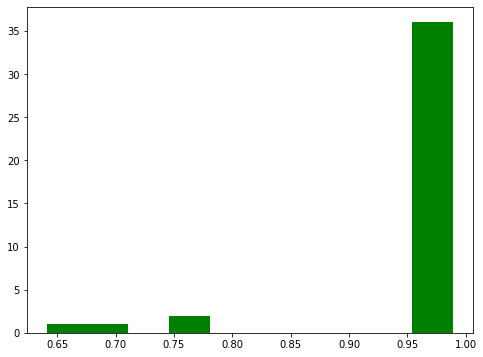

In [ ]:
plt.hist(proba_1.values(), bins=10, color='g')
plt.show()

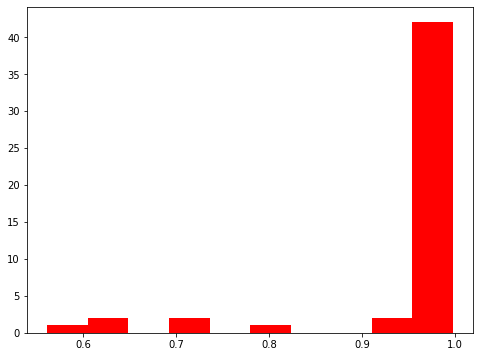

In [ ]:
plt.hist(proba_0.values(), bins=10, color='r')
plt.show()

### Non-overlapping paragraphs

In [ ]:
print(np.shape(heart_supplements_X))
print(np.shape(heart_supplements_Y_no))

(150, 1541)
(150,)


Running RFE to find the most supportive features
Optimal number of features according to RFE : 371


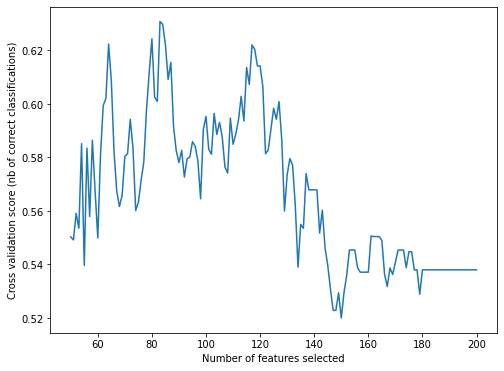

Number of features:  50
['Sixltr_liwc', 'quant_liwc', 'ingest_liwc', 'focuspast_liwc', 'work_liwc', 'OtherP_liwc', 'DATE_NER', 'acid', 'adequ', 'appear', 'at', 'been', 'car', 'cardiovascular', 'consum', 'coq', 'decreas', 'dens', 'drink', 'enzym', 'everi', 'fatti', 'fluffi', 'get', 'great', 'health', 'hospit', 'idea', 'import', 'mainten', 'measur', 'miner', 'own', 'place', 'play', 'polyunsatur', 'preciou', 'report', 'should', 'slow', 'small', 'substanc', 'taken', 'talk', 'the', 'them', 'transport', 'veget', 'way', 'polarity_sent']


In [ ]:
plt.rcParams["figure.figsize"] = (8, 6) # (w, h)
_, _, heart_supplements_important_features = get_important_features(heart_supplements_X, 
                                      heart_supplements_Y_no, 
                                      num_important_features=50)


Generation 1 - Current best internal CV score: 0.9400000000000001

Generation 2 - Current best internal CV score: 0.9400000000000001

Generation 3 - Current best internal CV score: 0.9400000000000001

Best pipeline: MLPClassifier(GradientBoostingClassifier(input_matrix), activation=logistic, hidden_layer_sizes=(30, 20), learning_rate=adaptive, max_iter=1000)


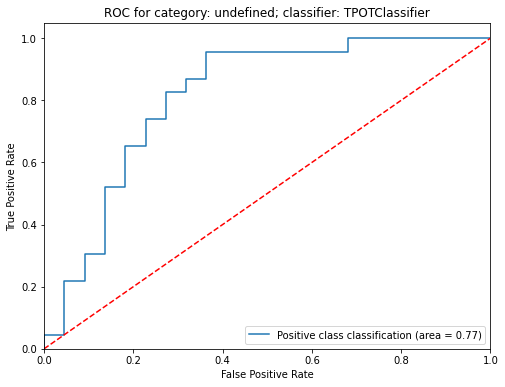

              precision    recall  f1-score   support

           0       0.88      0.64      0.74        22
           1       0.72      0.91      0.81        23

    accuracy                           0.78        45
   macro avg       0.80      0.77      0.77        45
weighted avg       0.80      0.78      0.77        45



In [ ]:
plt.rcParams["figure.figsize"] = (8, 6) # (w, h)

tpot_heart = teapot_optimizer(heart_supplements_X, 
                              heart_supplements_Y_no, 
                              important_features = heart_supplements_important_features,
                              VALIDATION_SPLIT=0.3)

In [ ]:
heart_supplements_fitted_pipeline = tpot_heart.fitted_pipeline_.steps[-1][1]

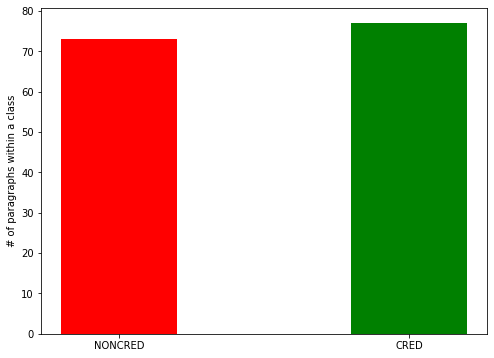

Counter({0: 73, 1: 77})

In [ ]:
heart_supplements_label_counter = Counter(heart_supplements_Y_no)
plt.bar(x=['NONCRED', 'CRED'], height=heart_supplements_label_counter.values(), width=0.4, color=['r', 'g'])
plt.ylabel('# of paragraphs within a class')
plt.show()
heart_supplements_label_counter

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

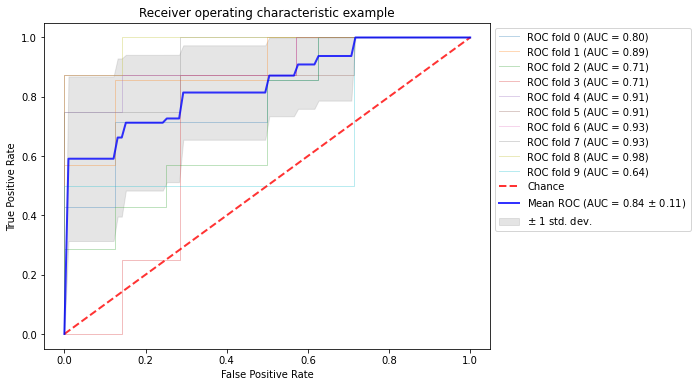

In [ ]:
show_auc_for_cv(heart_supplements_fitted_pipeline, 
                heart_supplements_X[heart_supplements_important_features], 
                heart_supplements_Y_no, n_splits=10)

In [ ]:
mean_weighted_f1(heart_supplements_fitted_pipeline, heart_supplements_X[heart_supplements_important_features], heart_supplements_Y_no, 20, 0.3)
mean_precision(heart_supplements_fitted_pipeline, heart_supplements_X[heart_supplements_important_features], heart_supplements_Y_no, 20, 0.3)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

Mean weighted f1:  0.7243337131716088  STD:  0.06754284215804354
Mean micro f1:  0.7255555555555555  STD:  0.0671372281778702


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

Mean precision for class 1:  0.7242341436762286  STD:  0.06185507004881442


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Model: MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 20), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
Loading LIME feature importance retrieval model...


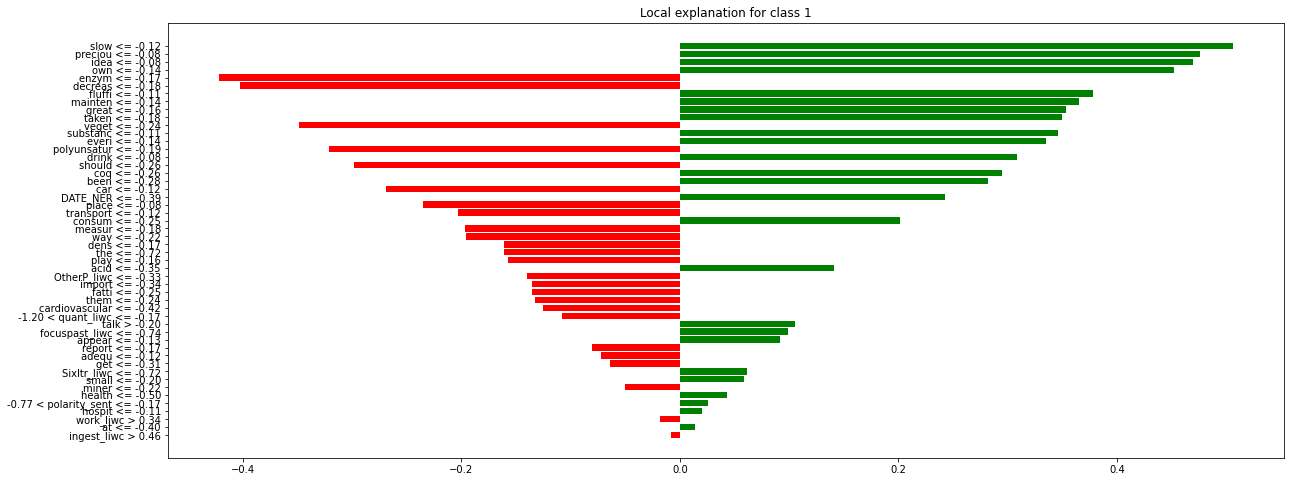

In [ ]:
plt.rcParams["figure.figsize"] = (20, 8) # (w, h)

proba_1, proba_0, clf = predict_proba_hist(heart_supplements_fitted_pipeline, 
                                      heart_supplements_X, 
                                      heart_supplements_Y_no, 
                                      heart_supplements_important_features)

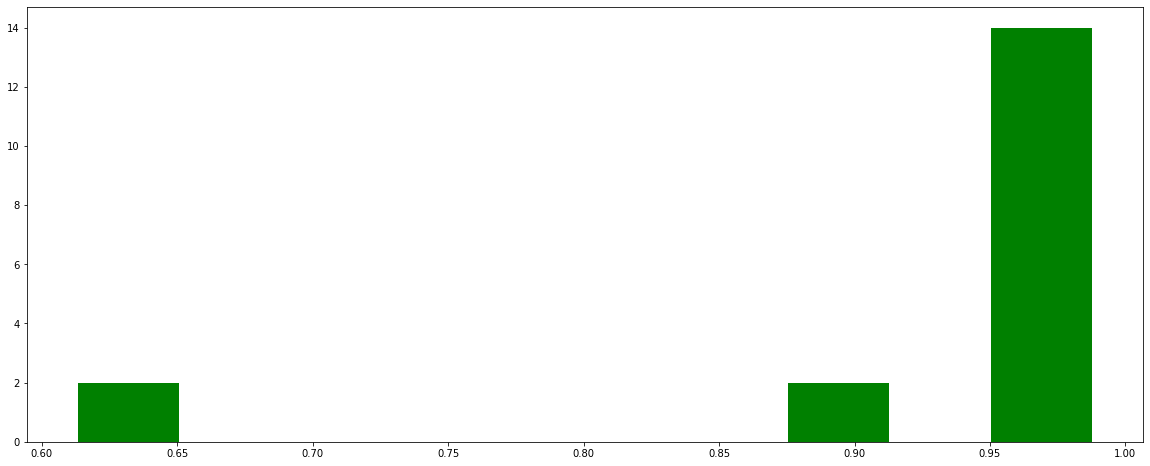

In [ ]:
plt.hist(proba_1.values(), bins=10, color='g')
plt.show()

## steroids for kids

### Overlapping paragraphs

In [ ]:
print(np.shape(steroids_for_kids_X_overlap))
print(np.shape(steroids_for_kids_Y))

(723, 1557)
(723,)


In [ ]:
723*0.3

216.9

Running RFE to find the most supportive features
Optimal number of features according to RFE : 367


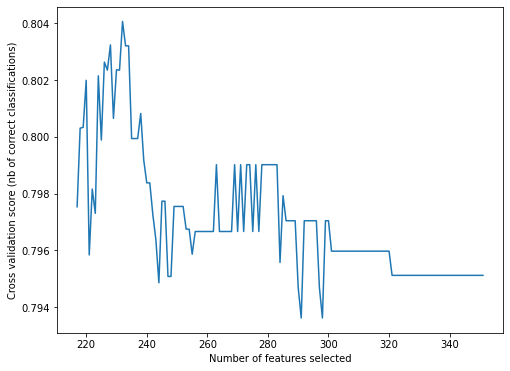

Number of features:  217
['we_liwc', 'article_liwc', 'negate_liwc', 'verb_liwc', 'compare_liwc', 'anger_liwc', 'friend_liwc', 'cause_liwc', 'ingest_liwc', 'affiliation_liwc', 'reward_liwc', 'motion_liwc', 'AllPunc_liwc', 'Comma_liwc', 'Dash_liwc', 'absorb', 'activ', 'actual', 'add', 'administ', 'adren', 'all', 'almost', 'alreadi', 'also', 'anim', 'antispasmod', 'approv', 'are', 'arteri', 'at', 'athlet', 'bacteria', 'bad', 'becaus', 'becom', 'begin', 'belli', 'bike', 'blood', 'bottom', 'call', 'can', 'caus', 'chanc', 'chang', 'chicken', 'children', 'chosen', 'clean', 'close', 'coincid', 'come', 'comfort', 'commun', 'complain', 'complet', 'congest', 'contamin', 'copd', 'coronari', 'cure', 'date', 'defens', 'determin', 'difficult', 'distant', 'dizzi', 'doctor', 'doe', 'dose', 'drink', 'eat', 'effect', 'effort', 'environ', 'epiglott', 'ever', 'everi', 'extrem', 'famili', 'fever', 'final', 'fluticason', 'for', 'form', 'four', 'fourth', 'from', 'full', 'futur', 'given', 'gland', 'gp', 'grow'

In [ ]:
plt.rcParams["figure.figsize"] = (8, 6) # (w, h)
_, _, steroids_for_kids_important_features = get_important_features(steroids_for_kids_X_overlap, 
                                      steroids_for_kids_Y, 
                                      num_important_features=217)


Generation 1 - Current best internal CV score: 0.8846319006071329

Generation 2 - Current best internal CV score: 0.8846319006071329

Generation 3 - Current best internal CV score: 0.8851065162907268

Best pipeline: MLPClassifier(CombineDFs(input_matrix, GradientBoostingClassifier(input_matrix)), activation=relu, hidden_layer_sizes=(50, 20), learning_rate=adaptive, max_iter=1000)


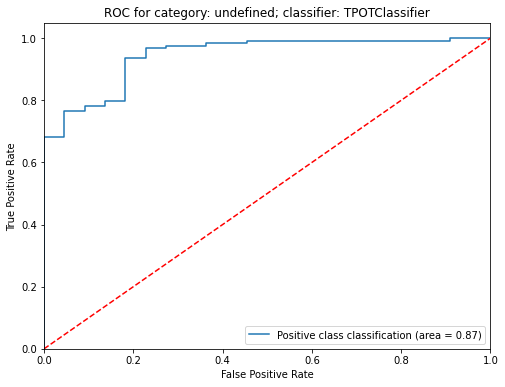

              precision    recall  f1-score   support

           0       0.67      0.82      0.73        22
           1       0.97      0.93      0.95       123

    accuracy                           0.91       145
   macro avg       0.82      0.87      0.84       145
weighted avg       0.92      0.91      0.91       145



In [ ]:
tpot_steroids = teapot_optimizer(steroids_for_kids_X_overlap, 
                                  steroids_for_kids_Y, 
                                  important_features = steroids_for_kids_important_features,
                                  VALIDATION_SPLIT=0.2)

# pickle.dump(tpot_steroids.fitted_pipeline_, open('/content/drive/My Drive/Colab Notebooks/steroids_for_kids_fitted_pipeline.p','wb'))

In [ ]:
# steroids_for_kids_important_features = ['WC', 'WPS', 'i', 'we', 'article', 'auxverb', 'negate', 'adj', 'compare', 'interrog', 'quant', 'anger', 'male', 'discrep', 'tentat', 'feel', 'affiliation', 'achieve', 'reward', 'focusfuture', 'motion', 'informal', 'assent', 'QMark', 'Exclam', 'Parenth', 'about', 'absorb', 'acut', 'administ', 'adren', 'adrenocort', 'affect', 'after', 'age', 'all', 'almost', 'alreadi', 'also', 'amount', 'and', 'anim', 'antibodi', 'antispasmod', 'appear', 'are', 'arrang', 'arteri', 'athlet', 'avoid', 'awar', 'bacteria', 'bad', 'becaus', 'becom', 'bed', 'begin', 'between', 'big', 'bike', 'bone', 'bottom', 'bronchial', 'bronchiti', 'bronchoconstrict', 'call', 'cardiologist', 'carri', 'case', 'center', 'chanc', 'chicken', 'chosen', 'chronic', 'clean', 'come', 'complain', 'conclud', 'condit', 'confound', 'congenit', 'contact', 'contamin', 'continu', 'coronari', 'corticosteroid', 'croup', 'cure', 'current', 'data', 'day', 'decis', 'deep', 'definit', 'deterior', 'develop', 'diastol', 'discomfort', 'diseas', 'distant', 'dizzi', 'doctor', 'doe', 'drink', 'eat', 'educ', 'effort', 'enabl', 'environ', 'ever', 'everi', 'exacerb', 'exercis', 'extrem', 'failur', 'famili', 'faster', 'fever', 'form', 'four', 'fourth', 'framingham', 'fre', 'function', 'futur', 'gland', 'glass', 'good', 'graviti', 'great', 'grown', 'hand', 'harm', 'he', 'headach', 'hear', 'heart', 'here', 'high', 'higher', 'hormon', 'howev', 'huge', 'hurt', 'hyperplasia', 'immedi', 'immin', 'import', 'improv', 'includ', 'increas', 'infant', 'infarct', 'inflammatori', 'insidi', 'intensifi', 'interest', 'jra', 'just', 'land', 'latest', 'level', 'life', 'liquid', 'live', 'local', 'lowest', 'made', 'make', 'marker', 'may', 'medic', 'medicin', 'member', 'met', 'might', 'more', 'much', 'mucu', 'myocardi', 'nephrot', 'no', 'nose', 'noth', 'nurs', 'often', 'onc', 'one', 'patholog', 'peac', 'percent', 'perform', 'pill', 'pleas', 'poland', 'portion', 'powder', 'pox', 'probabl', 'process', 'product', 'progress', 'proven', 'publish', 'purpos', 'quit', 'radar', 'rais', 'rare', 'rattl', 'rattli', 'read', 'realiz', 'recogn', 'recommend', 'reflux', 'reimburs', 'remiss', 'report', 'research', 'rest', 'revert', 'rheumatoid', 'ride', 'rule', 'said', 'save', 'season', 'secondli', 'sensat', 'sepsi', 'seriou', 'serv', 'shift', 'shorter', 'shot', 'sibl', 'sick', 'sleep', 'slow', 'smaller', 'smog', 'sometim', 'start', 'steroid', 'still', 'stuck', 'suck', 'sugar', 'support', 'supraglott', 'symptom', 'syrup', 'system', 'tablet', 'talk', 'temporari', 'tend', 'than', 'that', 'the', 'therapi', 'these', 'thicker', 'thinner', 'third', 'this', 'threat', 'thrombosi', 'through', 'tire', 'to', 'today', 'too', 'treat', 'turn', 'understand', 'unfortun', 'until', 'unwel', 'upper', 'us', 'venou', 'ventil', 'visit', 'wa', 'we', 'weight', 'were', 'what', 'which', 'wors', 'ye', 'yup', 'polarity']
# steroids_for_kids_pipeline = pickle.load(open('/content/drive/My Drive/Colab Notebooks/steroids_for_kids_fitted_pipeline.p','rb'))
# mean_weighted_f1(steroids_for_kids_pipeline, steroids_for_kids_X[steroids_for_kids_important_features], steroids_for_kids_Y, 30, 0.2)

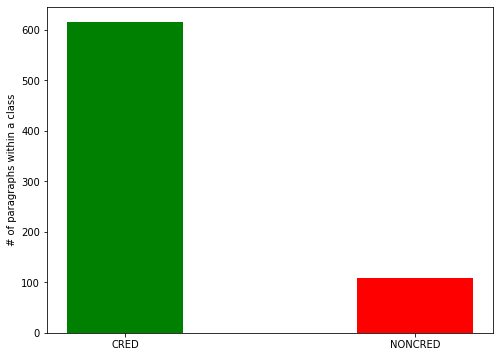

Counter({0: 108, 1: 615})

In [ ]:
steroids_for_kids_label_counter = Counter(steroids_for_kids_Y)
plt.bar(x=['CRED', 'NONCRED'], height=steroids_for_kids_label_counter.values(), width=0.4, color=['g', 'r'])
plt.ylabel('# of paragraphs within a class')
plt.show()
steroids_for_kids_label_counter

In [ ]:
steroids_for_kids_pipeline = tpot_steroids.fitted_pipeline_.steps[-1][1]

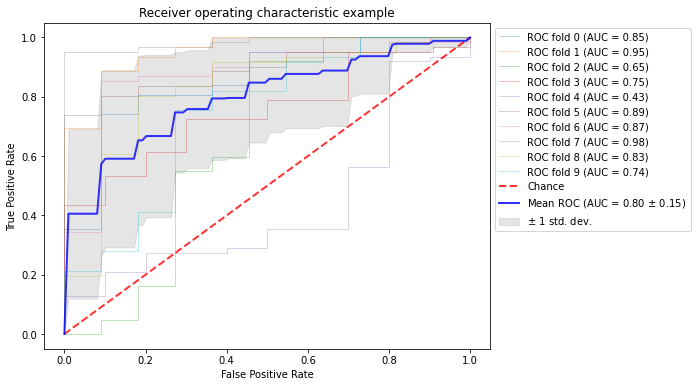

In [ ]:
show_auc_for_cv(steroids_for_kids_pipeline, 
                steroids_for_kids_X_overlap[steroids_for_kids_important_features], 
                steroids_for_kids_Y, 
                n_splits=10,
                split=0.2)

In [ ]:
mean_weighted_f1(steroids_for_kids_pipeline, 
                 steroids_for_kids_X_overlap[steroids_for_kids_important_features], 
                 steroids_for_kids_Y, 
                 20, 
                 0.2)
mean_precision(steroids_for_kids_pipeline, 
                 steroids_for_kids_X_overlap[steroids_for_kids_important_features], 
                 steroids_for_kids_Y, 
                 20, 
                 0.2)

Mean weighted f1:  0.9206995916775078  STD:  0.022677791088408762
Mean micro f1:  0.9265517241379309  STD:  0.018795475965395377
Mean precision for class 1:  0.9329455808020484  STD:  0.015155210036673734


Model: MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 20), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
Loading LIME feature importance retrieval model...


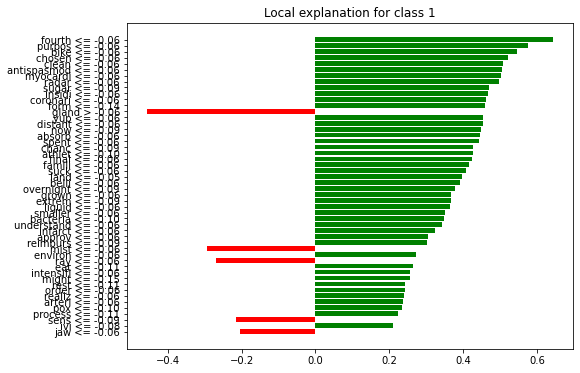

In [ ]:
proba_1, proba_0, clf = predict_proba_hist(steroids_for_kids_pipeline, 
                                      steroids_for_kids_X_overlap, 
                                      steroids_for_kids_Y, 
                                      steroids_for_kids_important_features,
                                      split=0.2)

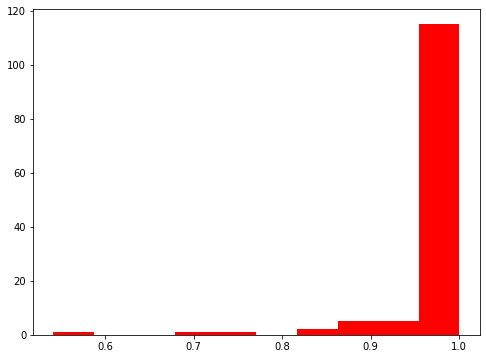

In [ ]:
plt.hist(proba_0.values(), bins=10, color='r')
plt.show()

### Non-overlapping paragraphs

In [ ]:
print(np.shape(steroids_for_kids_X))
print(np.shape(steroids_for_kids_Y_no))

(241, 1515)
(241,)


In [ ]:
241*0.3

72.3

Running RFE to find the most supportive features
Optimal number of features according to RFE : 295


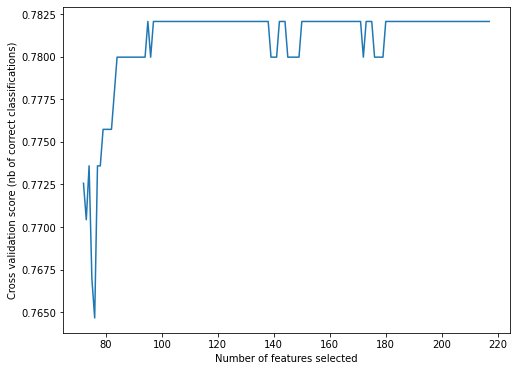

Number of features:  72
['we_liwc', 'adj_liwc', 'compare_liwc', 'affiliation_liwc', 'reward_liwc', 'informal_liwc', 'assent_liwc', 'Exclam_liwc', 'adren', 'almost', 'anim', 'antibodi', 'antispasmod', 'arrang', 'athlet', 'bacteria', 'bad', 'becaus', 'becom', 'bone', 'bronchoconstrict', 'chanc', 'chicken', 'chosen', 'come', 'complain', 'cure', 'dizzi', 'doe', 'drink', 'effort', 'ever', 'exercis', 'form', 'four', 'fourth', 'futur', 'gland', 'high', 'increas', 'insidi', 'intensifi', 'land', 'latest', 'marker', 'met', 'no', 'patholog', 'peac', 'perform', 'poland', 'pox', 'process', 'radar', 'rule', 'save', 'secondli', 'stuck', 'sugar', 'syrup', 'system', 'these', 'thinner', 'tire', 'today', 'too', 'understand', 'unfortun', 'unwel', 'ventil', 'we', 'ye']


In [ ]:
plt.rcParams["figure.figsize"] = (8, 6) # (w, h)
_, _, steroids_for_kids_important_features = get_important_features(steroids_for_kids_X, 
                                      steroids_for_kids_Y_no, 
                                      num_important_features=72)


Generation 1 - Current best internal CV score: 0.9311111111111112

Generation 2 - Current best internal CV score: 0.96

Generation 3 - Current best internal CV score: 0.96

Best pipeline: MLPClassifier(CombineDFs(input_matrix, input_matrix), activation=logistic, hidden_layer_sizes=(50, 20), learning_rate=adaptive, max_iter=1000)


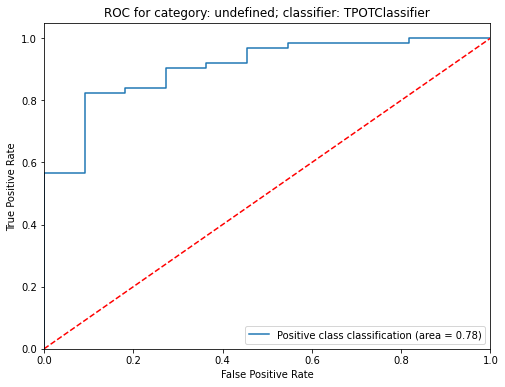

              precision    recall  f1-score   support

           0       0.58      0.64      0.61        11
           1       0.93      0.92      0.93        62

    accuracy                           0.88        73
   macro avg       0.76      0.78      0.77        73
weighted avg       0.88      0.88      0.88        73



In [ ]:
tpot_steroids = teapot_optimizer(steroids_for_kids_X, 
                                  steroids_for_kids_Y_no, 
                                  important_features = steroids_for_kids_important_features,
                                  VALIDATION_SPLIT=0.3)

# pickle.dump(tpot_steroids.fitted_pipeline_, open('/content/drive/My Drive/Colab Notebooks/steroids_for_kids_fitted_pipeline.p','wb'))

In [ ]:
steroids_for_kids_pipeline = tpot_steroids.fitted_pipeline_.steps[-1][1]

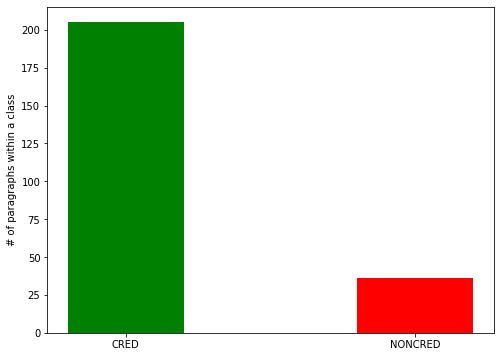

Counter({0: 36, 1: 205})

In [ ]:
steroids_for_kids_label_counter = Counter(steroids_for_kids_Y_no)
plt.bar(x=['CRED', 'NONCRED'], height=steroids_for_kids_label_counter.values(), width=0.4, color=['g', 'r'])
plt.ylabel('# of paragraphs within a class')
plt.show()
steroids_for_kids_label_counter

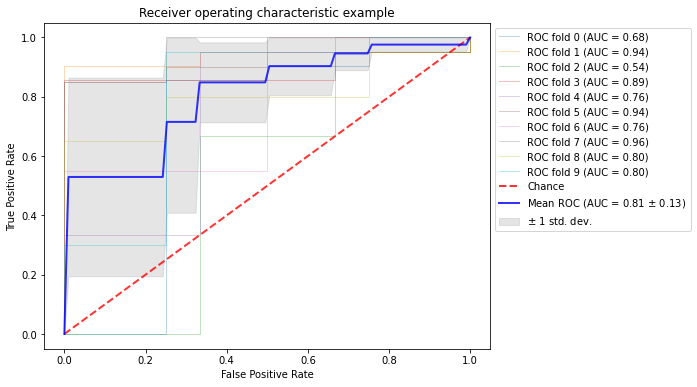

In [ ]:
show_auc_for_cv(steroids_for_kids_pipeline, 
                steroids_for_kids_X[steroids_for_kids_important_features], 
                steroids_for_kids_Y_no, 
                n_splits=10,
                split=0.3)

In [ ]:
mean_weighted_f1(steroids_for_kids_pipeline, 
                 steroids_for_kids_X[steroids_for_kids_important_features], 
                 steroids_for_kids_Y_no, 
                 20, 
                 0.2)
mean_precision(steroids_for_kids_pipeline, 
                 steroids_for_kids_X[steroids_for_kids_important_features], 
                 steroids_for_kids_Y_no, 
                 20, 
                 0.2)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

Mean weighted f1:  0.8405363998398503  STD:  0.030966887574894502
Mean micro f1:  0.8683673469387754  STD:  0.02619489316937434


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

Mean precision for class 1:  0.8779717311545481  STD:  0.01409313271528764


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Model: MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 20), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
Loading LIME feature importance retrieval model...


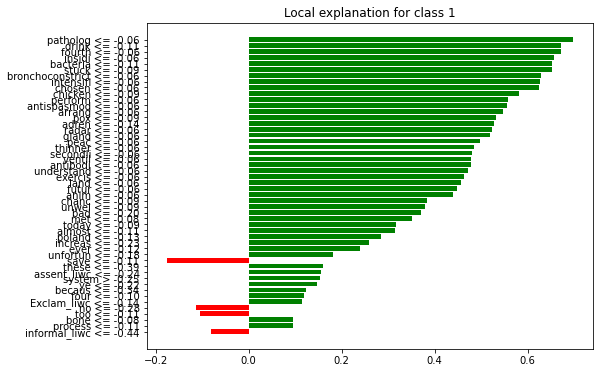

In [ ]:
proba_1, proba_0, clf = predict_proba_hist(steroids_for_kids_pipeline, 
                                      steroids_for_kids_X, 
                                      steroids_for_kids_Y_no, 
                                      steroids_for_kids_important_features,
                                      split=0.3)

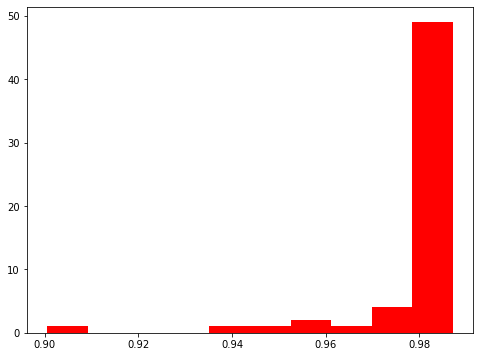

In [ ]:
plt.hist(proba_0.values(), bins=10, color='r')
plt.show()

## children antibiotics

### Overlapping paragraphs

In [ ]:
print(np.shape(children_antibiotics_X_overlap))
print(np.shape(children_antibiotics_Y))

(554, 1715)
(554,)


In [ ]:
554*0.3

166.2

Running RFE to find the most supportive features
Optimal number of features according to RFE : 166


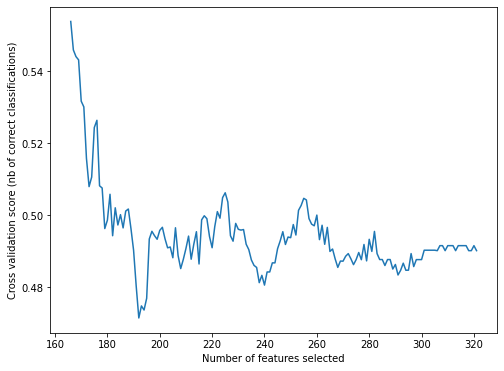

Number of features:  166
['WC_liwc', 'Authentic_liwc', 'WPS_liwc', 'article_liwc', 'adverb_liwc', 'negemo_liwc', 'insight_liwc', 'cause_liwc', 'certain_liwc', 'differ_liwc', 'reward_liwc', 'focuspast_liwc', 'assent_liwc', 'Period_liwc', 'Exclam_liwc', 'aap', 'absorpt', 'act', 'actual', 'add', 'affect', 'all', 'allevi', 'alli', 'alter', 'an', 'antibiot', 'ask', 'away', 'bacteria', 'been', 'behavior', 'best', 'between', 'bladder', 'brain', 'bring', 'but', 'certain', 'child', 'clinic', 'cold', 'cost', 'diaper', 'differ', 'discrimin', 'disord', 'doctor', 'doe', 'don', 'dose', 'effici', 'els', 'everyon', 'exert', 'explain', 'expos', 'extract', 'fact', 'fahrenheit', 'fever', 'few', 'fight', 'first', 'fluoroquinolon', 'get', 'give', 'group', 'guidelin', 'harm', 'heal', 'high', 'higher', 'hour', 'how', 'if', 'incid', 'indispens', 'instead', 'interfer', 'known', 'lead', 'leaf', 'licens', 'link', 'lower', 'main', 'manag', 'mayo', 'might', 'minut', 'move', 'need', 'next', 'nickel', 'now', 'nutrie

In [ ]:
plt.rcParams["figure.figsize"] = (8, 6) # (w, h)
_, _, children_antibiotics_important_features = get_important_features(children_antibiotics_X_overlap, 
                                      children_antibiotics_Y, 
                                      num_important_features=166)


Generation 1 - Current best internal CV score: 0.8124098124098124

Generation 2 - Current best internal CV score: 0.8124098124098124

Generation 3 - Current best internal CV score: 0.8124098124098124

Best pipeline: MLPClassifier(input_matrix, activation=relu, hidden_layer_sizes=(30, 20), learning_rate=adaptive, max_iter=1000)


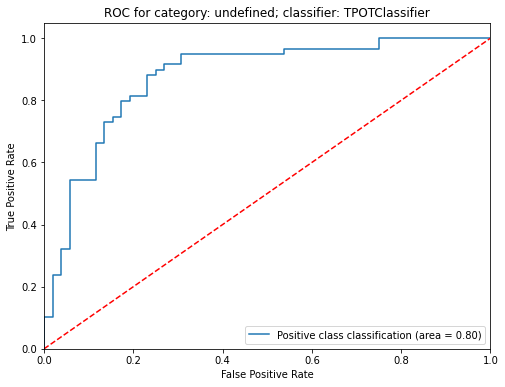

              precision    recall  f1-score   support

           0       0.80      0.77      0.78        52
           1       0.80      0.83      0.82        59

    accuracy                           0.80       111
   macro avg       0.80      0.80      0.80       111
weighted avg       0.80      0.80      0.80       111



In [ ]:
tpot_antibiotics = teapot_optimizer(children_antibiotics_X_overlap, 
                                    children_antibiotics_Y, 
                                    important_features=children_antibiotics_important_features,
                                    VALIDATION_SPLIT=0.2)
# pickle.dump(tpot_antibiotics.fitted_pipeline_, open('/content/drive/My Drive/Colab Notebooks/antibiotics_fitted_pipeline.p','wb'))

In [ ]:
children_antibiotics_pipeline = tpot_antibiotics.fitted_pipeline_.steps[-1][1]

In [ ]:
# children_antibiotics_important_features = ['Sixltr', 'female', 'male', 'certain', 'assent', 'GPE', 'all', 'answer', 'antibiot', 'antibiotics', 'ask', 'at', 'bacteria', 'behavior', 'beverag', 'case', 'caus', 'cdc', 'certain', 'digest', 'discoveri', 'disord', 'exact', 'exampl', 'fact', 'fever', 'fluid', 'for', 'half', 'hand', 'happen', 'heal', 'hi', 'high', 'higher', 'import', 'increas', 'lead', 'media', 'natur', 'neg', 'no', 'oil', 'organ', 'ototox', 'problem', 'process', 'provid', 'quickli', 'rash', 'say', 'sign', 'simpli', 'some', 'specif', 'swell', 'syndrom', 'tantrum', 'thi', 'too', 'treatment', 'vitamin', 'within', 'year', 'you', 'young']
# children_antibiotics_pipeline = pickle.load(open('/content/drive/My Drive/Colab Notebooks/antibiotics_fitted_pipeline.p','rb'))
# mean_weighted_f1(children_antibiotics_pipeline, children_antibiotics_X[children_antibiotics_important_features], children_antibiotics_Y, 10, 0.3)

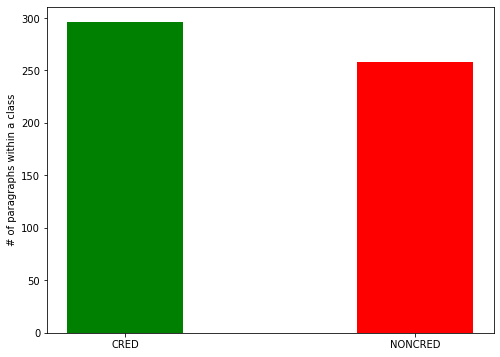

Counter({0: 258, 1: 296})

In [ ]:
children_antibiotics_label_counter = Counter(children_antibiotics_Y)
plt.bar(x=['CRED', 'NONCRED'], height=children_antibiotics_label_counter.values(), width=0.4, color=['g', 'r'])
plt.ylabel('# of paragraphs within a class')
plt.show()
children_antibiotics_label_counter

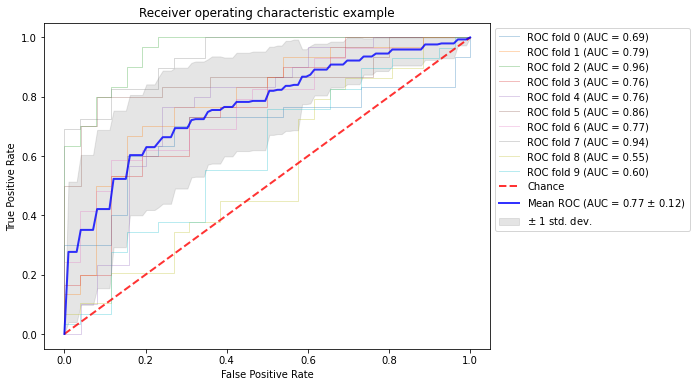

In [ ]:
show_auc_for_cv(children_antibiotics_pipeline, 
                children_antibiotics_X_overlap[children_antibiotics_important_features], 
                children_antibiotics_Y, 
                n_splits=10,
                split=0.2)

In [ ]:
mean_weighted_f1(children_antibiotics_pipeline, 
                 children_antibiotics_X_overlap[children_antibiotics_important_features], 
                 children_antibiotics_Y, 
                 20, 
                 0.2)
mean_precision(children_antibiotics_pipeline, 
                 children_antibiotics_X_overlap[children_antibiotics_important_features], 
                 children_antibiotics_Y, 
                 20, 
                 0.2)

Mean weighted f1:  0.8232492446707116  STD:  0.03034401135597773
Mean micro f1:  0.8238738738738739  STD:  0.030347793266128787
Mean precision for class 1:  0.8236209465631905  STD:  0.038797571476971826


Model: MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 20), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
Loading LIME feature importance retrieval model...


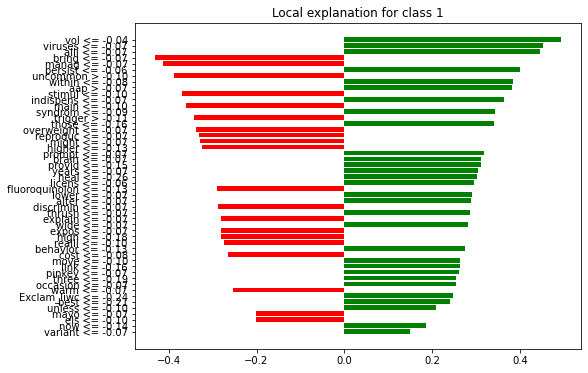

In [ ]:
proba_1, proba_0, clf = predict_proba_hist(children_antibiotics_pipeline, 
                                      children_antibiotics_X_overlap, 
                                      children_antibiotics_Y, 
                                      children_antibiotics_important_features,
                                      split=0.2)

### Non-overlapping paragraphs

In [ ]:
print(np.shape(children_antibiotics_X))
print(np.shape(children_antibiotics_Y_no))

(185, 1677)
(185,)


In [ ]:
185*0.3

55.5

Running RFE to find the most supportive features
Optimal number of features according to RFE : 187


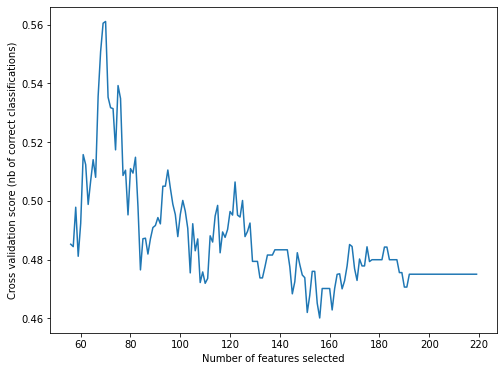

Number of features:  56
['Sixltr_liwc', 'certain_liwc', 'about', 'absolut', 'accord', 'all', 'answer', 'antibiot', 'ask', 'at', 'bacteri', 'bacteria', 'behavior', 'bring', 'but', 'case', 'caus', 'cdc', 'child', 'combat', 'diaper', 'disord', 'dose', 'down', 'expos', 'fact', 'fever', 'four', 'get', 'give', 'hang', 'heal', 'immun', 'import', 'infant', 'natur', 'oil', 'old', 'pinkey', 'previou', 'quickli', 'recogn', 'reliev', 'sign', 'specif', 'sum', 'sure', 'syndrom', 'thrush', 'topic', 'toxic', 'treatment', 'wait', 'whi', 'within', 'wors']


In [ ]:
plt.rcParams["figure.figsize"] = (8, 6) # (w, h)
_, _, children_antibiotics_important_features = get_important_features(children_antibiotics_X, 
                                      children_antibiotics_Y_no, 
                                      num_important_features=56)


Generation 1 - Current best internal CV score: 0.7052380952380952

Generation 2 - Current best internal CV score: 0.7052380952380952

Generation 3 - Current best internal CV score: 0.7052380952380952

Best pipeline: MLPClassifier(GradientBoostingClassifier(input_matrix), activation=logistic, hidden_layer_sizes=(30, 20), learning_rate=adaptive, max_iter=1000)


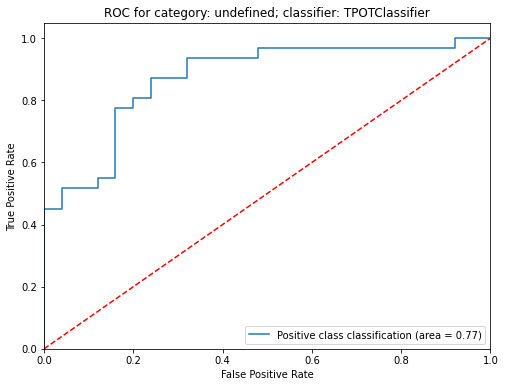

              precision    recall  f1-score   support

           0       0.88      0.60      0.71        25
           1       0.74      0.94      0.83        31

    accuracy                           0.79        56
   macro avg       0.81      0.77      0.77        56
weighted avg       0.81      0.79      0.78        56



In [ ]:
tpot_antibiotics = teapot_optimizer(children_antibiotics_X, 
                                    children_antibiotics_Y_no, 
                                    important_features=children_antibiotics_important_features,
                                    VALIDATION_SPLIT=0.3)
# pickle.dump(tpot_antibiotics.fitted_pipeline_, open('/content/drive/My Drive/Colab Notebooks/antibiotics_fitted_pipeline.p','wb'))

In [ ]:
children_antibiotics_pipeline = tpot_antibiotics.fitted_pipeline_.steps[-1][1]

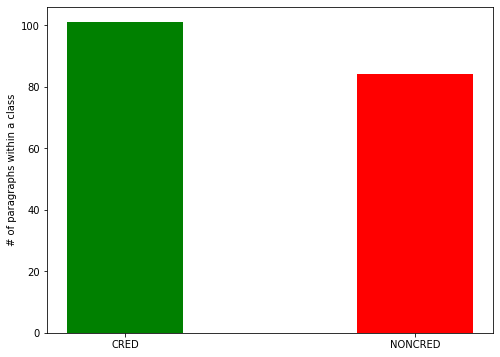

Counter({0: 84, 1: 101})

In [ ]:
children_antibiotics_label_counter = Counter(children_antibiotics_Y_no)
plt.bar(x=['CRED', 'NONCRED'], height=children_antibiotics_label_counter.values(), width=0.4, color=['g', 'r'])
plt.ylabel('# of paragraphs within a class')
plt.show()
children_antibiotics_label_counter

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


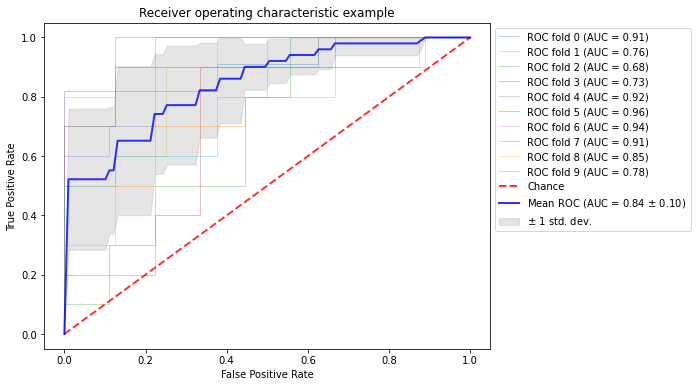

In [ ]:
show_auc_for_cv(children_antibiotics_pipeline, 
                children_antibiotics_X[children_antibiotics_important_features], 
                children_antibiotics_Y_no, 
                n_splits=10,
                split=0.3)

In [ ]:
mean_weighted_f1(children_antibiotics_pipeline, 
                 children_antibiotics_X[children_antibiotics_important_features], 
                 children_antibiotics_Y_no, 
                 10, 
                 0.3)
mean_precision(children_antibiotics_pipeline, 
                 children_antibiotics_X[children_antibiotics_important_features], 
                 children_antibiotics_Y_no, 
                 10, 
                 0.3)

Mean weighted f1:  0.8073126846211546  STD:  0.032687114986107824
Mean micro f1:  0.8083832335329341  STD:  0.03202333402903217


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Mean precision for class 1:  0.7871956774985345  STD:  0.03217421862781462


Model: MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 20), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
Loading LIME feature importance retrieval model...


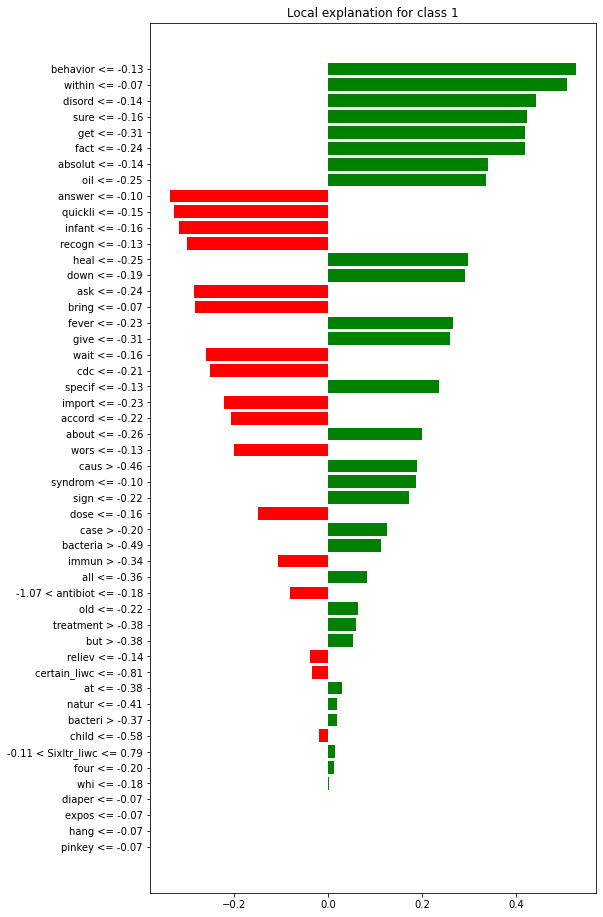

In [ ]:
plt.rcParams["figure.figsize"] = (8, 16) # (w, h)

proba_1, proba_0, clf = predict_proba_hist(children_antibiotics_pipeline, 
                                      children_antibiotics_X, 
                                      children_antibiotics_Y_no, 
                                      children_antibiotics_important_features,
                                      split=0.3)

## cc_vs_nb

### Overapping paragraphs

Category too small to test classifiers on non-overlapping paragraphs

In [ ]:
np.shape(cc_vs_nb_X_overlap)

(512, 1706)

In [ ]:
512*0.3

153.6

Running RFE to find the most supportive features
Optimal number of features according to RFE : 566


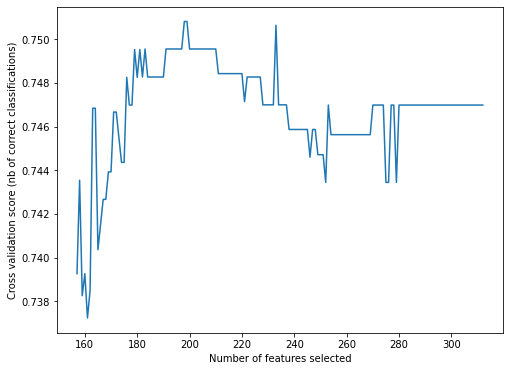

Number of features:  157
['Tone_liwc', 'i_liwc', 'posemo_liwc', 'family_liwc', 'power_liwc', 'home_liwc', 'assent_liwc', 'Quote_liwc', 'TIME_NER', 'about', 'actual', 'advanc', 'advic', 'against', 'aim', 'alter', 'alway', 'arbitrari', 'awar', 'babi', 'bad', 'balanc', 'bbc', 'be', 'befor', 'bias', 'bowel', 'breach', 'but', 'care', 'catheter', 'cesarean', 'chanc', 'chest', 'clutch', 'co', 'compani', 'consid', 'constip', 'cutoff', 'date', 'day', 'debat', 'deni', 'derbyshir', 'diagnosi', 'discomfort', 'do', 'doesn', 'don', 'drip', 'eas', 'expect', 'expert', 'februari', 'fever', 'follow', 'footbal', 'gassi', 'gruel', 'had', 'happen', 'health', 'heavi', 'here', 'high', 'home', 'how', 'hurt', 'injuri', 'into', 'investig', 'isn', 'kept', 'kozhimannil', 'law', 'length', 'like', 'look', 'maintain', 'march', 'me', 'mention', 'microbi', 'middl', 'midwif', 'miss', 'mums', 'nervou', 'no', 'off', 'ok', 'okay', 'organ', 'out', 'pain', 'patient', 'pee', 'pelvic', 'physician', 'play', 'pleas', 'plo', 'po

In [ ]:
plt.rcParams["figure.figsize"] = (8, 6) # (w, h)
_, _, cc_vs_nb_important_features = get_important_features(cc_vs_nb_X_overlap, 
                                      cc_vs_nb_Y, 
                                      num_important_features=157)


Generation 1 - Current best internal CV score: 0.8864918414918413

Generation 2 - Current best internal CV score: 0.8943356643356644

Generation 3 - Current best internal CV score: 0.8943356643356644

Best pipeline: MLPClassifier(CombineDFs(input_matrix, input_matrix), activation=relu, hidden_layer_sizes=(50, 20), learning_rate=adaptive, max_iter=1000)


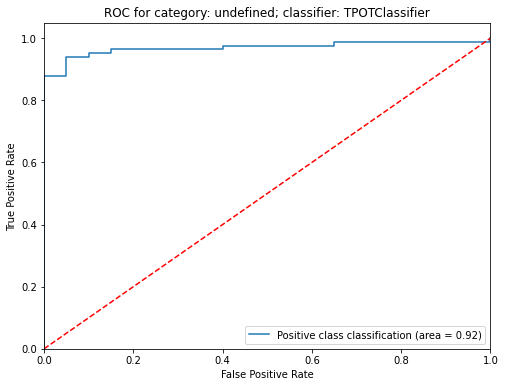

              precision    recall  f1-score   support

           0       0.68      0.95      0.79        20
           1       0.99      0.89      0.94        83

    accuracy                           0.90       103
   macro avg       0.83      0.92      0.86       103
weighted avg       0.93      0.90      0.91       103



In [ ]:
tpot_cc_nb = teapot_optimizer(cc_vs_nb_X_overlap, 
                              cc_vs_nb_Y, 
                              important_features=cc_vs_nb_important_features,
                              VALIDATION_SPLIT=0.2)
# pickle.dump(tpot_cc_nb.fitted_pipeline_, open('/content/drive/My Drive/Colab Notebooks/cc_vs_nb_fitted_pipeline.p','wb'))

In [ ]:
cc_vs_nb_pipeline = tpot_cc_nb.fitted_pipeline_.steps[-1][1]

In [ ]:
# cc_vs_nb_important_features = ['Analytic', 'Clout', 'Sixltr', 'pronoun', 'ppron', 'i', 'you', 'prep', 'adverb', 'negate', 'adj', 'anger', 'social', 'family', 'friend', 'health', 'affiliation', 'reward', 'leisure', 'home', 'informal', 'assent', 'nonflu', 'Colon', 'Quote', 'Parenth', 'CARDINAL', 'NORP', 'TIME', 'MONEY', 'abdomin', 'abl', 'account', 'across', 'actual', 'advanc', 'advantag', 'advertis', 'advic', 'against', 'aggress', 'ago', 'aim', 'alarm', 'alex', 'allevi', 'along', 'alter', 'alway', 'appli', 'appropri', 'arbitrari', 'are', 'argu', 'around', 'at', 'avoid', 'babi', 'bacteria', 'bad', 'bbc', 'be', 'befor', 'begin', 'born', 'breach', 'break', 'breastfeed', 'breath', 'bryant', 'by', 'caesarian', 'calcul', 'california', 'call', 'calm', 'can', 'care', 'categoris', 'catheter', 'caution', 'cent', 'chang', 'chest', 'children', 'chilli', 'chose', 'circumst', 'cite', 'co', 'compon', 'confus', 'consent', 'consid', 'content', 'continu', 'cost', 'counsel', 'coupl', 'cutoff', 'data', 'date', 'daughter', 'david', 'day', 'deal', 'debat', 'deem', 'deliveri', 'deni', 'depress', 'depth', 'derbyshir', 'determin', 'devic', 'diagnosi', 'did', 'diego', 'disadvantag', 'disappoint', 'discharg', 'discuss', 'doe', 'doesn', 'don', 'done', 'down', 'downsid', 'drip', 'drive', 'dysfunct', 'earli', 'easiest', 'either', 'elect', 'elev', 'emerg', 'emot', 'end', 'ensur', 'excruci', 'expect', 'factor', 'far', 'faster', 'februari', 'felt', 'fever', 'fix', 'flat', 'forese', 'foul', 'from', 'fulli', 'futur', 'game', 'genit', 'georg', 'get', 'got', 'graphic', 'groggi', 'guess', 'gyn', 'gynaecologist', 'gynecolog', 'ha', 'had', 'hadn', 'haemorrhoid', 'hand', 'happen', 'have', 'hayn', 'he', 'heads', 'health', 'heart', 'heath', 'heavi', 'high', 'hinder', 'hiv', 'hold', 'home', 'hospit', 'hour', 'how', 'howev', 'human', 'hurt', 'idea', 'if', 'illustr', 'imagin', 'implic', 'in', 'inder', 'india', 'infecti', 'insur', 'interest', 'intricaci', 'investig', 'involv', 'isn', 'issu', 'itchi', 'kati', 'kept', 'knight', 'kozhimannil', 'labor', 'later', 'lawsuit', 'left', 'leg', 'lesser', 'let', 'level', 'lie', 'life', 'lift', 'like', 'limit', 'line', 'll', 'look', 'lower', 'magic', 'maintain', 'major', 'march', 'massachusett', 'me', 'mean', 'meaning', 'media', 'middl', 'midwif', 'might', 'milsom', 'mindset', 'minnesota', 'molina', 'money', 'more', 'most', 'movement', 'mums', 'must', 'my', 'nadin', 'necessari', 'neglig', 'neonat', 'nine', 'no', 'normal', 'not', 'nurs', 'ob', 'off', 'ok', 'okay', 'one', 'onlin', 'oper', 'out', 'overal', 'overus', 'particular', 'pattern', 'pee', 'pelvic', 'peopl', 'per', 'permeat', 'plan', 'plateau', 'playback', 'pleas', 'poop', 'pose', 'posit', 'postpartum', 'practice', 'prefer', 'pregnant', 'present', 'previou', 'price', 'programm', 'prolaps', 'prospect', 'prove', 'provid', 'pu', 'push', 'put', 'question', 're', 'reassur', 'reassuring', 'recommend', 'recov', 'red', 'reduc', 'reject', 'relat', 'remov', 'requir', 'research', 'review', 'right', 'riski', 'rob', 'royal', 'ruptur', 'safe', 'safer', 'said', 'same', 'san', 'scan', 'scare', 'school', 'secret', 'section', 'sens', 'sex', 'sexual', 'sick', 'sign', 'significantli', 'similarli', 'simpl', 'simplex', 'sinc', 'six', 'size', 'sizelarg', 'sizeregular', 'skin', 'small', 'smel', 'someth', 'son', 'speak', 'state', 'stay', 'stomach', 'strep', 'stuck', 'substitut', 'suddenli', 'suppos', 'suprem', 'swell', 'take', 'team', 'tear', 'text', 'that', 'the', 'therapi', 'these', 'thing', 'think', 'thoma', 'thought', 'through', 'tire', 'told', 'took', 'top', 'tough', 'tri', 'trial', 'troubl', 'tummi', 'twin', 'twist', 'typic', 'uk', 'uncompl', 'understand', 'unit', 'unsuccess', 'unsupport', 'until', 'up', 'urin', 'use', 'uteru', 'vagina', 've', 'victoria', 'viru', 'walk', 'want', 'ward', 'warmth', 'washington', 'wasn', 'watch', 'weigh', 'weiser', 'what', 'where', 'which', 'who', 'wife', 'window', 'with', 'without', 'wo', 'womb', 'women', 'won', 'worri', 'wors', 'wound', 'ye', 'yet', 'you', 'yourself', 'zero', 'polarity']
# cc_vs_nb_pipeline = pickle.load(open('/content/drive/My Drive/Colab Notebooks/cc_vs_nb_fitted_pipeline.p','rb'))
# mean_weighted_f1(cc_vs_nb_pipeline, cc_vs_nb_X[cc_vs_nb_important_features], cc_vs_nb_Y, 30, 0.3)

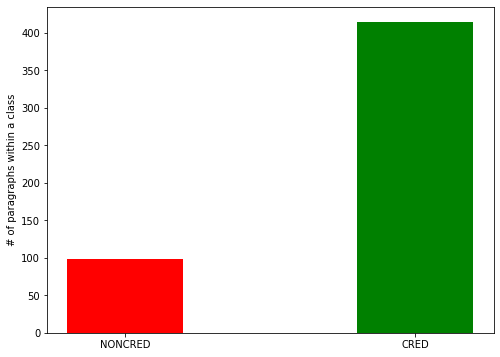

Counter({0: 98, 1: 414})

In [ ]:
cc_vs_nb_label_counter = Counter(cc_vs_nb_Y)
plt.bar(x=['NONCRED', 'CRED'], height=cc_vs_nb_label_counter.values(), width=0.4, color=['r', 'g'])
plt.ylabel('# of paragraphs within a class')
plt.show()
cc_vs_nb_label_counter

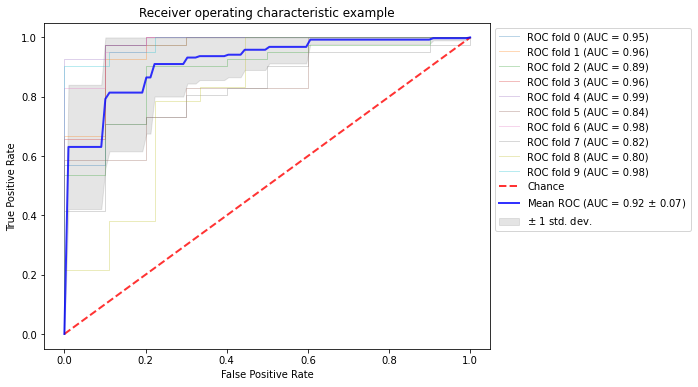

In [ ]:
show_auc_for_cv(cc_vs_nb_pipeline, 
                cc_vs_nb_X_overlap[cc_vs_nb_important_features], 
                cc_vs_nb_Y, 
                n_splits=10,
                split=0.2)

In [ ]:
mean_weighted_f1(cc_vs_nb_pipeline, 
                 cc_vs_nb_X_overlap[cc_vs_nb_important_features], 
                 cc_vs_nb_Y, 
                 20, 
                 0.2)
mean_precision(cc_vs_nb_pipeline, 
                 cc_vs_nb_X_overlap[cc_vs_nb_important_features], 
                 cc_vs_nb_Y, 
                 20, 
                 0.2)

Mean weighted f1:  0.8949240016494757  STD:  0.03778390755956022
Mean micro f1:  0.9024271844660194  STD:  0.03123061185721717
Mean precision for class 1:  0.9222969327936175  STD:  0.030892477632175414


Model: MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 20), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
Loading LIME feature importance retrieval model...


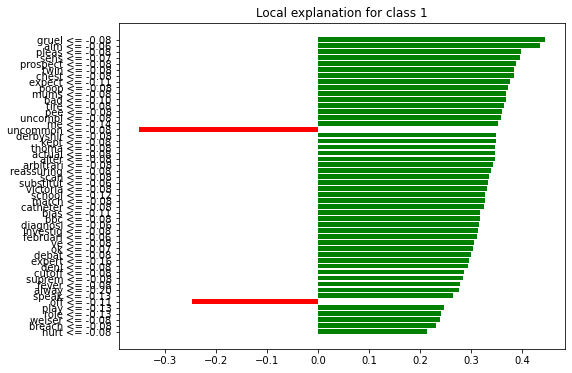

In [ ]:
proba_1, proba_0, clf = predict_proba_hist(cc_vs_nb_pipeline, 
                                      cc_vs_nb_X_overlap, 
                                      cc_vs_nb_Y, 
                                      cc_vs_nb_important_features,
                                      split=0.2)

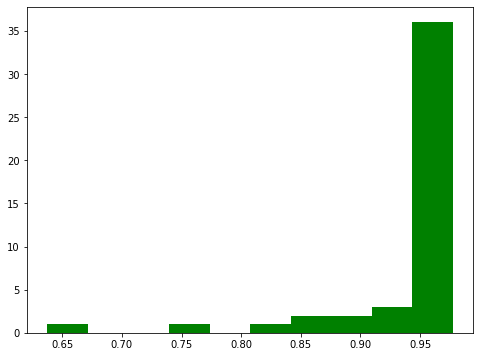

In [ ]:
plt.hist(proba_0.values(), bins=10, color='g')
plt.show()

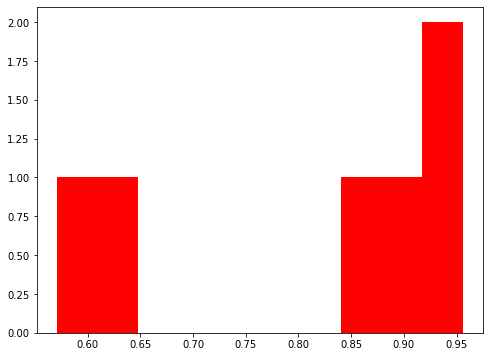

In [ ]:
plt.hist(proba_1.values(), bins=10, color='r')
plt.show()

###  Non-overlapping paragraphs

In [ ]:
print(np.shape(cc_vs_nb_Y_no))
np.shape(cc_vs_nb_X)

(171,)


(171, 1619)

In [ ]:
171*0.3

51.3

Running RFE to find the most supportive features
Optimal number of features according to RFE : 429


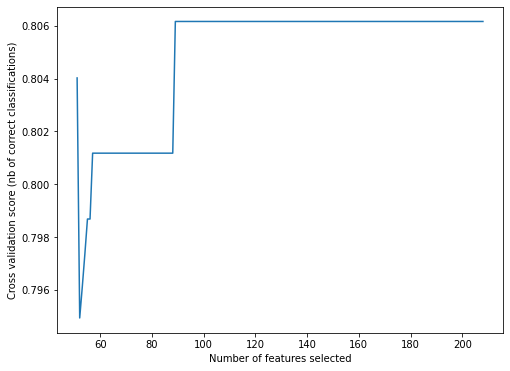

Number of features:  51
['negate_liwc', 'assent_liwc', 'alway', 'bad', 'befor', 'catheter', 'date', 'doesn', 'down', 'expect', 'genit', 'had', 'happen', 'heads', 'home', 'how', 'issu', 'itchi', 'kept', 'lower', 'maintain', 'mean', 'might', 'must', 'necessari', 'no', 'normal', 'not', 'prospect', 'red', 'reduc', 'requir', 'sick', 'sign', 'speak', 'stay', 'suppos', 'swell', 'text', 'these', 'thing', 'troubl', 'twin', 'twist', 'uncompl', 'understand', 'unsuccess', 'vagina', 'womb', 'won', 'wound']


In [ ]:
plt.rcParams["figure.figsize"] = (8, 6) # (w, h)
_, _, cc_vs_nb_important_features = get_important_features(cc_vs_nb_X, 
                                      cc_vs_nb_Y_no, 
                                      num_important_features=51,
                                      scorer='precision')


Generation 1 - Current best internal CV score: 0.95

Generation 2 - Current best internal CV score: 0.95

Generation 3 - Current best internal CV score: 0.95

Best pipeline: MLPClassifier(CombineDFs(input_matrix, input_matrix), activation=relu, hidden_layer_sizes=(50, 20), learning_rate=adaptive, max_iter=1000)


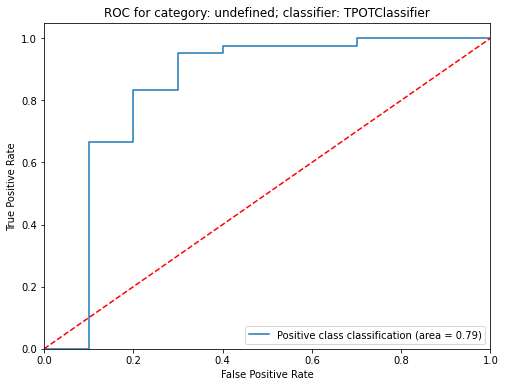

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.91      0.98      0.94        42

    accuracy                           0.90        52
   macro avg       0.88      0.79      0.82        52
weighted avg       0.90      0.90      0.90        52



In [ ]:
tpot_cc_nb = teapot_optimizer(cc_vs_nb_X, 
                              cc_vs_nb_Y_no, 
                              important_features=cc_vs_nb_important_features,
                              VALIDATION_SPLIT=0.3,
                              scoring='precision')

In [ ]:
cc_vs_nb_pipeline = tpot_cc_nb.fitted_pipeline_.steps[-1][1]

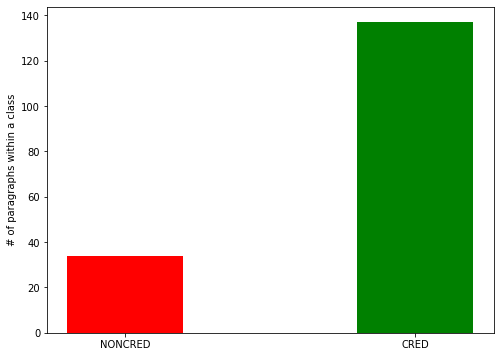

Counter({0: 34, 1: 137})

In [ ]:
cc_vs_nb_label_counter = Counter(cc_vs_nb_Y_no)
plt.bar(x=['NONCRED', 'CRED'], height=cc_vs_nb_label_counter.values(), width=0.4, color=['r', 'g'])
plt.ylabel('# of paragraphs within a class')
plt.show()
cc_vs_nb_label_counter

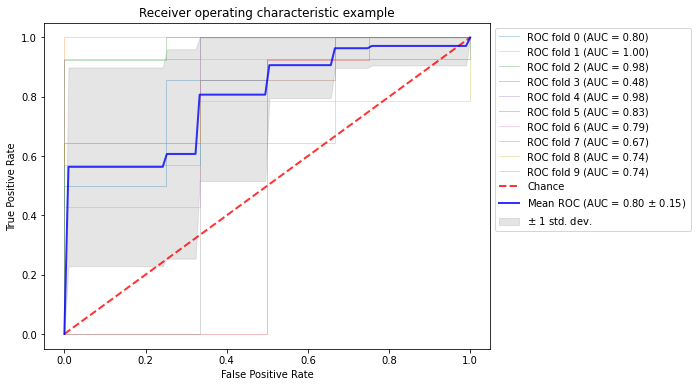

In [ ]:
show_auc_for_cv(cc_vs_nb_pipeline, 
                cc_vs_nb_X[cc_vs_nb_important_features], 
                cc_vs_nb_Y_no, 
                n_splits=5,
                split=0.3)

In [ ]:
mean_weighted_f1(cc_vs_nb_pipeline, 
                 cc_vs_nb_X[cc_vs_nb_important_features], 
                 cc_vs_nb_Y_no, 
                 10, 
                 0.3)
mean_precision(cc_vs_nb_pipeline, 
                 cc_vs_nb_X[cc_vs_nb_important_features], 
                 cc_vs_nb_Y_no, 
                 10, 
                 0.3)

Mean weighted f1:  0.7946429599426293  STD:  0.0380873735501944
Mean micro f1:  0.8153846153846154  STD:  0.031246301556292145
Mean precision for class 1:  0.8597228025597591  STD:  0.029577433944863372


Model: MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 20), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
Loading LIME feature importance retrieval model...


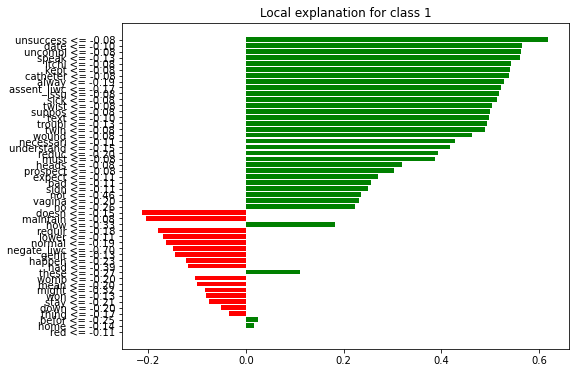

In [ ]:
proba_1, proba_0, clf = predict_proba_hist(cc_vs_nb_pipeline, 
                                      cc_vs_nb_X, 
                                      cc_vs_nb_Y_no, 
                                      cc_vs_nb_important_features,
                                      split=0.3)

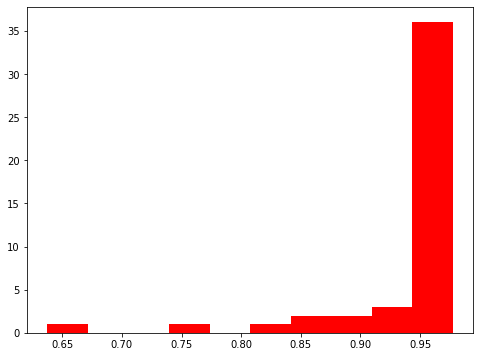

In [ ]:
plt.hist(proba_0.values(), bins=10, color='r')
plt.show()

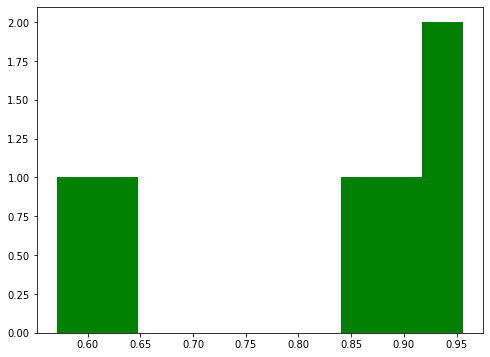

In [ ]:
plt.hist(proba_1.values(), bins=10, color='g')
plt.show()

# TODO
-  [x] Wyświetlić histogram predict_proba dla każdego przypadku ze zbioru testowego - zobaczymy, ile jesteśmy w stanie wiarygodnych paragrafów wyłapać, gdy klasyfikator jest bardzo pewny swojej klasyfikacji.
- [ ] Dodać wektory BERT lub LSA zamiast TFIDF (?).
- [ ] Dodać 2-gramy do zestawu cech (lub zrobić TFIDF z wyrażeniami wielowyrazowymi) (?).
- [ ] Złożność zdania - dodać cechę (element wykrywania HEDGINGU).
- [ ] Wyciągnąć cechy wspólne dla wszystkich kategorii, oraz wyjątkowe dla każdej kategorii.
- [x] Jak procedura przenoszenia etykiet dla trójek zmienia rozkład klas w kategoriach?
- [ ] Wpływ procedury klasyfikacyjnej na proces Active Annotation (!).

*"Wpływ zdania niewiarygodnego na fragment tekstu."*